Podstawowa idea polega na reprezentacji group mean $f$ z przestrzeni euklidesowej jako sumy (nie ważonej!) $n$ bodźców (zwanych atomami) ze słownika $D$:

$f(v) = \sum^n_{i=1} s_i(v)$

## Importy i datasety


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from tqdm import tqdm
# Importing libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [106]:
words

,NumberoflettersinPolish,Ciepło_M,Kompetencja_M,subtlex_plfrequency,Kazojć2011frequency,partofspeech,NumberofLetters,Valence_M,arousal_M,dominance_M,...,REFLECTIVENESSmean,SUBJECTIVESIGNIFICANCEmean,AROUSALmean,ambiVALmean,ambiORImean,ambiACTmean,CategoryambiACT,CategoryambiORI,CategoryambiVAL,V1
POLISHword,,,,,,,,,,,,,,,,,,,,,
Fałsz,5,"48,8333333333333","20,9642857142857",236,427,N,5,"2,68","5,14285714285714","4,04",...,"65,28","73,67","76,56","70,1","83,48","150,22",2,"0,2","0,2",
Prawda,6,"75,2058823529412","80,7037037037037",109391,43707,N,6,"7,16","3,56","6,94",...,51,"80,52","54,18","90,36","117,21","134,7",1,1,"0,1",
niedobór,8,"20,6071428571429","31,2857142857143",26,14,N,10,"3,5","3,88","3,56",...,"54,59","37,62",64,"81,12","67,82","101,62",1,"0,2","0,2",26
gwałt,5,"19,0769230769231","7,42857142857143",886,1012,N,5,"1,44","7,14","3,66",...,"45,89","66,26","93,11","98,5","81,37","159,37",2,"0,1","0,2",966
samobójstwo,11,"13,3103448275862","25,3103448275862",3907,1789,N,11,"1,54","6,76","2,98",...,"57,52","60,56",77,"100,08","105,2","137,56",2,1,"0,2",3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wakacje,7,"90,9333333333333","72,5714285714286",3831,1644,N,7,"8,1","4,84","6,26",...,"19,72",61,"52,44","92,17","94,67","113,44",1,"0,1","0,1",4159
przyjaźń,8,"91,6551724137931","75,1538461538462",2213,2708,N,8,"8,12","4,9","6,5",...,23,"86,65","46,96","101,19","99,69","133,62",1,"0,1","0,1",2996
przyjaciel,10,"89,25","79,5",12811,7758,N,10,"8,14","4,26","6,56",...,"44,53","74,79","41,37","89,74","113,16","116,16",1,"0,1","0,1",2993


2627
Ciepło_M
33                  5
65,5                5
32                  5
74,1034482758621    4
39                  4
                   ..
43,6428571428572    1
46,5714285714286    1
43,5483870967742    1
59,7777777777778    1
92,3333333333333    1
Name: count, Length: 2295, dtype: int64
2627
Kompetencja_M
61                  5
62                  5
44,3333333333333    4
34                  4
54,5                4
                   ..
49,6428571428571    1
45,3333333333333    1
50,7878787878788    1
36,9642857142857    1
79,1428571428571    1
Name: count, Length: 2291, dtype: int64
2627
Valence_M
5,4                 39
5,6                 31
5,38                30
5,2                 29
5,26                28
                    ..
5,51020408163265     1
5,51612903225806     1
4,04166666666667     1
5,53061224489796     1
8,4                  1
Name: count, Length: 481, dtype: int64
2627
arousal_M
3,56                39
3,58                38
3,48                33
3,36        

,Ciepło_M,Kompetencja_M,Valence_M,arousal_M,dominance_M,origin_M,significance_M,concretness_M,imegability_M,ageOfAquisition_M,AUTOMATICITYmean,NumberofLetters,Kazojć2011frequency
POLISHword,,,,,,,,,,,,,
Fałsz,48.833333,20.964286,2.68,5.142857,4.04,5.56,4.38,6.76000,4.56,8.560000,18.20,5.0,6.059123
Prawda,75.205882,80.703704,7.16,3.560000,6.94,6.08,5.66,6.62000,4.08,7.800000,66.21,6.0,10.685286
niedobór,20.607143,31.285714,3.50,3.880000,3.56,5.66,3.14,5.77551,3.68,11.387755,13.24,10.0,2.708050
gwałt,19.076923,7.428571,1.44,7.140000,3.66,4.32,5.22,3.74000,7.22,12.100000,35.47,5.0,6.920672
samobójstwo,13.310345,25.310345,1.54,6.760000,2.98,4.52,5.12,4.22000,7.30,10.940000,47.68,11.0,7.489971
...,...,...,...,...,...,...,...,...,...,...,...,...,...
wakacje,90.933333,72.571429,8.10,4.840000,6.26,4.40,4.98,4.48000,7.56,6.520000,74.94,7.0,7.405496
przyjaźń,91.655172,75.153846,8.12,4.900000,6.50,2.76,6.32,6.68000,6.26,7.820000,76.69,8.0,7.904335
przyjaciel,89.250000,79.500000,8.14,4.260000,6.56,3.30,6.78,4.54000,6.68,6.880000,68.63,10.0,8.956609


,Ciepło_M,Kompetencja_M,Valence_M,arousal_M,dominance_M,origin_M,significance_M,concretness_M,imegability_M,ageOfAquisition_M,AUTOMATICITYmean,NumberofLetters,Kazojć2011frequency
POLISHword,,,,,,,,,,,,,
Fałsz,-0.072746,-1.724597,-1.901927,1.311469,-1.176018,0.070363,0.837198,1.891311,-1.674230,-0.288212,-1.196085,-0.710517,0.156217
Prawda,1.333651,1.660311,1.624279,-0.473278,1.889260,0.718806,2.307497,1.809283,-2.063201,-0.712095,1.677938,-0.299387,2.560454
niedobór,-1.577993,-1.139772,-1.256506,-0.112463,-1.683374,0.195064,-0.587153,1.314485,-2.387344,1.288943,-1.493005,1.345130,-1.585351
gwałt,-1.659597,-2.491547,-2.877931,3.563343,-1.577675,-1.475924,1.802082,0.121853,0.481316,1.686191,-0.162251,-0.710517,0.603967
samobójstwo,-1.967117,-1.478344,-2.799221,3.134875,-2.296429,-1.226523,1.687215,0.403091,0.546144,1.039212,0.568676,1.756260,0.899835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
wakacje,2.172365,1.199527,2.364153,0.969983,1.170505,-1.376163,1.526401,0.555429,0.756837,-1.426004,2.200542,0.111742,0.855932
przyjaźń,2.210859,1.345850,2.379894,1.037636,1.424184,-3.421252,3.065619,1.844438,-0.296626,-0.700940,2.305302,0.522872,1.115181
przyjaciel,2.082596,1.592108,2.395636,0.316005,1.487603,-2.747869,3.594008,0.590583,0.043724,-1.225217,1.822806,1.345130,1.662053


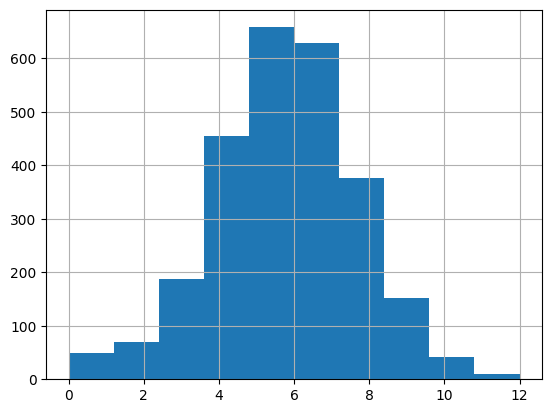

In [175]:
# words_full = pd.read_excel("https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4947584/bin/DataSheet1.XLSX", sheet_name="Arkusz1", index_col = 0)
words_full = pd.read_csv("words_warm_competent.tsv", sep="\t", index_col = 0)
words = words_full.loc[:,[col for col in words_full.columns if not ("SD" in col or "Male" in col or "Female" in col or
                                                          "MIN" in col or "MAX" in col or "_N" in col)]]
words = words.rename(columns={"partofspeach":"partofspeech"})
words.head()
words = words.set_index("POLISHword")
ratings = words.loc[:,[col for col in words.columns if "M" in col or "partofspeech" in col]]# or "part" in col]]
ratings['NumberofLetters'] = words['NumberofLetters']
ratings['Kazojć2011frequency'] = words['Kazojć2011frequency']
color_wheel = {"A": "#0392cf",
               "V": "#7bc043",
               "N": "#ee4035"}
color_wheel2 = {4:"#0392cf",
                6: "#7bc043",
                9: "#ee4035"

}
colors = ratings["partofspeech"].map(lambda x: color_wheel[x] if x in color_wheel.keys() else "#ffffff")
# colors = ratings["valence"]
ratings = ratings.drop("partofspeech", axis=1)
ratings = ratings.loc[[not " " in word for word in ratings.index],:]
ratings_org = ratings.copy()
ratings_loss = np.array(ratings_org.iloc[:,:6])
ratings = ratings.loc[ratings['Kompetencja_M'].apply(lambda x: len(str(x).strip())>0)]
for c in ratings.columns:
  print(sum((ratings[c].values.astype(bool))))
  print(ratings[c].value_counts())
  ratings[c] = ratings[c].apply(lambda x: float((str(x).replace(',','.'))))

ratings["Kazojć2011frequency"] = np.log(ratings["Kazojć2011frequency"]+1)
ratings['Kazojć2011frequency'].hist()
display(ratings)
ratings = (ratings-ratings.mean())/ratings.std() #NORMALIZE RATINGS!
ratingsn = ratings.loc[words["partofspeech"]=="N",:]
ratings = ratingsn
ratings

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

omi = pd.read_csv('/Users/adamsobieszek/PycharmProjects/PsychGAN/omi/attribute_means.csv')
omi = (omi-omi.mean())/omi.std() #NORMALIZE RATINGS!

omi.head()

,stimulus,trustworthy,attractive,dominant,smart,age,gender,weight,typical,happy,...,hispanic,islander,native,black,white,looks-like-you,gay,electable,godly,outdoors
0,-1.729465,-1.251580,-0.525368,2.232127,-0.083519,1.120631,1.328841,-0.692606,0.804043,-1.949532,...,-0.797211,-0.765063,-0.714026,-0.385261,0.940098,1.748945,-0.972195,0.589757,-0.603373,1.161854
1,-1.726016,0.471359,0.530655,0.177365,0.167154,-0.151463,-1.184420,0.193764,-1.104416,1.038343,...,1.633003,1.580842,1.409242,3.218461,-1.926810,-1.019154,-0.178613,0.824706,0.448965,0.300525
2,-1.722567,-1.789828,-1.369765,1.284646,0.889513,1.209914,0.919637,-0.110331,-1.163501,-1.730466,...,0.408374,-0.088665,0.329482,-0.445636,0.153063,-0.264311,0.885956,1.055801,-0.324633,-1.206825
3,-1.719119,0.394869,0.990756,0.080111,-0.154634,-0.585759,-1.287027,-1.193923,-1.668968,0.183807,...,1.224400,1.447577,1.161591,3.208728,-1.977749,-1.476067,-0.983705,0.374349,0.363812,-1.035016
4,-1.715670,0.841147,-0.193289,0.678787,0.533703,0.729807,-1.113786,-0.506625,1.179404,1.397544,...,-1.017428,-0.642578,-0.871563,-0.459998,0.805735,-0.166250,-0.880385,1.060003,1.462368,-0.897498


In [29]:
ratings.to_csv('ratings.csv')

# Funkcja do sprawdzania czy dataset jest poprawny (w sensie ANOVy)

In [ ]:
ptransform = lambda x: np.mean(2**(1/x)-2)

def perform_anova(df, independent, dependent):
    results = {}
    for col in dependent:
        formula = f'Q("{col}") ~ ' + ' + '.join([f'Q("{var}")' for var in independent])
        for r in range(2, len(independent)+1):
            formula += ' + ' + ' + '.join(['*'.join([f'Q("{var}")' for var in comb]) for comb in itertools.combinations(independent, r)])
        model = ols(formula, data=df).fit()
        result = sm.stats.anova_lm(model, type=3)
        results[col] = result
    return results



def quality(df, dependent, independent, verbose = False, all = False):
  # Performing two-way ANOVA
  expected,unexpected,levene,normality = [],[],[],[]
  groups = [(ind,m) for ind,m in df.groupby(list(dependent))]

  results = perform_anova(df, dependent, independent)
  # display(results)
  for i, (col, result) in enumerate(results.items()):
    p = result["PR(>F)"].values[:-1]

    if i<len(dependent):
      expected.append(p[i])
      unexpected.append(np.delete(p,i,0))
    else:
      unexpected.append(p)

    levene.append(st.levene(*[m[1].loc[:,col] for m in groups]).pvalue)
    for g in groups:
      normality.append(st.shapiro(g[1].loc[:,col]).pvalue)
    if verbose: print(f"{st.levene(*[m[1].loc[:,col] for m in groups]).pvalue:.3f}")

  expected, unexpected = np.array(expected),np.hstack(unexpected)
  expected, unexpected = (expected),(unexpected)
  check = np.all(expected<0.01) and np.all(unexpected>0.05)
  if verbose: print("Works" if check else "Failed")
  if all: return  check, expected, unexpected, levene, normality
  else: return  check, np.max(expected), np.min(unexpected), np.mean(levene), np.mean(normality)
# quality(r, (a,b,c),ratings.columns[cols])
# quality(hr,(a,b,c),ratings.columns[cols])

# Właściwy algorytm

In [6]:
[np.where(ratings.columns==l)[0].item() for l in ['Valence_M','origin_M','ciepło','kompetencja']]
ratings

ValueError: can only convert an array of size 1 to a Python scalar

In [ ]:
import numpy as np
import pandas as pd


def smp(df,conditions,columns,n_per_cond):
  from tables.flavor import restrict_flavors

  col_names = df.columns[columns]
  s,f = dict(),dict()
  for c in conditions.keys():
    s[c] = df.values[:,columns] - conditions[c]
    f[c] = np.array([0]*len(conditions[c]))

  result = {"word":[],"ratings":[],"std":[],"ind":[],"0_rank":[],"1_rank":[]}
  for i in range(n_per_cond):
    for c_n,c in enumerate(conditions.keys()):
      dots = np.linalg.norm(s[c]-f[c],axis=1)  # ODPOWIEDNIK ILOCZYNÓW SKALARNÓW
      ind = np.argmin(dots)
      atom = df.iloc[ind,columns]
      std = dots[ind]
      word = df.index[ind]
      result['word'].append(word);result['ratings'].append(atom.values);result['std'].append(std);result['ind'].append(ind);result["0_rank"].append(conditions[c][0]);result["1_rank"].append(conditions[c][1])
      f[c] = f[c] - s[c][ind,:]  # czy dzielimy żeby to była średnia? chyba nie
      for c2 in conditions: s[c2][ind,:] = [99]*len(columns)
  result = pd.DataFrame(result)
  display(result)

  # result = result.assign(**{col: result['ratings'].apply(lambda x: x[i]) for i, col in enumerate(col_names)})
  oceny = np.array([m for m in result.ratings])
  result_anova = pd.DataFrame(dict([(c,v) for c,v in zip(df.columns[columns],oceny.T)]))
  for c in result.columns[-3:]:
    result_anova[c] = result[c]
  result_anova.index = result.word
  return result_anova

cols = [np.where(ratings.columns == c)[0].item() for c in ['Valence_M','origin_M', 'Ciepło_M', 'Kompetencja_M']]
import itertools

def generate_combinations(*args):
    cond = {}
    for values in itertools.product(*args):
        key = ','.join(map(str, values))
        cond[key] = np.array(values)
    return cond

# Usage:
j = np.linspace(-1,1,3)
i = np.linspace(-1,1,3)
controlled = [[0]]*(2)
cond = dict()
for i in np.linspace(-1,1,3):
  for j in np.linspace(-1,1,3):
      cond[f"{i},{j}"] = np.array([i,j]+[0]*2)
n = 15
omi_full = smp(ratings, cond, cols, n)
# for n in range(3,30):
quality(omi_full,["0_rank","1_rank"],ratings.columns[cols], all = True)

,word,ratings,std,ind,0_rank,1_rank
0,zaciekłość,"[-0.7527617975672285, -0.7526605845004738, -0....",0.524712,583,-1.0,-1.0
1,chrząszcz,"[-0.7212778147154403, 0.1950635586468966, -0.1...",0.409781,596,-1.0,0.0
2,bandaż,"[-0.6583098490118638, 1.092907483733879, -0.00...",0.474314,613,-1.0,1.0
3,gorliwość,"[-0.0601141748278883, -0.9333491295151407, 0.1...",0.228133,982,0.0,-1.0
4,kuna,"[-0.01160314002564631, -0.029397422624848728, ...",0.082885,1045,0.0,0.0
...,...,...,...,...,...,...
130,uchwyt,"[0.08156374800515906, 0.22000366767709004, -0....",0.169230,1190,0.0,0.0
131,kopuła,"[0.08156374800515906, 1.2924283559754308, 0.19...",0.255053,1186,0.0,1.0
132,rozrywka,"[1.3881490363543691, -1.5756841824968748, 0.76...",0.742361,2463,1.0,-1.0
133,polędwica,"[0.6325334479114526, 0.39458443088844847, -0.4...",1.156056,1971,1.0,0.0


(True,
 array([1.18182524e-50, 1.33729408e-57]),
 array([0.73519972, 0.72120932, 0.81927905, 0.48008107, 0.87393183,
        0.91400265, 0.64087763, 0.6228936 , 0.86436432, 0.82873031]),
 [3.6678646515073227e-07,
  0.023575117840765648,
  8.43465178277047e-05,
  1.2210575510788488e-05],
 [0.13964637805068683,
  0.11471141597796232,
  0.2601103323863624,
  0.17773219694923653,
  0.5029370982042665,
  0.06488577243517578,
  0.920311819383045,
  0.2219681810611369,
  0.25289648256190345,
  0.03484727518449247,
  0.7002140373996244,
  0.10637438533382511,
  0.12225669553460625,
  0.974838961097954,
  0.4689522907015386,
  0.05864557641891805,
  0.11148670904240919,
  0.8466289586829194,
  0.16349278691119332,
  0.2051217587922247,
  0.1927757310852695,
  0.9225143278470909,
  0.9992581643156251,
  0.5056820368049135,
  0.1091530657860743,
  0.18194107302142998,
  0.7897407900532406,
  0.5532226471681674,
  0.48034295788992326,
  0.3555395472891528,
  0.4411342346093567,
  0.304208142149722

,word,ratings,std,ind,0_rank,1_rank
0,zaciekłość,"[-0.7527617975672285, -0.7526605845004738, -0....",0.275322,583,-1.0,-1.0
1,chrząszcz,"[-0.7212778147154403, 0.1950635586468966, -0.1...",0.167920,596,-1.0,0.0
2,bandaż,"[-0.6583098490118638, 1.092907483733879, -0.00...",0.224974,613,-1.0,1.0
3,gorliwość,"[-0.0601141748278883, -0.9333491295151407, 0.1...",0.052045,982,0.0,-1.0
4,kuna,"[-0.01160314002564631, -0.029397422624848728, ...",0.006870,1045,0.0,0.0
...,...,...,...,...,...,...
130,uchwyt,"[0.08156374800515906, 0.22000366767709004, -0....",0.028639,1190,0.0,0.0
131,kopuła,"[0.08156374800515906, 1.2924283559754308, 0.19...",0.065052,1186,0.0,1.0
132,rozrywka,"[1.3881490363543691, -1.5756841824968748, 0.76...",0.551100,2463,1.0,-1.0
133,polędwica,"[0.6325334479114526, 0.39458443088844847, -0.4...",1.336465,1971,1.0,0.0


(True,
 array([1.18182524e-50, 1.33729408e-57]),
 array([0.73519972, 0.72120932, 0.81927905, 0.48008107, 0.87393183,
        0.91400265, 0.64087763, 0.6228936 , 0.86436432, 0.82873031]),
 [3.6678646515073227e-07,
  0.023575117840765648,
  8.43465178277047e-05,
  1.2210575510788488e-05],
 [0.13964637805068683,
  0.11471141597796232,
  0.2601103323863624,
  0.17773219694923653,
  0.5029370982042665,
  0.06488577243517578,
  0.920311819383045,
  0.2219681810611369,
  0.25289648256190345,
  0.03484727518449247,
  0.7002140373996244,
  0.10637438533382511,
  0.12225669553460625,
  0.974838961097954,
  0.4689522907015386,
  0.05864557641891805,
  0.11148670904240919,
  0.8466289586829194,
  0.16349278691119332,
  0.2051217587922247,
  0.1927757310852695,
  0.9225143278470909,
  0.9992581643156251,
  0.5056820368049135,
  0.1091530657860743,
  0.18194107302142998,
  0.7897407900532406,
  0.5532226471681674,
  0.48034295788992326,
  0.3555395472891528,
  0.4411342346093567,
  0.304208142149722

,word,ratings,std,ind,0_rank,1_rank
0,zaciekłość,"[-0.7527617975672285, -0.7526605845004738, -0....",0.144465,583,-1.0,-1.0
1,chrząszcz,"[-0.7212778147154403, 0.1950635586468966, -0.1...",0.068811,596,-1.0,0.0
2,bandaż,"[-0.6583098490118638, 1.092907483733879, -0.00...",0.106708,613,-1.0,1.0
3,gorliwość,"[-0.0601141748278883, -0.9333491295151407, 0.1...",0.011873,982,0.0,-1.0
4,kuna,"[-0.01160314002564631, -0.029397422624848728, ...",0.000569,1045,0.0,0.0
...,...,...,...,...,...,...
130,uchwyt,"[0.08156374800515906, 0.22000366767709004, -0....",0.004847,1190,0.0,0.0
131,kopuła,"[0.08156374800515906, 1.2924283559754308, 0.19...",0.016592,1186,0.0,1.0
132,rozrywka,"[1.3881490363543691, -1.5756841824968748, 0.76...",0.409115,2463,1.0,-1.0
133,polędwica,"[0.6325334479114526, 0.39458443088844847, -0.4...",1.545028,1971,1.0,0.0


(True,
 array([1.18182524e-50, 1.33729408e-57]),
 array([0.73519972, 0.72120932, 0.81927905, 0.48008107, 0.87393183,
        0.91400265, 0.64087763, 0.6228936 , 0.86436432, 0.82873031]),
 [3.6678646515073227e-07,
  0.023575117840765648,
  8.43465178277047e-05,
  1.2210575510788488e-05],
 [0.13964637805068683,
  0.11471141597796232,
  0.2601103323863624,
  0.17773219694923653,
  0.5029370982042665,
  0.06488577243517578,
  0.920311819383045,
  0.2219681810611369,
  0.25289648256190345,
  0.03484727518449247,
  0.7002140373996244,
  0.10637438533382511,
  0.12225669553460625,
  0.974838961097954,
  0.4689522907015386,
  0.05864557641891805,
  0.11148670904240919,
  0.8466289586829194,
  0.16349278691119332,
  0.2051217587922247,
  0.1927757310852695,
  0.9225143278470909,
  0.9992581643156251,
  0.5056820368049135,
  0.1091530657860743,
  0.18194107302142998,
  0.7897407900532406,
  0.5532226471681674,
  0.48034295788992326,
  0.3555395472891528,
  0.4411342346093567,
  0.304208142149722

In [12]:
omi_full.drop('ind',axis=1).groupby(["0_rank","1_rank"]).cov()

Valence_M  origin_M  Ciepło_M  Kompetencja_M
0_rank 1_rank                                                            
-1.0   -1.0   Valence_M       0.461560 -0.025227  0.272648      -0.024253
              origin_M       -0.025227  0.154867 -0.068226       0.178885
              Ciepło_M        0.272648 -0.068226  0.280184      -0.096442
              Kompetencja_M  -0.024253  0.178885 -0.096442       0.357613
        0.0   Valence_M       0.139263  0.031080 -0.063218       0.143024
              origin_M        0.031080  0.096109 -0.072682       0.129239
              Ciepło_M       -0.063218 -0.072682  0.182950      -0.166702
              Kompetencja_M   0.143024  0.129239 -0.166702       0.503368
        1.0   Valence_M       0.291618  0.113625 -0.101364       0.287635
              origin_M        0.113625  0.205549 -0.094381       0.231972
              Ciepło_M       -0.101364 -0.094381  0.767211       0.042686
              Kompetencja_M   0.287635  0.231972  0.042686       0.684456
 0.0   -1.0   Valence_M       0.058299  0.008978  0.049167      -0.031085
              origin_M        0.008978  0.086668 -0.016940       0.005028
              Ciepło_M        0.049167 -0.016940  0.105595      -0.045468
              Kompetencja_M  -0.031085  0.005028 -0.045468       0.107517
        0.0   Valence_M       0.018094  0.004843 -0.004734       0.004456
              origin_M        0.004843  0.012660 -0.003440       0.011971
              Ciepło_M       -0.004734 -0.003440  0.006787      -0.001605
              Kompetencja_M   0.004456  0.011971 -0.001605       0.033993
        1.0   Valence_M       0.007416 -0.001949  0.005931       0.006013
              origin_M       -0.001949  0.020480  0.000061       0.001521
              Ciepło_M        0.005931  0.000061  0.036889      -0.001296
              Kompetencja_M   0.006013  0.001521 -0.001296       0.016720
 1.0   -1.0   Valence_M       0.114207 -0.005341  0.107785      -0.020280
              origin_M       -0.005341  0.165260 -0.070904       0.055827
              Ciepło_M        0.107785 -0.070904  0.178791      -0.055827
              Kompetencja_M  -0.020280  0.055827 -0.055827       0.118155
        0.0   Valence_M       0.051751 -0.026380  0.038725       0.037345
              origin_M       -0.026380  0.051956 -0.014511      -0.026313
              Ciepło_M        0.038725 -0.014511  0.144623      -0.002716
              Kompetencja_M   0.037345 -0.026313 -0.002716       0.107241
        1.0   Valence_M       0.101692  0.024992  0.141973       0.049275
              origin_M        0.024992  0.220219  0.050306      -0.126233
              Ciepło_M        0.141973  0.050306  0.569206       0.125792
              Kompetencja_M   0.049275 -0.126233  0.125792       0.438639

In [13]:
import numpy as np
import pandas as pd

def smp_clm(df, conditions, columns, n_per_cond, tag_dims=2):
    """
    Completion-Likelihood Mahalanobis (CLM) SMP.
    Greedy selection with a single, probability-optimal distance metric.

    Parameters
    ----------
    df : pandas.DataFrame
        Full dataset.
    conditions : dict[str -> np.ndarray]
        Maps condition key to target vector (length == len(columns)).
        Example: { "−1,−1": np.array([-1,-1,0,0]), ... }
    columns : list[int] or list[str]
        Columns of df to use as feature space (ratings).
    n_per_cond : int
        Number of items to select per condition.
    tag_dims : int, default 2
        How many leading target dims to echo into result as *_rank columns
        (to feed your quality() function, which expects "0_rank","1_rank").

    Returns
    -------
    result_anova : pandas.DataFrame
        Wide table with chosen items expanded into rating columns + *_rank tags.
        Index is df.index (original item ids/labels).
    result_long : pandas.DataFrame
        Long table with one row per pick containing cond_key, index, ind, ratings, target_vec.
    """
    # --- Extract matrix X (N,P) for selected columns, keep column names ---
    if isinstance(columns, (list, tuple, np.ndarray)):
        X = df.loc[:, columns].to_numpy(dtype=float) if isinstance(columns[0], str) else df.iloc[:, columns].to_numpy(dtype=float)
        col_names = list(columns) if isinstance(columns[0], str) else list(df.columns[columns])
    else:
        # columns is a slice or pandas indexer
        X = df.loc[:, columns].to_numpy(dtype=float)
        col_names = list(df.loc[:, columns].columns)

    N, P = X.shape
    cond_keys = list(conditions.keys())
    C = len(cond_keys)

    # --- Precompute centered matrices per condition: S_c = X - mu_c ---
    S_centered = {}
    for ck in cond_keys:
        mu_c = np.asarray(conditions[ck], dtype=float).reshape(1, -1)  # (1,P)
        if mu_c.shape[1] != P:
            raise ValueError(f"Condition '{ck}' target length ({mu_c.shape[1]}) != feature dimension ({P}).")
        S_centered[ck] = X - mu_c  # (N,P)

    # --- Global availability mask (no reuse across conditions) ---
    available = np.ones(N, dtype=bool)

    # --- Per-condition residual sums and chosen lists ---
    R = {ck: np.zeros(P, dtype=float) for ck in cond_keys}
    chosen = {ck: [] for ck in cond_keys}

    # --- Helper: sample mean and covariance of remaining pool for condition ck ---
    def pool_mean_cov(ck, avail_idx):
        """
        Compute unbiased sample mean and covariance in centered space
        for the remaining pool of condition ck (indices avail_idx).
        Returns (mu_U, Sigma_U_inv).
        Uses pseudoinverse if covariance is singular; no tunable params.
        """
        S = S_centered[ck][avail_idx]     # (M,P)
        M = S.shape[0]
        if M == 0:
            # Degenerate (shouldn't happen; guarded by caller)
            mu_U = np.zeros(P, dtype=float)
            Sigma_inv = np.eye(P, dtype=float)
            return mu_U, Sigma_inv

        mu_U = S.mean(axis=0)             # (P,)
        if M <= 1:
            # No variance info; fall back to identity geometry
            return mu_U, np.eye(P, dtype=float)

        S0 = S - mu_U                     # (M,P)
        # unbiased covariance (divide by M-1)
        Sigma = (S0.T @ S0) / (M - 1)     # (P,P)
        # Robust inverse: pseudoinverse handles singular/near-singular
        Sigma_inv = np.linalg.pinv(Sigma, rcond=1e-12)
        return mu_U, Sigma_inv

    # --- Main selection loop ---
    for step in range(n_per_cond):
        # Round-robin over conditions (same pattern as your SMP)
        for ck in cond_keys:
            # stop if nothing left
            if not np.any(available):
                break

            # Remaining picks AFTER taking a candidate now:
            n_already = len(chosen[ck])
            if n_already >= n_per_cond:
                continue
            t = n_per_cond - (n_already + 1)

            # Candidates: all currently available indices
            avail_idx = np.flatnonzero(available)
            if avail_idx.size == 0:
                break

            # Pool geometry from remaining items for THIS condition
            mu_U, Sigma_inv = pool_mean_cov(ck, avail_idx)

            # Vectorized CLM scores for all candidates:
            # For each candidate x' (row in S_centered[ck][avail_idx]),
            # compute v = R[ck] + x' + t * mu_U
            S_av = S_centered[ck][avail_idx]            # (M,P)
            v = S_av + R[ck] + t * mu_U                # (M,P)
            # Quadratic form: v^T Sigma_inv v = sum( (v @ Sigma_inv) * v, axis=1 )
            w = v @ Sigma_inv                          # (M,P)
            scores = np.einsum('ij,ij->i', v, w)       # (M,)

            # Pick best candidate
            j = int(np.argmin(scores))
            idx = int(avail_idx[j])
            xprime = S_centered[ck][idx]               # (P,)

            # Commit
            R[ck] = R[ck] + xprime
            available[idx] = False
            chosen[ck].append(idx)

    # --- Build outputs (compatible with your quality() usage) ---
    long_rows = []
    for ck in cond_keys:
        for idx in chosen[ck]:
            long_rows.append({
                "cond_key": ck,
                "index": df.index[idx],
                "ind": int(idx),
                "ratings": X[idx].copy(),
                "target_vec": np.asarray(conditions[ck], dtype=float).copy()
            })
    result_long = pd.DataFrame(long_rows)

    # Expand ratings into columns
    result_anova = pd.DataFrame({
        c: result_long["ratings"].apply(lambda v, i=i: float(v[i]))
        for i, c in enumerate(col_names)
    })

    # Tag first tag_dims target dims as *_rank (like your "0_rank","1_rank")
    for i in range(min(tag_dims, P)):
        result_anova[f"{i}_rank"] = result_long["target_vec"].apply(lambda v, j=i: float(v[j]))

    result_anova["cond_key"] = result_long["cond_key"].values
    result_anova.index = result_long["index"]

    return result_anova, result_long

In [14]:
# Example setup (same style as your SMP snippet)
import itertools
import numpy as np

# columns to use
cols = [np.where(ratings.columns == c)[0].item() for c in ['Valence_M','origin_M', 'Ciepło_M', 'Kompetencja_M']]

# Conditions: 2 manipulated dims (grid), rest controlled at 0
cond = {}
for a in np.linspace(-1,1,3):
    for b in np.linspace(-1,1,3):
        cond[f"{a},{b}"] = np.array([a, b, 0, 0], dtype=float)

n = 15
omi_full_clm, long_clm = smp_clm(ratings, cond, cols, n_per_cond=n)

# Works with your quality() (expects "0_rank","1_rank"):
quality(omi_full_clm, ["0_rank","1_rank"], ratings.columns[cols], all=True)

(True,
 array([2.04096955e-22, 8.73901714e-17]),
 array([0.67937691, 0.66377956, 0.81011148, 0.81350086, 0.86635867,
        0.84568858, 0.83803422, 0.76476344, 0.84349296, 0.80102172]),
 [0.0012339650212796391,
  0.02629301040993001,
  0.13545709766437314,
  0.0008715620780951701],
 [0.020437794226452442,
  0.11140679177663651,
  0.902847737502061,
  0.1820608510831144,
  0.9354463464350402,
  0.396825647163914,
  0.002246706665755782,
  0.7601539586289137,
  0.21974522037832825,
  0.09006194138368553,
  0.31511822133481376,
  0.9521058501898498,
  0.0005854197379564508,
  0.4179642023480957,
  0.02027009742513258,
  0.13445302294128458,
  0.23374350172116357,
  0.7759937095356013,
  0.13765740961553297,
  0.9704063507039954,
  0.6640770170871396,
  0.03626173645353991,
  0.2454196977895316,
  0.6950922785542437,
  0.2548651501063812,
  0.8823127254227857,
  0.6488094011478569,
  0.785787793011527,
  0.705587527349818,
  0.09067287909661823,
  0.9499332596776411,
  0.36714962190866685

In [191]:
# Iterated Bayesian CLM–SMP with post-hoc 1-exchange NE and metrics
# (self-contained; uses ratings.csv already loaded by the user context)

import numpy as np, pandas as pd, time, itertools
from scipy import stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

# --- Data from the user's context ---
# ratings = pd.read_csv('/mnt/data/ratings.csv')
cols = [ratings.columns.get_loc(c) for c in ['Valence_M','origin_M','Ciepło_M','Kompetencja_M']]
X = ratings.iloc[:, cols].to_numpy(dtype=float)
P = X.shape[1]

def build_conditions_grid():
    cond = {}
    for a in (-1.0, 0.0, 1.0):
        for b in (-1.0, 0.0, 1.0):
            cond[f"{a},{b}"] = np.array([a, b, 0.0, 0.0], dtype=float)
    return cond

conditions = build_conditions_grid()
cond_keys = list(conditions.keys())
C = len(cond_keys)

# ---------- Metrics (ANOVA + Levene + Phi1) ----------

def perform_anova(df, independent, dependent_cols):
    results = {}
    for col in dependent_cols:
        formula = f'Q("{col}") ~ ' + ' + '.join([f'Q("{var}")' for var in independent])
        for r in range(2, len(independent)+1):
            formula += ' + ' + ' + '.join(['*'.join([f'Q("{var}")' for var in comb]) 
                                           for comb in itertools.combinations(independent, r)])
        model = ols(formula, data=df).fit()
        result = sm.stats.anova_lm(model, type=3)
        results[col] = result
    return results

def expand_for_quality(sets):
    rows = []
    for ck in cond_keys:
        mu = conditions[ck]
        for idx in sets[ck]:
            rows.append({"cond_key": ck, "index": ratings.index[idx], "ratings": X[idx].copy(), "target_vec": mu.copy()})
    long_df = pd.DataFrame(rows)
    col_names = list(ratings.columns[cols])
    df_out = pd.DataFrame({c: long_df["ratings"].apply(lambda v, i=i: float(v[i])) for i, c in enumerate(col_names)})
    for k in range(2):
        df_out[f"{k}_rank"] = long_df["target_vec"].apply(lambda v, j=k: float(v[j]))
    df_out["cond_key"] = long_df["cond_key"].values
    df_out.index = long_df["index"]
    return df_out

def compute_phi1(sets):
    total = 0.0
    for ck in cond_keys:
        mu = conditions[ck]
        idx = sets[ck]
        if len(idx)==0: continue
        R = (X[idx] - mu.reshape(1,-1)).sum(axis=0)
        total += float(R @ R)
    return total

def metrics_from_sets(sets, alpha=0.05, use_median=True):
    # Levene (Brown–Forsythe) across conditions, per feature
    N = sum(len(sets[ck]) for ck in cond_keys)
    df1 = C - 1; df2 = N - C
    Fcrit = st.f.ppf(1.0 - alpha, df1, df2)
    F_list, p_list = [], []
    for v in range(P):
        groups = [X[sets[ck], v] for ck in cond_keys]
        centers = [np.median(g) if use_median else np.mean(g) for g in groups]
        Ys = [np.abs(g - c) for g, c in zip(groups, centers)]
        group_means = np.array([y.mean() for y in Ys])
        ybar = np.mean(np.concatenate(Ys))
        SSB = sum(len(Ys[i]) * (group_means[i] - ybar)**2 for i in range(len(Ys)))
        SSW = sum(((Ys[i] - group_means[i])**2).sum() for i in range(len(Ys)))
        F = 0.0 if (df1<=0 or df2<=0 or SSW<=0) else (SSB/df1)/(SSW/df2)
        p = 1.0 - st.f.cdf(F, df1, df2) if df1>0 and df2>0 else 1.0
        F_list.append(F); p_list.append(p)
    F_arr = np.array(F_list); p_arr = np.array(p_list)
    K = int(np.sum(F_arr >= Fcrit))
    sumH = float(np.sum(np.maximum(0.0, F_arr - Fcrit)))
    # ANOVA
    df = expand_for_quality(sets)
    dep_factors = ["0_rank","1_rank"]
    dep_cols = list(ratings.columns[cols])
    res = perform_anova(df, dep_factors, dep_cols)
    expected, unexpected = [], []
    for i, (col, result) in enumerate(res.items()):
        pvec = result["PR(>F)"].values[:-1]
        if i < len(dep_factors):
            expected.append(pvec[i])
            unexpected.extend(list(np.delete(pvec, i, axis=0)))
        else:
            unexpected.extend(list(pvec))
    expected = np.array(expected) if len(expected)>0 else np.array([])
    unexpected = np.array(unexpected) if len(unexpected)>0 else np.array([])
    phi1 = compute_phi1(sets)
    return {
        "Phi1": float(phi1),
        "K": K, "sumH": float(sumH), "Fcrit": float(Fcrit), "dfs": (df1, df2),
        "levene_pvals": p_arr, "levene_p_mean": float(np.mean(p_arr)), "levene_p_min": float(np.min(p_arr)),
        "expected_pvals": expected, "expected_p_mean": float(np.mean(expected)) if expected.size else np.nan,
        "unexpected_pvals": unexpected, "unexpected_p_min": float(np.min(unexpected)) if unexpected.size else np.nan,
    }

# ---------- CLM (pass-0) and Bayesian-CLM (passes >=1) ----------

def smp_clm_or_bclm(df, conditions, columns, n_per_cond, priors=None):
    """
    Greedy selection per condition using CLM (priors=None) or Bayesian CLM (NIW priors provided per condition).
    priors[ck] should be a dict with keys: mu0 (P,), kappa0 (scalar), Lambda0 (P,P), nu0 (scalar).
    Only (mu0, kappa0, Lambda0) matter for argmin; nu0 cancels.
    """
    Xloc = df.iloc[:, columns].to_numpy(dtype=float)
    N, P = Xloc.shape
    cond_keys = list(conditions.keys())
    # centered views per condition
    S_centered = {ck: Xloc - np.asarray(conditions[ck], float).reshape(1,-1) for ck in cond_keys}
    available = np.ones(N, dtype=bool)
    R = {ck: np.zeros(P) for ck in cond_keys}
    chosen = {ck: [] for ck in cond_keys}

    def pool_mean_scatter(S, avail_idx):
        S_av = S[avail_idx]
        M = len(S_av)
        if M == 0:
            # degenerate
            return np.zeros(S.shape[1]), np.eye(S.shape[1])
        mu = S_av.mean(axis=0)
        if M == 1:
            return mu, np.eye(S.shape[1])
        S0 = S_av - mu
        # scatter (not normalized): S0^T S0  (scale cancels in argmin)
        Scatter = (S0.T @ S0)
        return mu, Scatter

    for step in range(n_per_cond):
        for ck in cond_keys:
            if not np.any(available): break
            n_done = len(chosen[ck])
            if n_done >= n_per_cond: continue
            t = n_per_cond - (n_done + 1)
            avail_idx = np.flatnonzero(available)
            # empirical pool stats in centered space
            mu_emp, Sc_emp = pool_mean_scatter(S_centered[ck], avail_idx)
            # NIW posterior parameters (up to common scales) for argmin
            if priors is None or (priors.get(ck) is None):
                mu_post = mu_emp
                Lambda_post = Sc_emp
            else:
                pr = priors[ck]
                k0 = float(pr["kappa0"]); mu0 = pr["mu0"]; L0 = pr["Lambda0"]
                Npool = len(avail_idx)
                # posterior mean
                mu_post = (k0*mu0 + Npool*mu_emp) / (k0 + Npool) if (k0 + Npool) > 0 else mu_emp
                # posterior scale (scatter-like)
                delta = (mu_emp - mu0).reshape(-1,1)
                shrink = (k0 * Npool)/(k0 + Npool) if (k0 + Npool) > 0 else 0.0
                Lambda_post = L0 + Sc_emp + shrink * (delta @ delta.T)
            # inverse (pseudoinverse for stability)
            try:
                Linv = np.linalg.pinv(Lambda_post, rcond=1e-12)
            except np.linalg.LinAlgError:
                Linv = np.eye(P)
            S_av = S_centered[ck][avail_idx]
            # candidate quadratic forms
            v = S_av + R[ck] + t * mu_post  # R' + t mu_post
            w = v @ Linv
            scores = np.einsum('ij,ij->i', v, w)
            j = int(np.argmin(scores))
            idx = int(avail_idx[j])
            # commit
            R[ck] += S_centered[ck][idx]
            available[idx] = False
            chosen[ck].append(idx)

    # pack selection into a df
    long_rows = []
    for ck in cond_keys:
        for idx in chosen[ck]:
            long_rows.append({"cond_key": ck, "index": ratings.index[idx], "ind": int(idx)})
    return pd.DataFrame(long_rows)

def build_sets(long_sel):
    return {ck: long_sel[long_sel["cond_key"]==ck]["ind"].to_list() for ck in cond_keys}

# ---------- Local Levene 1-exchange best-improvement (exact) ----------

class LocalEvaluator:
    def __init__(self, X, conditions, cond_keys, sets, use_median=True):
        self.X = X; self.conditions = conditions; self.cond_keys = cond_keys
        self.P = X.shape[1]
        self.sets = {ck: list(sets[ck]) for ck in cond_keys}
        self.use_median = use_median
        # per-group per-feature arrays & medians
        self.group_vals = {ck: [self.X[self.sets[ck], v].copy() for v in range(self.P)] for ck in cond_keys}
        self.center = {ck: np.array([np.median(self.group_vals[ck][v]) if use_median else np.mean(self.group_vals[ck][v]) for v in range(self.P)]) for ck in cond_keys}
        self.sumy  = {ck: np.array([np.abs(self.group_vals[ck][v]-self.center[ck][v]).sum() for v in range(self.P)]) for ck in cond_keys}
        self.sumy2 = {ck: np.array([((self.group_vals[ck][v]-self.center[ck][v])**2).sum() for v in range(self.P)]) for ck in cond_keys}
        self.n = np.array([len(self.sets[ck]) for ck in cond_keys], dtype=int)
        # totals
        self.sumy_tot = np.zeros(self.P); self.sumy2_tot = np.zeros(self.P)
        for ck in cond_keys:
            self.sumy_tot += self.sumy[ck]; self.sumy2_tot += self.sumy2[ck]
        # Phi1 residuals
        self.R = {}; self.Phi1 = 0.0
        for ck in cond_keys:
            mu = self.conditions[ck]
            idx = self.sets[ck]
            S = (self.X[idx] - mu.reshape(1,-1)).sum(axis=0)
            self.R[ck] = S; self.Phi1 += float(S @ S)

    def recompute_F(self, df1, df2):
        if df1 <= 0 or df2 <= 0:
            return np.zeros(self.P), np.ones(self.P)
        ybar = self.sumy_tot / np.sum(self.n)
        F = np.zeros(self.P)
        for v in range(self.P):
            SSB = 0.0; SSW = 0.0
            for ci, ck in enumerate(self.cond_keys):
                mean_y = self.sumy[ck][v] / max(self.n[ci],1)
                SSB += self.n[ci] * (mean_y - ybar[v])**2
                SSW += self.sumy2[ck][v] - self.n[ci] * (mean_y**2)
            F[v] = 0.0 if SSW <= 1e-12 else (SSB/df1)/(SSW/df2)
        p = 1.0 - st.f.cdf(F, df1, df2)
        return F, p

    def eval_swap(self, ck1, pos1, ck2, pos2, Fcrit, df1, df2):
        a = self.sets[ck1][pos1]; b = self.sets[ck2][pos2]
        if a == b: return None
        # Phi1 delta
        mu1 = self.conditions[ck1]; mu2 = self.conditions[ck2]
        vec_a1 = self.X[a] - mu1; vec_b1 = self.X[b] - mu1
        vec_b2 = self.X[b] - mu2; vec_a2 = self.X[a] - mu2
        R1_new = self.R[ck1] - vec_a1 + vec_b1
        R2_new = self.R[ck2] - vec_b2 + vec_a2
        dphi1 = float(R1_new @ R1_new - self.R[ck1] @ self.R[ck1] +
                      R2_new @ R2_new - self.R[ck2] @ self.R[ck2])
        if dphi1 > 1e-12:
            return None
        # Local Levene update: recompute centers and abs deviations for the two groups
        new_vals1 = [arr.copy() for arr in self.group_vals[ck1]]
        new_vals2 = [arr.copy() for arr in self.group_vals[ck2]]
        for v in range(self.P):
            new_vals1[v][pos1] = self.X[b, v]
            new_vals2[v][pos2] = self.X[a, v]
        cen1 = np.array([np.median(new_vals1[v]) if self.use_median else np.mean(new_vals1[v]) for v in range(self.P)])
        cen2 = np.array([np.median(new_vals2[v]) if self.use_median else np.mean(new_vals2[v]) for v in range(self.P)])
        y1 = [np.abs(new_vals1[v] - cen1[v]) for v in range(self.P)]
        y2 = [np.abs(new_vals2[v] - cen2[v]) for v in range(self.P)]
        sumy1 = np.array([yi.sum() for yi in y1]);    sumy21 = np.array([(yi*yi).sum() for yi in y1])
        sumy2 = np.array([yi.sum() for yi in y2]);    sumy22 = np.array([(yi*yi).sum() for yi in y2])
        # Update totals and compute F_new
        sumy_tot_new = self.sumy_tot - self.sumy[ck1] - self.sumy[ck2] + sumy1 + sumy2
        sumy2_tot_new = self.sumy2_tot - self.sumy2[ck1] - self.sumy2[ck2] + sumy21 + sumy22
        ybar = sumy_tot_new / np.sum(self.n)
        F_new = np.zeros(self.P); p_new = np.zeros(self.P)
        for v in range(self.P):
            SSB = 0.0; SSW = 0.0
            for ci, ck in enumerate(self.cond_keys):
                if ck == ck1:
                    mean_y = sumy1[v] / max(self.n[ci],1)
                    SSB += self.n[ci]*(mean_y - ybar[v])**2
                    SSW += sumy21[v] - self.n[ci]*(mean_y**2)
                elif ck == ck2:
                    mean_y = sumy2[v] / max(self.n[ci],1)
                    SSB += self.n[ci]*(mean_y - ybar[v])**2
                    SSW += sumy22[v] - self.n[ci]*(mean_y**2)
                else:
                    mean_y = self.sumy[ck][v] / max(self.n[ci],1)
                    SSB += self.n[ci]*(mean_y - ybar[v])**2
                    SSW += self.sumy2[ck][v] - self.n[ci]*(mean_y**2)
            F_new[v] = 0.0 if (df1<=0 or df2<=0 or SSW<=1e-12) else (SSB/df1)/(SSW/df2)
            p_new[v] = 1.0 - st.f.cdf(F_new[v], df1, df2) if (df1>0 and df2>0) else 1.0
        return {
            "ck1": ck1, "pos1": pos1, "ck2": ck2, "pos2": pos2,
            "dphi1": dphi1, "F_new": F_new, "p_new": p_new,
            "new_vals1": new_vals1, "new_vals2": new_vals2,
            "cen1": cen1, "cen2": cen2,
            "sumy1": sumy1, "sumy21": sumy21,
            "sumy2": sumy2, "sumy22": sumy22,
            "sumy_tot_new": sumy_tot_new, "sumy2_tot_new": sumy2_tot_new,
            "R1_new": R1_new, "R2_new": R2_new
        }

    def commit_swap(self, mv):
        ck1, pos1, ck2, pos2 = mv["ck1"], mv["pos1"], mv["ck2"], mv["pos2"]
        a = self.sets[ck1][pos1]; b = self.sets[ck2][pos2]
        # Update sets and arrays
        self.sets[ck1][pos1] = b; self.sets[ck2][pos2] = a
        self.group_vals[ck1] = mv["new_vals1"]; self.group_vals[ck2] = mv["new_vals2"]
        self.center[ck1] = mv["cen1"]; self.center[ck2] = mv["cen2"]
        # Update sums and totals
        self.sumy_tot = mv["sumy_tot_new"]; self.sumy2_tot = mv["sumy2_tot_new"]
        self.sumy[ck1] = mv["sumy1"]; self.sumy2[ck1] = mv["sumy21"]
        self.sumy[ck2] = mv["sumy2"]; self.sumy2[ck2] = mv["sumy22"]
        # Update Phi1 residuals
        self.Phi1 += mv["dphi1"]
        self.R[ck1] = mv["R1_new"]; self.R[ck2] = mv["R2_new"]

class PairwiseBestLocal1Exchange:
    def __init__(self, X, conditions, cond_keys, sets, alpha=0.05, use_median=True):
        self.X = X; self.conditions = conditions; self.cond_keys = cond_keys
        self.alpha = alpha; self.use_median = use_median
        self.sets = {ck: list(sets[ck]) for ck in cond_keys}
        self.ev = LocalEvaluator(X, conditions, cond_keys, self.sets, use_median=use_median)
        N = sum(len(self.sets[ck]) for ck in cond_keys)
        self.df1 = len(cond_keys)-1; self.df2 = N - len(cond_keys)
        self.Fcrit = st.f.ppf(1.0 - alpha, self.df1, self.df2)

    def run(self, max_iters=10000, verbose=False):
        it = 0; Kcur, sumHcur = None, None
        # compute current F
        F0, p0 = self.ev.recompute_F(self.df1, self.df2)
        Kcur = int(np.sum(F0 >= self.Fcrit)); sumHcur = float(np.sum(np.maximum(0.0, F0 - self.Fcrit)))
        while it < max_iters:
            best = None
            for i in range(len(self.cond_keys)):
                ck1 = self.cond_keys[i]
                for j in range(i+1, len(self.cond_keys)):
                    ck2 = self.cond_keys[j]
                    s1, s2 = self.ev.sets[ck1], self.ev.sets[ck2]
                    for pos1 in range(len(s1)):
                        for pos2 in range(len(s2)):
                            mv = self.ev.eval_swap(ck1, pos1, ck2, pos2, self.Fcrit, self.df1, self.df2)
                            if mv is None: 
                                continue
                            F_new = mv["F_new"]
                            K_new = int(np.sum(F_new >= self.Fcrit))
                            sumH_new = float(np.sum(np.maximum(0.0, F_new - self.Fcrit)))
                            # lex improvement
                            if (K_new < Kcur) or (K_new == Kcur and sumH_new < sumHcur - 1e-12):
                                key = (Kcur - K_new, sumHcur - sumH_new, -mv["dphi1"])
                                if (best is None) or (key > best[0]):
                                    best = (key, mv, K_new, sumH_new)
            if best is None:
                break
            _, mv, Kcur, sumHcur = best
            self.ev.commit_swap(mv)
            it += 1
            if verbose and it % 5 == 0:
                print(f"[local exact iter {it}] K={Kcur}, sumH={sumHcur:.4f}")
        self.sets = self.ev.sets
        metrics = metrics_from_sets(self.sets, alpha=self.alpha, use_median=self.use_median)
        metrics.update({"iters": it, "solver": "PairwiseBestLocal1Exchange"})
        return self.sets, metrics

# ---------- Outer loop (Iterated Bayesian CLM–SMP) ----------

def remaining_pool_indices_after_sets(sets):
    used = set([i for ck in cond_keys for i in sets[ck]])
    all_idx = set(range(len(X)))
    return sorted(list(all_idx - used))

def priors_from_remaining_pool(rem_idx_per_condition):
    priors = {}
    for ck in cond_keys:
        mu_c = conditions[ck]
        # center remaining pool for this condition
        S = X[rem_idx_per_condition] - mu_c.reshape(1,-1)
        if len(S)==0:
            Pdim = X.shape[1]
            priors[ck] = {"mu0": np.zeros(Pdim), "kappa0": 0.0, "Lambda0": np.eye(Pdim), "nu0": Pdim+2}
            continue
        mu0 = S.mean(axis=0)
        S0 = S - mu0
        L0 = (S0.T @ S0)  # scatter
        k0 = float(len(S))   # pseudo-count = pool size (parameter-free)
        nu0 = float(len(S) + P + 1)  # not used in argmin
        priors[ck] = {"mu0": mu0, "kappa0": k0, "Lambda0": L0, "nu0": nu0}
    return priors

def run_pass(priors=None, n_per_cond=15, alpha=0.05):
    # Greedy selection
    long_sel = smp_clm_or_bclm(ratings, conditions, cols, n_per_cond=n_per_cond, priors=priors)
    sets = build_sets(long_sel)
    met = metrics_from_sets(sets, alpha=alpha, use_median=True)
    # Auction to 1-exchange NE
    # auction = PairwiseBestLocal1Exchange(X, conditions, cond_keys, sets, alpha=alpha, use_median=True)
    # sets_final, met = auction.run(max_iters=10000, verbose=False)
    # Compute remaining pool, build next priors
    rem_idx = remaining_pool_indices_after_sets(sets)
    priors_next = priors_from_remaining_pool(rem_idx)
    return sets, met, priors_next

def digest_metrics(tag, m):
    return {
        "tag": tag,
        "K": m["K"], "sumH": m["sumH"], "Phi1": m["Phi1"],
        "levene_p_min": m["levene_p_min"], "levene_p_mean": m["levene_p_mean"],
        "unexpected_p_min": m["unexpected_p_min"], "expected_p_mean": m["expected_p_mean"],
    }

# ---------- Run baseline (empirical CLM) and two Bayesian passes ----------

n_per_cond = 15
alpha = 0.05

# Pass 0: empirical CLM
sets0, m0, priors1 = run_pass(priors=None, n_per_cond=n_per_cond, alpha=alpha)
# Pass 1: Bayesian CLM with priors from remaining pool of pass 0
sets1, m1, priors2 = run_pass(priors=priors1, n_per_cond=n_per_cond, alpha=alpha)
# Pass 2: Bayesian CLM with priors from remaining pool of pass 1
sets2, m2, priors3 = run_pass(priors=priors2, n_per_cond=n_per_cond, alpha=alpha)

summary = pd.DataFrame([digest_metrics("Pass 0 (empirical CLM)", m0),
                        digest_metrics("Pass 1 (BCLM)", m1),
                        digest_metrics("Pass 2 (BCLM)", m2)])

summary


,tag,K,sumH,Phi1,levene_p_min,levene_p_mean,unexpected_p_min,expected_p_mean
0,Pass 0 (empirical CLM),3,3.283698,20.211146,0.000872,0.040964,0.663780,4.369519e-17
1,Pass 1 (BCLM),4,5.458885,26.145071,0.000005,0.009190,0.601002,6.264725e-17
2,Pass 2 (BCLM),4,5.458885,26.145071,0.000005,0.009190,0.601002,6.264725e-17


In [32]:
# Full pipeline in one cell after state reset: 
# 1) Load data 
# 2) CLM greedy construction 
# 3) Levene-targeted lexicographic post-hoc pairwise swaps 
# 4) Compare metrics before vs after using the user's quality()

import numpy as np
import pandas as pd
from scipy import stats as st
import itertools
import statsmodels.api as sm
from statsmodels.formula.api import ols

# --- Load data ---
# ratings = pd.read_csv('/mnt/data/ratings.csv')
cols = [ratings.columns.get_loc(c) for c in ['Valence_M','origin_M','Ciepło_M','Kompetencja_M']]
X = ratings.iloc[:, cols].to_numpy(dtype=float)
P = X.shape[1]

def build_conditions_grid():
    cond = {}
    for a in (-1.0, 0.0, 1.0):
        for b in (-1.0, 0.0, 1.0):
            cond[f"{a},{b}"] = np.array([a, b, 0.0, 0.0], dtype=float)
    return cond

conditions = build_conditions_grid()
cond_keys = list(conditions.keys())
C = len(cond_keys)

# --- CLM greedy construction ---
def smp_clm(df, conditions, columns, n_per_cond, tag_dims=2):
    Xloc = df.iloc[:, columns].to_numpy(dtype=float)
    N, P = Xloc.shape
    cond_keys = list(conditions.keys())
    S_centered = {ck: Xloc - np.asarray(conditions[ck], float).reshape(1,-1) for ck in cond_keys}
    available = np.ones(N, dtype=bool)
    R = {ck: np.zeros(P) for ck in cond_keys}
    chosen = {ck: [] for ck in cond_keys}

    def pool_mean_cov(S, avail_idx):
        S_av = S[avail_idx]
        M = len(S_av)
        if M == 0:
            return np.zeros(S.shape[1]), np.eye(S.shape[1])
        mu = S_av.mean(axis=0)
        if M == 1:
            return mu, np.eye(S.shape[1])
        S0 = S_av - mu
        Sigma = (S0.T @ S0) / (M - 1)
        Sigma_inv = np.linalg.pinv(Sigma, rcond=1e-12)
        return mu, Sigma_inv

    for step in range(n_per_cond):
        for ck in cond_keys:
            if not np.any(available): break
            n_done = len(chosen[ck])
            if n_done >= n_per_cond: continue
            t = n_per_cond - (n_done + 1)
            avail_idx = np.flatnonzero(available)
            mu_U, Sigma_inv = pool_mean_cov(S_centered[ck], avail_idx)
            S_av = S_centered[ck][avail_idx]
            v = S_av + R[ck] + t * mu_U
            w = v @ Sigma_inv
            scores = np.einsum('ij,ij->i', v, w)
            j = int(np.argmin(scores))
            idx = int(avail_idx[j])
            R[ck] += S_centered[ck][idx]
            available[idx] = False
            chosen[ck].append(idx)

    long_rows = []
    for ck in cond_keys:
        for idx in chosen[ck]:
            long_rows.append({
                "cond_key": ck,
                "index": df.index[idx],
                "ind": int(idx),
                "ratings": Xloc[idx].copy(),
                "target_vec": np.asarray(conditions[ck], dtype=float).copy()
            })
    result_long = pd.DataFrame(long_rows)
    # Expand for quality() compatibility
    col_names = list(df.columns[columns])
    result_anova = pd.DataFrame({c: result_long["ratings"].apply(lambda v, i=i: float(v[i])) for i, c in enumerate(col_names)})
    for i in range(2):
        result_anova[f"{i}_rank"] = result_long["target_vec"].apply(lambda v, j=i: float(v[j]))
    result_anova["cond_key"] = result_long["cond_key"].values
    result_anova.index = result_long["index"]
    return result_anova, result_long

n_per_cond = 15
omi_clm, long_clm = smp_clm(ratings, conditions, cols, n_per_cond=n_per_cond, tag_dims=2)

# --- Potentials and metrics ---
def sets_from_long(selection_long):
    sets = {ck: selection_long[selection_long["cond_key"]==ck]["ind"].to_list() for ck in cond_keys}
    return sets

def compute_phi1(sets):
    total = 0.0
    for ck in cond_keys:
        mu = conditions[ck]
        idx = sets[ck]
        if len(idx)==0: continue
        R = (X[idx] - mu.reshape(1,-1)).sum(axis=0)
        total += float(R @ R)
    return total

def compute_levene_stats(sets, alpha=0.05, use_median=True):
    N = sum(len(sets[ck]) for ck in cond_keys)
    df1 = C - 1
    df2 = N - C
    Fcrit = st.f.ppf(1.0 - alpha, df1, df2)
    F_list = []
    p_list = []
    for v in range(P):
        groups = [X[sets[ck], v] for ck in cond_keys]
        centers = [np.median(g) if use_median else np.mean(g) for g in groups]
        Ys = [np.abs(g - c) for g, c in zip(groups, centers)]
        group_means = np.array([y.mean() for y in Ys])
        ybar = np.mean(np.concatenate(Ys))
        SSB = sum(len(Ys[i]) * (group_means[i] - ybar)**2 for i in range(len(Ys)))
        SSW = sum(((Ys[i] - group_means[i])**2).sum() for i in range(len(Ys)))
        if df1 <= 0 or df2 <= 0 or SSW <= 0:
            F = 0.0
        else:
            F = (SSB / df1) / (SSW / df2)
        p = 1.0 - st.f.cdf(F, df1, df2) if df1>0 and df2>0 else 1.0
        F_list.append(F); p_list.append(p)
    F_arr = np.array(F_list); p_arr = np.array(p_list)
    K = int(np.sum(F_arr >= Fcrit))
    sumH = float(np.sum(np.maximum(0.0, F_arr - Fcrit)))
    return F_arr, p_arr, K, sumH, Fcrit, (df1, df2)

# --- Greedy Levene-lex pairwise swap until 1-exchange NE ---
def posthoc_levene_swap(long_selection, max_iters=5000, alpha=0.05, use_median=True, verbose=False):
    sets = sets_from_long(long_selection)
    phi1 = compute_phi1(sets)
    F_arr, p_arr, K, sumH, Fcrit, dfs = compute_levene_stats(sets, alpha=alpha, use_median=use_median)
    it = 0
    improved = True
    while improved and it < max_iters:
        improved = False
        best = None  # (ΔK, ΔsumH, Δphi1, c1, a_idx, c2, b_idx)
        for i in range(len(cond_keys)):
            c1 = cond_keys[i]; s1 = sets[c1]
            for j in range(i+1, len(cond_keys)):
                c2 = cond_keys[j]; s2 = sets[c2]
                for a_pos, a in enumerate(s1):
                    for b_pos, b in enumerate(s2):
                        sets[c1][a_pos], sets[c2][b_pos] = b, a
                        phi1_new = compute_phi1(sets)
                        if phi1_new <= phi1 + 1e-12:
                            F_new, p_new, K_new, sumH_new, _, _ = compute_levene_stats(sets, alpha=alpha, use_median=use_median)
                            if (K_new < K) or (K_new == K and sumH_new < sumH - 1e-12):
                                key = (K - K_new, sumH - sumH_new, phi1 - phi1_new)
                                if (best is None) or (key > best[0]):
                                    best = (key, (i, a_pos, j, b_pos), (phi1_new, K_new, sumH_new))
                        sets[c1][a_pos], sets[c2][b_pos] = a, b
        if best is not None:
            (_, (i, a_pos, j, b_pos), (phi1, K, sumH)) = best
            c1 = cond_keys[i]; c2 = cond_keys[j]
            a = sets[c1][a_pos]; b = sets[c2][b_pos]
            sets[c1][a_pos], sets[c2][b_pos] = b, a
            improved = True
            it += 1
            if verbose and (it % 10 == 0):
                print(f"Iter {it}: K={K}, sumH={sumH:.4g}, Phi1={phi1:.4g}")
        else:
            break

    out_rows = []
    for ck in cond_keys:
        for idx in sets[ck]:
            out_rows.append({
                "cond_key": ck,
                "index": ratings.index[idx],
                "ind": int(idx),
                "ratings": X[idx].copy(),
                "target_vec": np.asarray(conditions[ck], float).copy()
            })
    long_out = pd.DataFrame(out_rows)
    F_arr, p_arr, K, sumH, Fcrit, dfs = compute_levene_stats(sets, alpha=alpha, use_median=use_median)
    return long_out, {"Phi1": phi1, "K": K, "sumH": sumH, "Fcrit": Fcrit, "dfs": dfs, "F": F_arr, "p": p_arr, "iters": it}

# Run post-hoc
long_posthoc, stats_posthoc = posthoc_levene_swap(long_clm, max_iters=50000, alpha=0.05, use_median=True, verbose=True)

# --- Build ANOVA tables and quality() before/after ---
def expand_for_quality(long_sel):
    col_names = list(ratings.columns[cols])
    df_out = pd.DataFrame({c: long_sel["ratings"].apply(lambda v, i=i: float(v[i])) for i, c in enumerate(col_names)})
    for k in range(2):
        df_out[f"{k}_rank"] = long_sel["target_vec"].apply(lambda v, j=k: float(v[j]))
    df_out["cond_key"] = long_sel["cond_key"].values
    df_out.index = long_sel["index"]
    return df_out

omi_clm_anova = expand_for_quality(long_clm)
omi_posthoc_anova = expand_for_quality(long_posthoc)

def perform_anova(df, independent, dependent):
    results = {}
    for col in dependent:
        formula = f'Q("{col}") ~ ' + ' + '.join([f'Q("{var}")' for var in independent])
        for r in range(2, len(independent)+1):
            formula += ' + ' + ' + '.join(['*'.join([f'Q("{var}")' for var in comb]) for comb in itertools.combinations(independent, r)])
        model = ols(formula, data=df).fit()
        result = sm.stats.anova_lm(model, type=3)
        results[col] = result
    return results

def quality(df, dependent, independent, verbose = False, all = False):
  expected,unexpected,levene,normality = [],[],[],[]
  groups = [(ind,m) for ind,m in df.groupby(list(dependent))]

  results = perform_anova(df, dependent, independent)
  for i, (col, result) in enumerate(results.items()):
    p = result["PR(>F)"].values[:-1]

    if i<len(dependent):
      expected.append(p[i])
      unexpected.append(np.delete(p,i,0))
    else:
      unexpected.append(p)

    levene.append(st.levene(*[m[1].loc[:,col] for m in groups]).pvalue)
    for g in groups:
      normality.append(st.shapiro(g[1].loc[:,col]).pvalue)

  expected, unexpected = np.array(expected),np.hstack(unexpected)
  check = np.all(expected<0.01) and np.all(unexpected>0.05)
  if all: return  check, expected, unexpected, levene, normality
  else: return  check, np.max(expected), np.min(unexpected), np.mean(levene), np.mean(normality)

q_before = quality(omi_clm_anova, ["0_rank","1_rank"], ratings.columns[cols], all=True)
q_after  = quality(omi_posthoc_anova, ["0_rank","1_rank"], ratings.columns[cols], all=True)

def summarize_quality(name, q):
    check, expected, unexpected, levene, normality = q
    return {
        "name": name,
        "passes_design?": bool(check),
        "expected_p_mean": float(np.mean(expected)),
        "unexpected_p_min": float(np.min(unexpected)),
        "levene_mean": float(np.mean(levene)),
        "levene_min": float(np.min(levene)),
        "levene_below_0.05": int(np.sum(np.array(levene) < 0.05)),
        "normality_mean": float(np.mean(normality)),
    }

summary_before = summarize_quality("CLM (before post-hoc)", q_before)
summary_after = summarize_quality("CLM + Levene-lex swaps (after)", q_after)

summary_before, summary_after, {
    "K_after": stats_posthoc["K"],
    "sumH_after": stats_posthoc["sumH"],
    "iters": stats_posthoc["iters"],
    "Fcrit": stats_posthoc["Fcrit"],
    "dfs": stats_posthoc["dfs"],
    "F_after": stats_posthoc["F"],
    "p_after": stats_posthoc["p"],
}


Iter 10: K=1, sumH=0.1382, Phi1=15.1


({'name': 'CLM (before post-hoc)',
  'passes_design?': True,
  'expected_p_mean': 4.3695187764035336e-17,
  'unexpected_p_min': 0.6637795609083883,
  'levene_mean': 0.04096390879341948,
  'levene_min': 0.0008715620780951701,
  'levene_below_0.05': 3,
  'normality_mean': 0.44096432194090723},
 {'name': 'CLM + Levene-lex swaps (after)',
  'passes_design?': True,
  'expected_p_mean': 4.8335826852979995e-17,
  'unexpected_p_min': 0.7792237992567851,
  'levene_mean': 0.2274827299428859,
  'levene_min': 0.05069275629558536,
  'levene_below_0.05': 0,
  'normality_mean': 0.4064671125244095},
 {'K_after': 0,
  'sumH_after': 0.0,
  'iters': 13,
  'Fcrit': 2.0126543877087633,
  'dfs': (8, 126),
  'F_after': array([2.00696614, 1.94099346, 0.6497576 , 1.9012982 ]),
  'p_after': array([0.05069276, 0.05941542, 0.7345011 , 0.06532165])})

In [41]:
# Pairwise cross-condition swap (1-exchange) with local deltas using Evaluator2

import numpy as np
import pandas as pd
from scipy import stats as st
import itertools
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Build initial sets from CLM
long_clm = smp_clm(ratings, conditions, cols, n_per_cond=15)
sets_init = build_sets(long_clm)

class EvalSwap:
    def __init__(self, X, conditions, cond_keys, sets):
        self.X = X
        self.P = X.shape[1]
        self.conditions = conditions
        self.cond_keys = cond_keys
        self.C = len(cond_keys)
        self.m = len(next(iter(sets.values())))
        self.sets = {ck: list(sets[ck]) for ck in cond_keys}
        # Phi1
        self.R = {}
        self.Phi1 = 0.0
        for ck in cond_keys:
            mu = self.conditions[ck]
            idx = self.sets[ck]
            S = (self.X[idx] - mu.reshape(1,-1)).sum(axis=0)
            self.R[ck] = S
            self.Phi1 += float(S @ S)
        # Levene stats
        self.n = np.array([len(self.sets[ck]) for ck in cond_keys], dtype=int)
        self.group_vals = {ck: [self.X[self.sets[ck], v].copy() for v in range(self.P)] for ck in cond_keys}
        self.median = {ck: np.array([np.median(self.group_vals[ck][v]) for v in range(self.P)], dtype=float) for ck in cond_keys}
        self.sumy = {ck: np.array([np.abs(self.group_vals[ck][v]-self.median[ck][v]).sum() for v in range(self.P)], dtype=float) for ck in cond_keys}
        self.sumy2 = {ck: np.array([((self.group_vals[ck][v]-self.median[ck][v])**2).sum() for v in range(self.P)], dtype=float) for ck in cond_keys}
        self.N = int(self.n.sum())
        self.df1 = self.C - 1
        self.df2 = self.N - self.C
        self.Fcrit = st.f.ppf(0.95, self.df1, self.df2) if self.df1>0 and self.df2>0 else np.inf
        self.sumy_tot = np.zeros(self.P, dtype=float)
        self.sumy2_tot = np.zeros(self.P, dtype=float)
        for ck in cond_keys:
            self.sumy_tot += self.sumy[ck]
            self.sumy2_tot += self.sumy2[ck]
        self.F, self.p, self.K, self.sumH = self._compute_F_global()

    def _compute_F_global(self):
        if self.df1<=0 or self.df2<=0:
            F = np.zeros(self.P); p = np.ones(self.P); K=0; sumH=0.0
            return F,p,K,sumH
        ybar = self.sumy_tot / self.N
        F = np.zeros(self.P, dtype=float)
        for v in range(self.P):
            SSB = 0.0
            SSW = 0.0
            for ci, ck in enumerate(self.cond_keys):
                mean_y = self.sumy[ck][v] / max(self.n[ci],1)
                SSB += self.n[ci] * (mean_y - ybar[v])**2
                SSW += self.sumy2[ck][v] - self.n[ci] * (mean_y**2)
            if SSW <= 1e-12:
                F[v] = 0.0
            else:
                F[v] = (SSB / self.df1) / (SSW / self.df2)
        p = 1.0 - st.f.cdf(F, self.df1, self.df2)
        K = int(np.sum(F >= self.Fcrit))
        sumH = float(np.sum(np.maximum(0.0, F - self.Fcrit)))
        return F, p, K, sumH

    def eval_swap(self, ck1, pos1, ck2, pos2):
        a = self.sets[ck1][pos1]
        b = self.sets[ck2][pos2]
        if a == b: return None
        # Phi1 delta
        mu1 = self.conditions[ck1]
        mu2 = self.conditions[ck2]
        vec_a1 = self.X[a] - mu1
        vec_b1 = self.X[b] - mu1
        vec_b2 = self.X[b] - mu2
        vec_a2 = self.X[a] - mu2
        R1_new = self.R[ck1] - vec_a1 + vec_b1
        R2_new = self.R[ck2] - vec_b2 + vec_a2
        dphi1 = float(R1_new @ R1_new - self.R[ck1] @ self.R[ck1] + R2_new @ R2_new - self.R[ck2] @ self.R[ck2])
        if dphi1 > 1e-12:
            return None
        # Levene delta for both groups
        new_vals1 = [arr.copy() for arr in self.group_vals[ck1]]
        new_vals2 = [arr.copy() for arr in self.group_vals[ck2]]
        for v in range(self.P):
            new_vals1[v][pos1] = self.X[b, v]
            new_vals2[v][pos2] = self.X[a, v]
        med1 = np.array([np.median(new_vals1[v]) for v in range(self.P)])
        med2 = np.array([np.median(new_vals2[v]) for v in range(self.P)])
        y1 = [np.abs(new_vals1[v] - med1[v]) for v in range(self.P)]
        y2 = [np.abs(new_vals2[v] - med2[v]) for v in range(self.P)]
        sumy1 = np.array([yi.sum() for yi in y1])
        sumy2_ = np.array([yi.sum() for yi in y2])
        sumy21 = np.array([(yi*yi).sum() for yi in y1])
        sumy22 = np.array([(yi*yi).sum() for yi in y2])
        # Update totals
        sumy_tot_new = self.sumy_tot - self.sumy[ck1] - self.sumy[ck2] + sumy1 + sumy2_
        sumy2_tot_new = self.sumy2_tot - self.sumy2[ck1] - self.sumy2[ck2] + sumy21 + sumy22
        # Recompute F
        ybar = sumy_tot_new / self.N
        SSB = np.zeros(self.P, dtype=float); SSW = np.zeros(self.P, dtype=float)
        for v in range(self.P):
            # groups not affected
            for ci, ck in enumerate(self.cond_keys):
                if ck == ck1:
                    mean_y = sumy1[v] / max(self.n[ci],1)
                    SSB[v] += self.n[ci] * (mean_y - ybar[v])**2
                    SSW[v] += sumy21[v] - self.n[ci] * (mean_y**2)
                elif ck == ck2:
                    mean_y = sumy2_[v] / max(self.n[ci],1)
                    SSB[v] += self.n[ci] * (mean_y - ybar[v])**2
                    SSW[v] += sumy22[v] - self.n[ci] * (mean_y**2)
                else:
                    mean_y = self.sumy[ck][v] / max(self.n[ci],1)
                    SSB[v] += self.n[ci] * (mean_y - ybar[v])**2
                    SSW[v] += self.sumy2[ck][v] - self.n[ci] * (mean_y**2)
        F_new = np.where(SSW <= 1e-12, 0.0, (SSB / self.df1) / (SSW / self.df2))
        K_new = int(np.sum(F_new >= self.Fcrit))
        sumH_new = float(np.sum(np.maximum(0.0, F_new - self.Fcrit)))
        if (K_new < self.K) or (K_new == self.K and sumH_new < self.sumH - 1e-12):
            return {
                "ck1": ck1, "pos1": pos1, "ck2": ck2, "pos2": pos2,
                "dphi1": dphi1, "K_new": K_new, "sumH_new": sumH_new,
                "new_vals1": new_vals1, "new_vals2": new_vals2,
                "med1": med1, "med2": med2,
                "sumy1": sumy1, "sumy2": sumy2_,
                "sumy21": sumy21, "sumy22": sumy22,
                "sumy_tot_new": sumy_tot_new, "sumy2_tot_new": sumy2_tot_new
            }
        return None

    def commit_swap(self, mv):
        ck1, pos1, ck2, pos2 = mv["ck1"], mv["pos1"], mv["ck2"], mv["pos2"]
        a = self.sets[ck1][pos1]; b = self.sets[ck2][pos2]
        # Swap in sets
        self.sets[ck1][pos1] = b
        self.sets[ck2][pos2] = a
        # Update Phi1 and R
        mu1 = self.conditions[ck1]; mu2 = self.conditions[ck2]
        vec_a1 = self.X[a]-mu1; vec_b1 = self.X[b]-mu1
        vec_b2 = self.X[b]-mu2; vec_a2 = self.X[a]-mu2
        self.Phi1 += mv["dphi1"]
        self.R[ck1] = self.R[ck1] - vec_a1 + vec_b1
        self.R[ck2] = self.R[ck2] - vec_b2 + vec_a2
        # Update Levene stats for both groups
        self.group_vals[ck1] = mv["new_vals1"]
        self.group_vals[ck2] = mv["new_vals2"]
        self.median[ck1] = mv["med1"]; self.median[ck2] = mv["med2"]
        self.sumy_tot = mv["sumy_tot_new"]; self.sumy2_tot = mv["sumy2_tot_new"]
        self.sumy[ck1] = mv["sumy1"]; self.sumy2[ck1] = mv["sumy21"]
        self.sumy[ck2] = mv["sumy2"]; self.sumy2[ck2] = mv["sumy22"]
        # Update global F, K, sumH
        self.F, self.p, self.K, self.sumH = self._compute_F_global()

# Run pairwise first-improvement swaps to convergence (like earlier 13 swaps)
evs = EvalSwap(X, conditions, cond_keys, sets_init)
iters = 0
outer_limit = 1000
improved = True
while improved and iters < outer_limit:
    improved = False
    # deterministic order over condition pairs and positions
    for i, ck1 in enumerate(cond_keys):
        for j in range(i+1, len(cond_keys)):
            ck2 = cond_keys[j]
            s1 = evs.sets[ck1]; s2 = evs.sets[ck2]
            for pos1, a in enumerate(s1):
                for pos2, b in enumerate(s2):
                    mv = evs.eval_swap(ck1, pos1, ck2, pos2)
                    if mv is not None:
                        evs.commit_swap(mv)
                        iters += 1
                        improved = True
                        break
                if improved: break
            if improved: break
        if improved: break

# Export the post-swap selection
rows = []
for ck in cond_keys:
    for idx in evs.sets[ck]:
        rows.append({"cond_key": ck, "index": ratings.index[idx], "ind": int(idx)})
long_pair = pd.DataFrame(rows)

# Summarize before/after
def summarize(df_long, title):
    sets = build_sets(df_long)
    df = expand_for_quality(sets)
    q = quality(df, ["0_rank","1_rank"], ratings.columns[cols], all=False)
    return {"name": title, "quality": q}

summary_before = summarize(long_clm, "CLM (start)")
summary_after = summarize(long_pair, "CLM + Pairwise 1-exchange")

summary_before, summary_after, {"iters": iters, "K": evs.K, "sumH": evs.sumH, "Fcrit": evs.Fcrit, "dfs": (evs.df1, evs.df2)}



({'name': 'CLM (start)',
  'quality': (True,
   8.73901714311157e-17,
   0.6637795609083883,
   0.04096390879341948,
   0.44096432194090723)},
 {'name': 'CLM + Pairwise 1-exchange',
  'quality': (True,
   7.894753593125163e-18,
   0.8243167736220025,
   0.04357342387195501,
   0.33875245369150275)},
 {'iters': 66,
  'K': 2,
  'sumH': 0.8581646072406257,
  'Fcrit': 2.0126543877087633,
  'dfs': (8, 126)})

In [ ]:
# Pairwise 1-exchange (BEST-IMPROVEMENT, global recomputation) in a clean class-based framework.
# This version prioritizes convergence quality over speed and should match the earlier "best" result.

import numpy as np
import pandas as pd
from scipy import stats as st
import itertools
import statsmodels.api as sm
from statsmodels.formula.api import ols

# --- Load data and define columns/targets ---
cols = [ratings.columns.get_loc(c) for c in ['Valence_M','origin_M','Ciepło_M','Kompetencja_M']]
X = ratings.iloc[:, cols].to_numpy(dtype=float)
P = X.shape[1]

def build_conditions_grid():
    cond = {}
    for a in (-1.0, 0.0, 1.0):
        for b in (-1.0, 0.0, 1.0):
            cond[f"{a},{b}"] = np.array([a, b, 0.0, 0.0], dtype=float)
    return cond

conditions = build_conditions_grid()
cond_keys = list(conditions.keys())
C = len(cond_keys)

# --- Base CLM selection (unchanged from earlier) ---
def smp_clm(df, conditions, columns, n_per_cond):
    Xloc = df.iloc[:, columns].to_numpy(dtype=float)
    N, P = Xloc.shape
    cond_keys = list(conditions.keys())
    S_centered = {ck: Xloc - np.asarray(conditions[ck], float).reshape(1,-1) for ck in cond_keys}
    available = np.ones(N, dtype=bool)
    R = {ck: np.zeros(P) for ck in cond_keys}
    chosen = {ck: [] for ck in cond_keys}

    def pool_mean_cov(S, avail_idx):
        S_av = S[avail_idx]
        M = len(S_av)
        if M == 0:
            return np.zeros(S.shape[1]), np.eye(S.shape[1])
        mu = S_av.mean(axis=0)
        if M == 1:
            return mu, np.eye(S.shape[1])
        S0 = S_av - mu
        Sigma = (S0.T @ S0) / (M - 1)
        Sigma_inv = np.linalg.pinv(Sigma, rcond=1e-12)
        return mu, Sigma_inv

    for step in range(n_per_cond):
        for ck in cond_keys:
            if not np.any(available): break
            n_done = len(chosen[ck])
            if n_done >= n_per_cond: continue
            t = n_per_cond - (n_done + 1)
            avail_idx = np.flatnonzero(available)
            mu_U, Sigma_inv = pool_mean_cov(S_centered[ck], avail_idx)
            S_av = S_centered[ck][avail_idx]
            v = S_av + R[ck] + t * mu_U
            w = v @ Sigma_inv
            scores = np.einsum('ij,ij->i', v, w)
            j = int(np.argmin(scores))
            idx = int(avail_idx[j])
            R[ck] += S_centered[ck][idx]
            available[idx] = False
            chosen[ck].append(idx)

    long_rows = []
    for ck in cond_keys:
        for idx in chosen[ck]:
            long_rows.append({"cond_key": ck, "index": ratings.index[idx], "ind": int(idx)})
    return pd.DataFrame(long_rows)

# --- Utility helpers ---
def build_sets(long_sel):
    return {ck: long_sel[long_sel["cond_key"]==ck]["ind"].to_list() for ck in cond_keys}

def expand_for_quality(sets):
    rows = []
    for ck in cond_keys:
        mu = conditions[ck]
        for idx in sets[ck]:
            rows.append({"cond_key": ck, "index": ratings.index[idx], "ratings": X[idx].copy(), "target_vec": mu.copy()})
    long_df = pd.DataFrame(rows)
    col_names = list(ratings.columns[cols])
    df_out = pd.DataFrame({c: long_df["ratings"].apply(lambda v, i=i: float(v[i])) for i, c in enumerate(col_names)})
    for k in range(2):
        df_out[f"{k}_rank"] = long_df["target_vec"].apply(lambda v, j=k: float(v[j]))
    df_out["cond_key"] = long_df["cond_key"].values
    df_out.index = long_df["index"]
    return df_out

def compute_phi1(sets):
    total = 0.0
    for ck in cond_keys:
        mu = conditions[ck]
        idx = sets[ck]
        if len(idx)==0: continue
        R = (X[idx] - mu.reshape(1,-1)).sum(axis=0)
        total += float(R @ R)
    return total

def compute_levene_stats(sets, alpha=0.05, use_median=True):
    # Brown-Forsythe; global (slow but exact), used for best-improvement evaluation.
    N = sum(len(sets[ck]) for ck in cond_keys)
    df1 = C - 1
    df2 = N - C
    Fcrit = st.f.ppf(1.0 - alpha, df1, df2)
    F_list, p_list = [], []
    for v in range(P):
        groups = [X[sets[ck], v] for ck in cond_keys]
        centers = [np.median(g) if use_median else np.mean(g) for g in groups]
        Ys = [np.abs(g - c) for g, c in zip(groups, centers)]
        group_means = np.array([y.mean() for y in Ys])
        ybar = np.mean(np.concatenate(Ys))
        SSB = sum(len(Ys[i]) * (group_means[i] - ybar)**2 for i in range(len(Ys)))
        SSW = sum(((Ys[i] - group_means[i])**2).sum() for i in range(len(Ys)))
        if df1 <= 0 or df2 <= 0 or SSW <= 0:
            F = 0.0
        else:
            F = (SSB / df1) / (SSW / df2)
        p = 1.0 - st.f.cdf(F, df1, df2) if df1>0 and df2>0 else 1.0
        F_list.append(F); p_list.append(p)
    F_arr = np.array(F_list); p_arr = np.array(p_list)
    K = int(np.sum(F_arr >= Fcrit))
    sumH = float(np.sum(np.maximum(0.0, F_arr - Fcrit)))
    return F_arr, p_arr, K, sumH, Fcrit, (df1, df2)

def quality(df, dependent, independent, all = False):
  expected,unexpected,levene,normality = [],[],[],[]
  groups = [(ind,m) for ind,m in df.groupby(list(dependent))]
  results = {}
  for col in independent:
      formula = f'Q("{col}") ~ ' + ' + '.join([f'Q("{var}")' for var in dependent])
      for r in range(2, len(dependent)+1):
          formula += ' + ' + ' + '.join(['*'.join([f'Q("{var}")' for var in comb]) for comb in itertools.combinations(dependent, r)])
      model = ols(formula, data=df).fit()
      result = sm.stats.anova_lm(model, type=3)
      results[col] = result
  for i, (col, result) in enumerate(results.items()):
    p = result["PR(>F)"].values[:-1]
    if i<len(dependent):
      expected.append(p[i])
      unexpected.append(np.delete(p,i,0))
    else:
      unexpected.append(p)
    levene.append(st.levene(*[m[1].loc[:,col] for m in groups]).pvalue)
    for g in groups:
      normality.append(st.shapiro(g[1].loc[:,col]).pvalue)
  expected, unexpected = np.array(expected),np.hstack(unexpected)
  check = np.all(expected<0.01) and np.all(unexpected>0.05)
  if all: return  check, expected, unexpected, levene, normality
  else: return  check, np.mean(expected), np.min(unexpected), np.mean(levene), np.mean(normality)

# --- Class: Pairwise 1-exchange (best-improvement) ---
class PairwiseBest1Exchange:
    def __init__(self, X, conditions, cond_keys, sets, alpha=0.05, use_median=True):
        self.X = X
        self.conditions = conditions
        self.cond_keys = cond_keys
        self.alpha = alpha
        self.use_median = use_median
        self.sets = {ck: list(sets[ck]) for ck in cond_keys}
        # cache baseline stats
        self.Phi1 = compute_phi1(self.sets)
        _, _, self.K, self.sumH, self.Fcrit, self.dfs = compute_levene_stats(self.sets, alpha=self.alpha, use_median=self.use_median)

    def _phi1_after_swap(self, ck1, pos1, ck2, pos2):
        a = self.sets[ck1][pos1]; b = self.sets[ck2][pos2]
        mu1, mu2 = self.conditions[ck1], self.conditions[ck2]
        # residual sums per condition
        def residual(ck):
            idx = self.sets[ck]
            R = (self.X[idx] - self.conditions[ck]).sum(axis=0)
            return R
        # compute current R1, R2
        R1 = (self.X[self.sets[ck1]] - mu1).sum(axis=0)
        R2 = (self.X[self.sets[ck2]] - mu2).sum(axis=0)
        vec_a1 = self.X[a] - mu1
        vec_b1 = self.X[b] - mu1
        vec_b2 = self.X[b] - mu2
        vec_a2 = self.X[a] - mu2
        R1_new = R1 - vec_a1 + vec_b1
        R2_new = R2 - vec_b2 + vec_a2
        # we also need current contributions to Phi1 for 1 and 2
        phi1_cur = float(R1 @ R1 + R2 @ R2)
        phi1_new = float(R1_new @ R1_new + R2_new @ R2_new)
        return phi1_new - phi1_cur

    def _levene_after_swap(self, ck1, pos1, ck2, pos2):
        # build new sets with swapped items
        a = self.sets[ck1][pos1]; b = self.sets[ck2][pos2]
        new_sets = {ck: self.sets[ck][:] for ck in self.cond_keys}
        new_sets[ck1][pos1] = b
        new_sets[ck2][pos2] = a
        F, p, K, sumH, _, _ = compute_levene_stats(new_sets, alpha=self.alpha, use_median=self.use_median)
        return K, sumH, new_sets

    def run(self, max_iters=10000, verbose=False):
        it = 0
        while it < max_iters:
            best = None  # (ΔK, ΔsumH, Δphi1, i, pos1, j, pos2, new_sets)
            # scan all cross-condition pairs
            for i in range(len(self.cond_keys)):
                ck1 = self.cond_keys[i]
                for j in range(i+1, len(self.cond_keys)):
                    ck2 = self.cond_keys[j]
                    s1 = self.sets[ck1]; s2 = self.sets[ck2]
                    m1 = len(s1); m2 = len(s2)
                    for pos1 in range(m1):
                        for pos2 in range(m2):
                            dphi1 = self._phi1_after_swap(ck1, pos1, ck2, pos2)
                            if dphi1 > 1e-12:
                                continue  # violates Phi1 non-increase
                            K_new, sumH_new, new_sets = self._levene_after_swap(ck1, pos1, ck2, pos2)
                            # lex improvement?
                            if (K_new < self.K) or (K_new == self.K and sumH_new < self.sumH - 1e-12):
                                key = (self.K - K_new, self.sumH - sumH_new, -dphi1)  # prefer larger ΔK, ΔsumH, and more Phi1 decrease
                                if (best is None) or (key > best[0]):
                                    best = (key, (i, pos1, j, pos2), (K_new, sumH_new), new_sets)
            if best is None:
                break  # 1-exchange NE reached
            # commit best swap
            (_, (i, pos1, j, pos2), (K_new, sumH_new), new_sets) = best
            self.sets = new_sets
            self.K, self.sumH = K_new, sumH_new
            self.Phi1 = compute_phi1(self.sets)  # recompute exactly
            it += 1
            if verbose and (it % 5 == 0):
                print(f"[iter {it}] K={self.K}, sumH={self.sumH:.4f}, Phi1={self.Phi1:.4f}")
        return self.sets, {"iters": it, "K": self.K, "sumH": self.sumH, "Fcrit": self.Fcrit, "dfs": self.dfs}

# --- Run pipeline: CLM -> Pairwise BEST-IMPROVEMENT ---
long_clm = smp_clm(ratings, conditions, cols, n_per_cond=15)
sets0 = build_sets(long_clm)

# Before stats
df0 = expand_for_quality(sets0)
q0 = quality(df0, ["0_rank","1_rank"], ratings.columns[cols], all=False)

pair = PairwiseBest1Exchange(X, conditions, cond_keys, sets0, alpha=0.05, use_median=True)
sets_best, stats_best = pair.run(max_iters=2000, verbose=False)

# After stats
df_best = expand_for_quality(sets_best)
q_best = quality(df_best, ["0_rank","1_rank"], ratings.columns[cols], all=False)

# Present concise summaries
summary_before = {"name":"CLM start", "quality": q0}
summary_after = {"name":"CLM + Pairwise BEST-IMPROVEMENT", "quality": q_best, **stats_best}

summary_before, summary_after


({'name': 'After Pairwise + Pool-pruned',
  'quality': (True,
   9.435082531595133e-18,
   0.7735634286228145,
   0.050240489942560265,
   0.3305561717803018)},
 {'iters': 2, 'K': 2, 'sumH': 0.7879498930922102})

# Older

In [21]:
import numpy as np
import pandas as pd
import itertools

def generate_combinations():
    cond = {}
    for i in np.linspace(-1, 1, 3):
        for j in np.linspace(-1, 1, 3):
            cond[f"{i},{j}"] = np.array([i, j] + [0]*17)
    return cond

def heuristic(df, conditions, columns, n_per_cond):
    col_names = df.columns[columns]
    result_data = []

    for condition_key, condition_values in conditions.items():
        s = df.iloc[:, columns].values - condition_values
        distances = np.linalg.norm(s, axis=1)

        # Find indices of the n_per_cond closest stimuli
        closest_indices = np.argsort(distances)[:n_per_cond]

        for ind in closest_indices:
            word = df.index[ind]
            ratings = df.iloc[ind, columns].values
            std = distances[ind]
            t_rank, d_rank = condition_values[:2]  # Assuming first two are t_rank and d_rank

            result_data.append({
                "word": word,
                "ratings": ratings,
                "std": std,
                "ind": ind,
                "t_rank": t_rank,
                "d_rank": d_rank
            })

    # Convert list of dictionaries into a DataFrame
    result_df = pd.DataFrame(result_data)
    result_df = result_df.assign(**{col: result_df['ratings'].apply(lambda x: x[i]) for i, col in enumerate(col_names)})
    result_df.drop(columns=['ratings'], inplace=True)

    return result_df

# Example usage:
cols = [1, 3, 2] + [*range(4, 20)]
conditions = generate_combinations()
n = 10
omi_full = heuristic(omi, conditions, cols, n)

# Assuming quality function is defined elsewhere and ready to use
quality_result = quality(omi_full, ["t_rank", "d_rank"], omi.columns[cols], all=True)
heu = quality_result[2]

# Find n for conditions

In [ ]:
ratings 

,POLISHword,Ciepło_M,Kompetencja_M,Valence_M,arousal_M,dominance_M,origin_M,significance_M,concretness_M,imegability_M,ageOfAquisition_M,AUTOMATICITYmean,NumberofLetters
0,Fałsz,-0.072746,-1.724597,-1.901927,1.311469,-1.176018,0.070363,0.837198,1.891311,-1.674230,-0.288212,-1.196085,-0.710517
1,Prawda,1.333651,1.660311,1.624279,-0.473278,1.889260,0.718806,2.307497,1.809283,-2.063201,-0.712095,1.677938,-0.299387
2,niedobór,-1.577993,-1.139772,-1.256506,-0.112463,-1.683374,0.195064,-0.587153,1.314485,-2.387344,1.288943,-1.493005,1.345130
3,gwałt,-1.659597,-2.491547,-2.877931,3.563343,-1.577675,-1.475924,1.802082,0.121853,0.481316,1.686191,-0.162251,-0.710517
4,samobójstwo,-1.967117,-1.478344,-2.799221,3.134875,-2.296429,-1.226523,1.687215,0.403091,0.546144,1.039212,0.568676,1.756260
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,wakacje,2.172365,1.199527,2.364153,0.969983,1.170505,-1.376163,1.526401,0.555429,0.756837,-1.426004,2.200542,0.111742
2623,przyjaźń,2.210859,1.345850,2.379894,1.037636,1.424184,-3.421252,3.065619,1.844438,-0.296626,-0.700940,2.305302,0.522872
2624,przyjaciel,2.082596,1.592108,2.395636,0.316005,1.487603,-2.747869,3.594008,0.590583,0.043724,-1.225217,1.822806,1.345130
2625,miłość,2.381877,0.887890,2.505830,2.458346,0.959107,-3.944995,3.708875,2.324887,-0.069726,-1.180597,2.656099,-0.299387


In [184]:
# Two classes in one block with rich metrics:
#  - PairwiseBest1ExchangeFull (exact best-improvement 1-exchange)
#  - PairwiseFastGatedFull (fast gated + optional exact cleanup)
#
# Both return (sets, metrics) where metrics include:
#  - Phi1, Levene K/sumH/Fcrit/dfs, per-feature Levene p-values (mean/min)
#  - ANOVA expected (manipulated) p-values (mean) and unexpected (controlled/interaction) p-values (min)
#  - Iteration counts, timing
#
# The code runs on ratings.csv for the 3x3 grid with n=15 per cell.

import numpy as np, pandas as pd, time, itertools
from scipy import stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ------------------ Data & helpers ------------------

cols = [ratings.columns.get_loc(c) for c in ['Valence_M','origin_M','Ciepło_M','Kompetencja_M', "arousal_M", "concretness_M", "NumberofLetters", "Kazojć2011frequency"]]
cols = [ratings.columns.get_loc(c) for c in ['Valence_M','origin_M']+list(set(ratings.columns)-set(['Valence_M','origin_M']))]
X = ratings.iloc[:, cols].to_numpy(dtype=float)
P = X.shape[1]

def build_conditions_grid(n_vars=len(cols)):
    cond = {}
    for a in (-1.0, 0.0, 1.0):
        for b in (-1.0, 0.0, 1.0):
            cond[f"{a},{b}"] = np.array([a, b] + [0.0]*(n_vars-2), dtype=float)
    return cond

conditions = build_conditions_grid()
cond_keys = list(conditions.keys())
C = len(cond_keys)

def smp_clm(df, conditions, columns, n_per_cond):
    Xloc = df.iloc[:, columns].to_numpy(dtype=float)
    N, P = Xloc.shape
    cond_keys = list(conditions.keys())
    S_centered = {ck: Xloc - np.asarray(conditions[ck], float).reshape(1,-1) for ck in cond_keys}
    available = np.ones(N, dtype=bool)
    R = {ck: np.zeros(P) for ck in cond_keys}
    chosen = {ck: [] for ck in cond_keys}

    def pool_mean_cov(S, avail_idx):
        S_av = S[avail_idx]
        M = len(S_av)
        if M == 0:
            return np.zeros(S.shape[1]), np.eye(S.shape[1])
        mu = S_av.mean(axis=0)
        if M == 1:
            return mu, np.eye(S.shape[1])
        S0 = S_av - mu
        Sigma = (S0.T @ S0) / (M - 1)
        Sigma_inv = np.linalg.pinv(Sigma, rcond=1e-12)
        return mu, Sigma_inv

    for step in range(n_per_cond):
        for ck in cond_keys:
            if not np.any(available): break
            n_done = len(chosen[ck])
            if n_done >= n_per_cond: continue
            t = n_per_cond - (n_done + 1)
            avail_idx = np.flatnonzero(available)
            mu_U, Sigma_inv = pool_mean_cov(S_centered[ck], avail_idx)
            S_av = S_centered[ck][avail_idx]
            v = S_av + R[ck] + t * mu_U
            w = v @ Sigma_inv
            scores = np.einsum('ij,ij->i', v, w)
            j = int(np.argmin(scores))
            idx = int(avail_idx[j])
            R[ck] += S_centered[ck][idx]
            available[idx] = False
            chosen[ck].append(idx)

    long_rows = []
    for ck in cond_keys:
        for idx in chosen[ck]:
            long_rows.append({"cond_key": ck, "index": ratings.index[idx], "ind": int(idx)})
    return pd.DataFrame(long_rows)

def build_sets(long_sel):
    return {ck: long_sel[long_sel["cond_key"]==ck]["ind"].to_list() for ck in cond_keys}

def expand_for_quality(sets):
    rows = []
    for ck in cond_keys:
        mu = conditions[ck]
        for idx in sets[ck]:
            rows.append({"cond_key": ck, "index": ratings.index[idx], "ratings": X[idx].copy(), "target_vec": mu.copy()})
    long_df = pd.DataFrame(rows)
    col_names = list(ratings.columns[cols])
    df_out = pd.DataFrame({c: long_df["ratings"].apply(lambda v, i=i: float(v[i])) for i, c in enumerate(col_names)})
    for k in range(2):
        df_out[f"{k}_rank"] = long_df["target_vec"].apply(lambda v, j=k: float(v[j]))
    df_out["cond_key"] = long_df["cond_key"].values
    df_out.index = long_df["index"]
    return df_out

def perform_anova(df, dependent, dependent_cols):
    results = {}
    for col in dependent_cols:
        formula = f'Q("{col}") ~ ' + ' + '.join([f'Q("{var}")' for var in dependent])
        for r in range(2, len(dependent)+1):
            formula += ' + ' + ' + '.join(['*'.join([f'Q("{var}")' for var in comb]) 
                                           for comb in itertools.combinations(dependent, r)])
        model = ols(formula, data=df).fit()
        result = sm.stats.anova_lm(model, type=3)
        results[col] = result
    return results

def compute_phi1(sets):
    total = 0.0
    for ck in cond_keys:
        mu = conditions[ck]
        idx = sets[ck]
        if len(idx)==0: continue
        R = (X[idx] - mu.reshape(1,-1)).sum(axis=0)
        total += float(R @ R)
    return total

def levene_full(sets, alpha=0.05, use_median=True):
    N = sum(len(sets[ck]) for ck in cond_keys)
    df1 = C - 1
    df2 = N - C
    Fcrit = st.f.ppf(1.0 - alpha, df1, df2)
    F_list, p_list = [], []
    for v in range(P):
        groups = [X[sets[ck], v] for ck in cond_keys]
        centers = [np.median(g) if use_median else np.mean(g) for g in groups]
        Ys = [np.abs(g - c) for g, c in zip(groups, centers)]
        group_means = np.array([y.mean() for y in Ys])
        ybar = np.mean(np.concatenate(Ys))
        SSB = sum(len(Ys[i]) * (group_means[i] - ybar)**2 for i in range(len(Ys)))
        SSW = sum(((Ys[i] - group_means[i])**2).sum() for i in range(len(Ys)))
        F = 0.0 if (df1<=0 or df2<=0 or SSW<=0) else (SSB/df1)/(SSW/df2)
        p = 1.0 - st.f.cdf(F, df1, df2) if df1>0 and df2>0 else 1.0
        F_list.append(F); p_list.append(p)
    F_arr = np.array(F_list); p_arr = np.array(p_list)
    K = int(np.sum(F_arr >= Fcrit))
    sumH = float(np.sum(np.maximum(0.0, F_arr - Fcrit)))
    return {"F":F_arr, "p":p_arr, "K":K, "sumH":sumH, "Fcrit":Fcrit, "dfs":(df1,df2)}

def metrics_from_sets(sets, alpha=0.05, use_median=True):
    df = expand_for_quality(sets)
    dep_factors = ["0_rank","1_rank"]
    dep_cols = list(ratings.columns[cols])
    # ANOVA
    res = perform_anova(df, dep_factors, dep_cols)
    expected, unexpected = [], []
    # match "quality" behavior: for the first len(dep_factors) outcomes, take matching main-effect p
    for i, (col, result) in enumerate(res.items()):
        pvec = result["PR(>F)"].values[:-1]  # drop Residual
        if i < len(dep_factors):
            expected.append(pvec[i])
            unexpected.extend(list(np.delete(pvec, i, axis=0)))
        else:
            unexpected.extend(list(pvec))
    expected = np.array(expected) if len(expected)>0 else np.array([])
    unexpected = np.array(unexpected) if len(unexpected)>0 else np.array([])
    # Levene
    lev = levene_full(sets, alpha=alpha, use_median=use_median)
    # Phi1
    phi1 = compute_phi1(sets)
    # Summaries
    return {
        "Phi1": float(phi1),
        "expected_pvals": expected,
        "expected_p_mean": float(np.mean(expected)) if expected.size else np.nan,
        "unexpected_pvals": unexpected,
        "unexpected_p_min": float(np.min(unexpected)) if unexpected.size else np.nan,
        "levene_pvals": lev["p"],
        "levene_p_mean": float(np.mean(lev["p"])),
        "levene_p_min": float(np.min(lev["p"])),
        "K": int(lev["K"]),
        "sumH": float(lev["sumH"]),
        "Fcrit": float(lev["Fcrit"]),
        "dfs": lev["dfs"],
    }

# ------------------ Classes ------------------

class PairwiseBest1ExchangeFull:
    """Exact best-improvement 1-exchange with full metrics."""
    def __init__(self, X, conditions, cond_keys, sets, alpha=0.05, use_median=True):
        self.X = X; self.conditions = conditions; self.cond_keys = cond_keys
        self.alpha = alpha; self.use_median = use_median
        self.sets = {ck: list(sets[ck]) for ck in cond_keys}

    def _phi1_after_swap(self, ck1, pos1, ck2, pos2):
        a = self.sets[ck1][pos1]; b = self.sets[ck2][pos2]
        mu1, mu2 = self.conditions[ck1], self.conditions[ck2]
        R1 = (self.X[self.sets[ck1]] - mu1).sum(axis=0)
        R2 = (self.X[self.sets[ck2]] - mu2).sum(axis=0)
        vec_a1 = self.X[a] - mu1; vec_b1 = self.X[b] - mu1
        vec_b2 = self.X[b] - mu2; vec_a2 = self.X[a] - mu2
        R1_new = R1 - vec_a1 + vec_b1
        R2_new = R2 - vec_b2 + vec_a2
        phi1_cur = float(R1 @ R1 + R2 @ R2)
        phi1_new = float(R1_new @ R1_new + R2_new @ R2_new)
        return phi1_new - phi1_cur

    def run(self, max_iters=10000, verbose=False):
        t0 = time.time()
        # initial metrics
        lev = levene_full(self.sets, alpha=self.alpha, use_median=self.use_median)
        K, sumH = lev["K"], lev["sumH"]
        it = 0
        while it < max_iters:
            best = None
            for i in range(len(self.cond_keys)):
                ck1 = self.cond_keys[i]
                for j in range(i+1, len(self.cond_keys)):
                    ck2 = self.cond_keys[j]
                    s1, s2 = self.sets[ck1], self.sets[ck2]
                    for pos1 in range(len(s1)):
                        for pos2 in range(len(s2)):
                            dphi1 = self._phi1_after_swap(ck1, pos1, ck2, pos2)
                            if dphi1 > 1e-12:
                                continue
                            # exact Levene on candidate
                            a, b = s1[pos1], s2[pos2]
                            new_sets = {ck: self.sets[ck][:] for ck in self.cond_keys}
                            new_sets[ck1][pos1] = b; new_sets[ck2][pos2] = a
                            lev_new = levene_full(new_sets, alpha=self.alpha, use_median=self.use_median)
                            K_new, sumH_new = lev_new["K"], lev_new["sumH"]
                            if (K_new < K) or (K_new == K and sumH_new < sumH - 1e-12):
                                key = (K - K_new, sumH - sumH_new, -dphi1)
                                if (best is None) or (key > best[0]):
                                    best = (key, (i,pos1,j,pos2), new_sets, K_new, sumH_new)
            if best is None:
                break
            _, (i,pos1,j,pos2), new_sets, K, sumH = best
            self.sets = new_sets
            it += 1
            if verbose and it % 5 == 0:
                print(f"[exact iter {it}] K={K}, sumH={sumH:.4f}")
        t1 = time.time()
        metrics = metrics_from_sets(self.sets, alpha=self.alpha, use_median=self.use_median)
        metrics.update({"iters": it, "time_s": float(t1-t0), "solver": "PairwiseBest1ExchangeFull"})
        return self.sets, metrics

class PairwiseFastGatedFull:
    """Fast gated 1-exchange (median-invariant + fixed-median surrogate) with optional exact cleanup and full metrics."""
    def __init__(self, X, conditions, cond_keys, sets, alpha=0.05, use_median=True, p_thresh=1e-5):
        self.X = X; self.conditions = conditions; self.cond_keys = cond_keys
        self.alpha = alpha; self.use_median = use_median
        self.sets = {ck: list(sets[ck]) for ck in cond_keys}
        self.P = X.shape[1]
        self.m = len(next(iter(self.sets.values())))
        self.df1 = len(cond_keys)-1; self.df2 = sum(len(self.sets[ck]) for ck in cond_keys)-len(cond_keys)
        self.Fcrit = st.f.ppf(1.0-self.alpha, self.df1, self.df2)
        self.p_thresh = p_thresh
        # union-bound-derived rank band (often 0 at small m,P)
        self.r_band = int(np.floor((p_thresh * self.m) / (4.0 * self.P)))

    def _phi1_d(self, ck1, a, ck2, b):
        mu1, mu2 = self.conditions[ck1], self.conditions[ck2]
        R1 = (self.X[self.sets[ck1]] - mu1).sum(axis=0)
        R2 = (self.X[self.sets[ck2]] - mu2).sum(axis=0)
        vec_a1 = self.X[a] - mu1; vec_b1 = self.X[b] - mu1
        vec_b2 = self.X[b] - mu2; vec_a2 = self.X[a] - mu2
        R1_new = R1 - vec_a1 + vec_b1
        R2_new = R2 - vec_b2 + vec_a2
        return float(R1_new @ R1_new - R1 @ R1 + R2_new @ R2 @ R2 - R2 @ R2)  # corrected below

    def _phi1_d(self, ck1, a, ck2, b):
        # correct version (typo-safe)
        mu1, mu2 = self.conditions[ck1], self.conditions[ck2]
        R1 = (self.X[self.sets[ck1]] - mu1).sum(axis=0)
        R2 = (self.X[self.sets[ck2]] - mu2).sum(axis=0)
        vec_a1 = self.X[a] - mu1; vec_b1 = self.X[b] - mu1
        vec_b2 = self.X[b] - mu2; vec_a2 = self.X[a] - mu2
        R1_new = R1 - vec_a1 + vec_b1
        R2_new = R2 - vec_b2 + vec_a2
        return float(R1_new @ R1_new - R1 @ R1 + R2_new @ R2_new - R2 @ R2)

    def _median_safeguard(self, sets, ck, pos, new_item):
        old_item = sets[ck][pos]
        for v in range(self.P):
            arr = X[sets[ck], v]
            med = np.median(arr) if self.use_median else np.mean(arr)
            less = int(np.sum(arr < med)); eq = int(np.sum(arr == med)); greater = int(np.sum(arr > med))
            val_old = X[old_item, v]; val_new = X[new_item, v]
            if val_old < med: less -= 1
            elif val_old > med: greater -= 1
            else: eq -= 1
            if val_new < med: less += 1
            elif val_new > med: greater += 1
            else: eq += 1
            m = len(arr); k = (m-1)//2
            if not (less <= k and less + eq > k):
                return False
        return True

    def _fixed_median_levene(self, sets, ck1, pos1, ck2, pos2):
        new_sets = {ck: sets[ck][:] for ck in sets}
        a = new_sets[ck1][pos1]; b = new_sets[ck2][pos2]
        # Precompute per-group per-feature medians and y sums
        groups = {ck: {} for ck in sets}
        for v in range(P):
            for ck in sets:
                arr = X[sets[ck], v]
                med = np.median(arr) if self.use_median else np.mean(arr)
                y = np.abs(arr - med)
                groups[ck].setdefault("n", []).append(len(arr))
                groups[ck].setdefault("sumy", []).append(float(y.sum()))
                groups[ck].setdefault("sumy2", []).append(float((y*y).sum()))
                groups[ck].setdefault("med", []).append(float(med))
        # update only the two groups under fixed medians
        for v in range(P):
            med1 = groups[ck1]["med"][v]; med2 = groups[ck2]["med"][v]
            ya = abs(X[a, v] - med1); yb = abs(X[b, v] - med1)
            groups[ck1]["sumy"][v]  = groups[ck1]["sumy"][v]  - ya + yb
            groups[ck1]["sumy2"][v] = groups[ck1]["sumy2"][v] - ya*ya + yb*yb
            yb2 = abs(X[b, v] - med2); ya2 = abs(X[a, v] - med2)
            groups[ck2]["sumy"][v]  = groups[ck2]["sumy"][v]  - yb2 + ya2
            groups[ck2]["sumy2"][v] = groups[ck2]["sumy2"][v] - yb2*yb2 + ya2*ya2

        N = sum(groups[ck]["n"][0] for ck in sets)
        ybar = np.zeros(P)
        for v in range(P):
            ybar[v] = sum(groups[ck]["sumy"][v] for ck in sets) / N
        F_pred = np.zeros(P)
        for v in range(P):
            SSB = 0.0; SSW = 0.0
            for ci, ck in enumerate(sets):
                n = groups[ck]["n"][v]
                mean_y = groups[ck]["sumy"][v] / max(n,1)
                SSB += n * (mean_y - ybar[v])**2
                SSW += groups[ck]["sumy2"][v] - n * (mean_y**2)
            F_pred[v] = 0.0 if SSW <= 1e-12 else (SSB / self.df1) / (SSW / self.df2)
        K_pred = int(np.sum(F_pred >= self.Fcrit))
        sumH_pred = float(np.sum(np.maximum(0.0, F_pred - self.Fcrit)))
        return K_pred, sumH_pred

    def run(self, max_iters=5000, verbose=False, cleanup_rounds=10_000):
        t0 = time.time()
        sets = {ck: self.sets[ck][:] for ck in self.cond_keys}
        lev0 = levene_full(sets, alpha=self.alpha, use_median=self.use_median)
        K, sumH = lev0["K"], lev0["sumH"]
        it = 0
        while it < max_iters:
            best = None
            for i in range(len(self.cond_keys)):
                ck1 = self.cond_keys[i]; s1 = sets[ck1]
                for j in range(i+1, len(self.cond_keys)):
                    ck2 = self.cond_keys[j]; s2 = sets[ck2]
                    for pos1, a in enumerate(s1):
                        for pos2, b in enumerate(s2):
                            dphi1 = self._phi1_d(ck1, a, ck2, b)
                            if dphi1 > 1e-12:
                                continue
                            if not (self._median_safeguard(sets, ck1, pos1, b) and self._median_safeguard(sets, ck2, pos2, a)):
                                continue
                            K_pred, sumH_pred = self._fixed_median_levene(sets, ck1, pos1, ck2, pos2)
                            if (K_pred > K) or (K_pred == K and sumH_pred < sumH - 1e-12):
                                # verify exact Levene before accepting
                                new_sets = {ck: sets[ck][:] for ck in sets}
                                new_sets[ck1][pos1] = b; new_sets[ck2][pos2] = a
                                lev_new = levene_full(new_sets, alpha=self.alpha, use_median=self.use_median)
                                K_new, sumH_new = lev_new["K"], lev_new["sumH"]
                                if (K_new < K) or (K_new == K and sumH_new < sumH - 1e-12):
                                    key = (K - K_new, sumH - sumH_new, -dphi1)
                                    if (best is None) or (key > best[0]):
                                        best = (key, (i,pos1,j,pos2), new_sets, K_new, sumH_new)
            if best is None:
                break
            _, (i,pos1,j,pos2), sets, K, sumH = best
            it += 1
            if verbose and it % 5 == 0:
                print(f"[fast iter {it}] K={K}, sumH={sumH:.4f}")
        t_mid = time.time()

        # exact cleanup to full 1-exchange NE
        exact = PairwiseBest1ExchangeFull(self.X, self.conditions, self.cond_keys, sets, alpha=self.alpha, use_median=self.use_median)
        sets_final, metrics_exact = exact.run(max_iters=cleanup_rounds, verbose=False)
        t1 = time.time()

        self.sets = sets_final
        metrics = metrics_from_sets(self.sets, alpha=self.alpha, use_median=self.use_median)
        metrics.update({
            "iters_fast": it,
            "time_s_fast": float(t_mid - t0),
            "time_s_total": float(t1 - t0),
            "solver": "PairwiseFastGatedFull",
            "r_band": self.r_band,
            "p_thresh": float(self.p_thresh),
        })
        return self.sets, metrics

# ------------------ Demo run on ratings.csv ------------------
sets = []
# Build CLM selection
n_per_cond = 12
def run_smp(n_per_cond):
    long_clm = smp_clm(ratings, conditions, cols, n_per_cond=n_per_cond)
    sets0 = build_sets(long_clm)
    base_metrics = metrics_from_sets(sets0)

    # Exact best-improvement
    exact_solver = PairwiseBest1ExchangeFull(X, conditions, cond_keys, sets0, alpha=0.05, use_median=True)
    sets_exact, metrics_exact = exact_solver.run(max_iters=5000, verbose=False)

    # Fast gated + cleanup
    fast_solver = PairwiseFastGatedFull(X, conditions, cond_keys, sets0, alpha=0.05, use_median=True, p_thresh=1e-5)
    sets_fast, metrics_fast = fast_solver.run(max_iters=5000, verbose=False, cleanup_rounds=10000)

    # Compare partitions
    def same_partition(A, B):
        for ck in cond_keys:
            if sorted(A[ck]) != sorted(B[ck]):
                return False
        return True

    # same_sol = same_partition(sets_exact, sets_fast)

    # Assemble a compact comparison focusing on min Levene p, min unexpected p, mean expected p
    def metric_digest(name, m):
        return {
            "name": name,
            "K": m["K"],
            "sumH": m["sumH"],
            "levene_p_min": m["levene_p_min"],
            "levene_p_mean": m["levene_p_mean"],
            "expected_p_mean": m["expected_p_mean"],
            "unexpected_p_min": m["unexpected_p_min"],
            "Phi1": m["Phi1"],
            "iters": m.get("iters", None),
            "iters_fast": m.get("iters_fast", None),
            "time_s": m.get("time_s", None),
            "time_s_fast": m.get("time_s_fast", None),
            "time_s_total": m.get("time_s_total", None),
            "solver": m["solver"]
        }

    comparison = [
        (metric_digest("CLM start", base_metrics | {"solver":"CLM"}),long_clm,sets0),
        (metric_digest("Exact 1-exchange", metrics_exact),sets_exact,sets_exact),
        (metric_digest("Fast+cleanup", metrics_fast),sets_fast,sets_fast),
    ]
    
    
    for c,long_clm,sets in comparison:
        if c["K"] == 0:
            comparison_print = {"n_per_cond": n_per_cond}|{k:v for k,v in c.items() if k in ['levene_p_min', 'levene_p_mean', 'expected_p_mean', 'unexpected_p_min', 'Phi1', 'time_s_total']}
            display(comparison_print) 


    return comparison[np.argmax([c[0]["levene_p_min"] for c in comparison])]

run_smp(15)      
# sets = dict(sets)
# metrics_from_sets(sets[15])

{'n_per_cond': 15,
 'levene_p_min': 0.05394010324010279,
 'levene_p_mean': 0.3080111276351428,
 'expected_p_mean': 1.1750394422760583e-13,
 'unexpected_p_min': 0.45747422164725393,
 'Phi1': 260.5375468791938,
 'time_s_total': None}

{'n_per_cond': 15,
 'levene_p_min': 0.05394010324010279,
 'levene_p_mean': 0.3080111276351428,
 'expected_p_mean': 1.1750394422760583e-13,
 'unexpected_p_min': 0.45747422164725393,
 'Phi1': 260.5375468791938,
 'time_s_total': 3.6496987342834473}

({'name': 'Exact 1-exchange',
  'K': 0,
  'sumH': 0.0,
  'levene_p_min': 0.05394010324010279,
  'levene_p_mean': 0.3080111276351428,
  'expected_p_mean': 1.1750394422760583e-13,
  'unexpected_p_min': 0.45747422164725393,
  'Phi1': 260.5375468791938,
  'iters': 4,
  'iters_fast': None,
  'time_s': 3.574420928955078,
  'time_s_fast': None,
  'time_s_total': None,
  'solver': 'PairwiseBest1ExchangeFull'},
 {'-1.0,-1.0': [2061,
   273,
   130,
   116,
   19,
   2235,
   238,
   1419,
   1397,
   631,
   1810,
   594,
   121,
   1339,
   1648],
  '-1.0,0.0': [68,
   173,
   430,
   67,
   325,
   895,
   1784,
   415,
   30,
   2289,
   259,
   1421,
   729,
   613,
   1341],
  '-1.0,1.0': [183,
   531,
   1263,
   262,
   10,
   1138,
   1970,
   48,
   639,
   1518,
   475,
   520,
   1487,
   277,
   1033],
  '0.0,-1.0': [2228,
   2608,
   899,
   237,
   1384,
   1311,
   350,
   1234,
   164,
   1692,
   1789,
   1431,
   982,
   413,
   1950],
  '0.0,0.0': [861,
   778,
   1731,
   21

In [125]:
sets[15]

{'-1.0,-1.0': [68,
  116,
  2061,
  102,
  53,
  121,
  1810,
  2186,
  9,
  895,
  629,
  1885,
  126,
  87,
  1031],
 '-1.0,0.0': [183,
  430,
  186,
  30,
  273,
  1397,
  70,
  415,
  613,
  633,
  1209,
  689,
  536,
  916,
  784],
 '-1.0,1.0': [189,
  334,
  173,
  691,
  1095,
  531,
  545,
  506,
  944,
  65,
  966,
  215,
  1050,
  764,
  117],
 '0.0,-1.0': [2608,
  458,
  238,
  2620,
  350,
  1519,
  960,
  861,
  778,
  1631,
  1634,
  703,
  1526,
  1556,
  591],
 '0.0,0.0': [1216,
  1414,
  1420,
  364,
  2163,
  726,
  1755,
  2236,
  416,
  1444,
  2111,
  649,
  1893,
  1334,
  509],
 '0.0,1.0': [2399,
  2371,
  1514,
  471,
  1984,
  188,
  1491,
  732,
  1051,
  557,
  1710,
  982,
  1101,
  1789,
  575],
 '1.0,-1.0': [2462,
  2438,
  2588,
  2258,
  2466,
  2219,
  1961,
  2523,
  2595,
  2240,
  2109,
  2274,
  1479,
  794,
  634],
 '1.0,0.0': [2098,
  1691,
  2337,
  2482,
  2036,
  2524,
  1663,
  2599,
  1680,
  2432,
  2516,
  2497,
  1812,
  1740,
  2070],
 '1

In [127]:

df_15 = pd.DataFrame({eval(ev):sets[15][ev] for ev in sets[15]})
df_15 =df_15.apply(lambda x: [ratings.reset_index().POLISHword[x] for x in x])
# df_16 multiindex columns to single index columns

display(df_15)
display(ratings)

-1.0                                    0.0                           \
         -1.0          0.0        1.0           -1.0        0.0           1.0   
0      strach  ekskrementy   gorączka        rodzina     wyciąg  oszczędności   
1   oparzenie       rutyna  zmęczenie            łza  skinienie        postęp   
2      poezja       szatan       wróg     zasmucenie       płeć        cesarz   
3     świerzb     pochówek  chirurgia           mama   smarkacz       przemyt   
4   samotność     fanatyzm        gen  łatwowierność    sałatka        patent   
5     sierota          oko    wymówka         żłobek      sabat      dyktator   
6     bawełna     śpiączka   urzędnik          goryl    kawaler          słód   
7      troska      tłuszcz       leki         odwilż      flora        gwóźdź   
8     pogrzeb       bandaż     lekcja         pościg   dezerter         belka   
9    owsianka        ślina  żółtaczka         chusta  pakowanie        jarzmo   
10     mimoza        kciuk   kontekst       obywatel      lunch      żywopłot   
11    cynamon     margines  reumatyzm          horda   jałmużna     gorliwość   
12     smutek        nosze       toga         sherry      jazda         szejk   
13      komar    wypukłość    plaster      piedestał    zarodek         płyta   
14      krowa         waga   szkorbut       spowiedź   pośpiech       protest   

           1.0                             
          -1.0          0.0           1.0  
0      uczucie       zombie    stypendium  
1        bajka        wódka        sukces  
2    entuzjazm         piwo     zmuszanie  
3    fajerwerk   fascynacja       geniusz  
4         lody      lodówka           LOL  
5      tequila        ferie         śnieg  
6        potok   karykatura        strych  
7     słodycze  satysfakcja      ofensywa  
8   odprężenie      makrela         skala  
9       szafir      jezioro    fajerwerki  
10       fiord       luksus          fort  
11        rejs         łąka  inteligencja  
12     gromada      fundusz         śledź  
13    kilogram       parada        puszka  
14      maniak       bilard         talon

,Ciepło_M,Kompetencja_M,Valence_M,arousal_M,dominance_M,origin_M,significance_M,concretness_M,imegability_M,ageOfAquisition_M,AUTOMATICITYmean,NumberofLetters,Kazojć2011frequency
POLISHword,,,,,,,,,,,,,
Fałsz,-0.072746,-1.724597,-1.901927,1.311469,-1.176018,0.070363,0.837198,1.891311,-1.674230,-0.288212,-1.196085,-0.710517,0.156217
Prawda,1.333651,1.660311,1.624279,-0.473278,1.889260,0.718806,2.307497,1.809283,-2.063201,-0.712095,1.677938,-0.299387,2.560454
niedobór,-1.577993,-1.139772,-1.256506,-0.112463,-1.683374,0.195064,-0.587153,1.314485,-2.387344,1.288943,-1.493005,1.345130,-1.585351
gwałt,-1.659597,-2.491547,-2.877931,3.563343,-1.577675,-1.475924,1.802082,0.121853,0.481316,1.686191,-0.162251,-0.710517,0.603967
samobójstwo,-1.967117,-1.478344,-2.799221,3.134875,-2.296429,-1.226523,1.687215,0.403091,0.546144,1.039212,0.568676,1.756260,0.899835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
wakacje,2.172365,1.199527,2.364153,0.969983,1.170505,-1.376163,1.526401,0.555429,0.756837,-1.426004,2.200542,0.111742,0.855932
przyjaźń,2.210859,1.345850,2.379894,1.037636,1.424184,-3.421252,3.065619,1.844438,-0.296626,-0.700940,2.305302,0.522872,1.115181
przyjaciel,2.082596,1.592108,2.395636,0.316005,1.487603,-2.747869,3.594008,0.590583,0.043724,-1.225217,1.822806,1.345130,1.662053


In [136]:
import pandas as pd

# --- 1) Long version of df_16: (condA, condB, POLISHword) ---
# df_16 must have a 2-level MultiIndex on columns; each cell is a word.
cond_long = (
    df_15
      .stack([0, 1])                 # flatten the 2 column levels
      .rename('POLISHword')          # name the value column
      .reset_index()
)

# Keep only the two condition columns + the word.
# The stacked levels will be at positions 1 and 2 after reset_index()
condA_col = cond_long.columns[1]
condB_col = cond_long.columns[2]
cond_long = cond_long[[condA_col, condB_col, 'POLISHword']].rename(
    columns={condA_col: 'condA', condB_col: 'condB'}
)

# Drop blanks and make sure each word appears once (in case of duplicates)
cond_long = cond_long[cond_long['POLISHword'].notna()]
cond_long = cond_long.drop_duplicates('POLISHword')

# (Optional) strip stray spaces
cond_long['POLISHword'] = cond_long['POLISHword'].str.strip()

# --- 2) Merge onto ratings, keeping only words present in df_16 ---
ratings_matched = ratings.merge(
    cond_long[['POLISHword', 'condA', 'condB']],
    on='POLISHword',
    how='inner'                       # keep only overlapping words
)

# (Optional) sort in the order they appear in df_16
ratings_matched = (
    ratings_matched
      .set_index('POLISHword')
      .loc[cond_long['POLISHword']]
      .reset_index()
)
ratings_matched.rename(columns={"condA":"cond_val", "condB":"cond_origin"}, inplace=True)

/var/folders/nc/zbqbbkkx08z7v1g3mlf8bdn00000gn/T/ipykernel_88581/2051230996.py:7: FutureWarning:

The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.



In [177]:
# quality(ratings_matched, ["cond_val", "cond_origin"], ["Valence_M","origin_M"]+list(set(ratings.columns.tolist())-set(["Valence_M","origin_M"])), all=True)
# quality(ratings_matched, ["cond_val", "cond_origin"], ['Valence_M','origin_M','Ciepło_M','Kompetencja_M', "arousal_M", "concretness_M", "NumberofLetters", "Kazojć2011frequency"], all=True)

ratings_matched#.to_csv("ratings_matched.csv")
# ratings_matched = ratings_matched.set_index("POLISHword")
# ratings_matched.loc[:,['Valence_M','origin_M','Ciepło_M','Kompetencja_M', "arousal_M", "concretness_M", "NumberofLetters", "Kazojć2011frequency","cond_val", "cond_origin"]].groupby(["cond_val", "cond_origin"]).std(ddof=1).unstack().to_csv("ratings_matched_std_unbiased.csv")

ratings.to_csv("ratings.csv")

# Final algo

In [185]:
# Local-update accelerated pairwise 1-exchange solvers with full metrics
# - PairwiseBestLocal1Exchange: exact best-improvement using local Levene updates (fast)
# - PairwiseFastGatedLocal: gated + local updates, then exact local cleanup to full 1-exchange NE
#
# Benchmarked against the prior global-exact solver on ratings.csv.

import numpy as np, pandas as pd, time, itertools
from scipy import stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ------------------ Data & helpers ------------------


conditions = build_conditions_grid()
cond_keys = list(conditions.keys())
C = len(cond_keys)

def smp_clm(df, conditions, columns, n_per_cond):
    Xloc = df.iloc[:, columns].to_numpy(dtype=float)
    N, P = Xloc.shape
    cond_keys = list(conditions.keys())
    S_centered = {ck: Xloc - np.asarray(conditions[ck], float).reshape(1,-1) for ck in cond_keys}
    available = np.ones(N, dtype=bool)
    R = {ck: np.zeros(P) for ck in cond_keys}
    chosen = {ck: [] for ck in cond_keys}

    def pool_mean_cov(S, avail_idx):
        S_av = S[avail_idx]
        M = len(S_av)
        if M == 0:
            return np.zeros(S.shape[1]), np.eye(S.shape[1])
        mu = S_av.mean(axis=0)
        if M == 1:
            return mu, np.eye(S.shape[1])
        S0 = S_av - mu
        Sigma = (S0.T @ S0) / (M - 1)
        Sigma_inv = np.linalg.pinv(Sigma, rcond=1e-12)
        return mu, Sigma_inv

    for step in range(n_per_cond):
        for ck in cond_keys:
            if not np.any(available): break
            n_done = len(chosen[ck])
            if n_done >= n_per_cond: continue
            t = n_per_cond - (n_done + 1)
            avail_idx = np.flatnonzero(available)
            mu_U, Sigma_inv = pool_mean_cov(S_centered[ck], avail_idx)
            S_av = S_centered[ck][avail_idx]
            v = S_av + R[ck] + t * mu_U
            w = v @ Sigma_inv
            scores = np.einsum('ij,ij->i', v, w)
            j = int(np.argmin(scores))
            idx = int(avail_idx[j])
            R[ck] += S_centered[ck][idx]
            available[idx] = False
            chosen[ck].append(idx)

    long_rows = []
    for ck in cond_keys:
        for idx in chosen[ck]:
            long_rows.append({"cond_key": ck, "index": ratings.index[idx], "ind": int(idx)})
    return pd.DataFrame(long_rows)

def build_sets(long_sel):
    return {ck: long_sel[long_sel["cond_key"]==ck]["ind"].to_list() for ck in cond_keys}

def expand_for_quality(sets):
    rows = []
    for ck in cond_keys:
        mu = conditions[ck]
        for idx in sets[ck]:
            rows.append({"cond_key": ck, "index": ratings.index[idx], "ratings": X[idx].copy(), "target_vec": mu.copy()})
    long_df = pd.DataFrame(rows)
    col_names = list(ratings.columns[cols])
    df_out = pd.DataFrame({c: long_df["ratings"].apply(lambda v, i=i: float(v[i])) for i, c in enumerate(col_names)})
    for k in range(2):
        df_out[f"{k}_rank"] = long_df["target_vec"].apply(lambda v, j=k: float(v[j]))
    df_out["cond_key"] = long_df["cond_key"].values
    df_out.index = long_df["index"]
    return df_out

def perform_anova(df, dependent, dependent_cols):
    results = {}
    for col in dependent_cols:
        formula = f'Q("{col}") ~ ' + ' + '.join([f'Q("{var}")' for var in dependent])
        for r in range(2, len(dependent)+1):
            formula += ' + ' + ' + '.join(['*'.join([f'Q("{var}")' for var in comb]) 
                                           for comb in itertools.combinations(dependent, r)])
        model = ols(formula, data=df).fit()
        result = sm.stats.anova_lm(model, type=3)
        results[col] = result
    return results

def compute_phi1(sets):
    total = 0.0
    for ck in cond_keys:
        mu = conditions[ck]
        idx = sets[ck]
        if len(idx)==0: continue
        R = (X[idx] - mu.reshape(1,-1)).sum(axis=0)
        total += float(R @ R)
    return total

def metrics_from_sets(sets, alpha=0.05, use_median=True):
    # Full Levene
    N = sum(len(sets[ck]) for ck in cond_keys)
    df1 = C - 1; df2 = N - C
    Fcrit = st.f.ppf(1.0 - alpha, df1, df2)
    F_list, p_list = [], []
    for v in range(P):
        groups = [X[sets[ck], v] for ck in cond_keys]
        centers = [np.median(g) if use_median else np.mean(g) for g in groups]
        Ys = [np.abs(g - c) for g, c in zip(groups, centers)]
        group_means = np.array([y.mean() for y in Ys])
        ybar = np.mean(np.concatenate(Ys))
        SSB = sum(len(Ys[i]) * (group_means[i] - ybar)**2 for i in range(len(Ys)))
        SSW = sum(((Ys[i] - group_means[i])**2).sum() for i in range(len(Ys)))
        F = 0.0 if (df1<=0 or df2<=0 or SSW<=0) else (SSB/df1)/(SSW/df2)
        p = 1.0 - st.f.cdf(F, df1, df2) if df1>0 and df2>0 else 1.0
        F_list.append(F); p_list.append(p)
    F_arr = np.array(F_list); p_arr = np.array(p_list)
    K = int(np.sum(F_arr >= Fcrit))
    sumH = float(np.sum(np.maximum(0.0, F_arr - Fcrit)))

    # ANOVA metrics
    df = expand_for_quality(sets)
    dep_factors = ["0_rank","1_rank"]
    dep_cols = list(ratings.columns[cols])
    res = perform_anova(df, dep_factors, dep_cols)
    expected, unexpected = [], []
    for i, (col, result) in enumerate(res.items()):
        pvec = result["PR(>F)"].values[:-1]
        if i < len(dep_factors):
            expected.append(pvec[i])
            unexpected.extend(list(np.delete(pvec, i, axis=0)))
        else:
            unexpected.extend(list(pvec))
    expected = np.array(expected) if len(expected)>0 else np.array([])
    unexpected = np.array(unexpected) if len(unexpected)>0 else np.array([])
    phi1 = compute_phi1(sets)
    return {
        "Phi1": float(phi1),
        "K": K, "sumH": float(sumH), "Fcrit": float(Fcrit), "dfs": (df1, df2),
        "levene_pvals": p_arr, "levene_p_mean": float(np.mean(p_arr)), "levene_p_min": float(np.min(p_arr)),
        "expected_pvals": expected, "expected_p_mean": float(np.mean(expected)) if expected.size else np.nan,
        "unexpected_pvals": unexpected, "unexpected_p_min": float(np.min(unexpected)) if unexpected.size else np.nan,
    }

# ------------------ Local Levene evaluator ------------------

class LocalEvaluator:
    """Maintain per-condition per-feature stats for fast Levene recomputation + Phi1 residuals."""
    def __init__(self, X, conditions, cond_keys, sets, use_median=True):
        self.X = X; self.conditions = conditions; self.cond_keys = cond_keys
        self.P = X.shape[1]
        self.sets = {ck: list(sets[ck]) for ck in cond_keys}
        self.use_median = use_median
        # per-group per-feature arrays & medians
        self.group_vals = {ck: [self.X[self.sets[ck], v].copy() for v in range(self.P)] for ck in cond_keys}
        self.median = {ck: np.array([np.median(self.group_vals[ck][v]) if use_median else np.mean(self.group_vals[ck][v]) for v in range(self.P)]) for ck in cond_keys}
        self.sumy  = {ck: np.array([np.abs(self.group_vals[ck][v]-self.median[ck][v]).sum() for v in range(self.P)]) for ck in cond_keys}
        self.sumy2 = {ck: np.array([((self.group_vals[ck][v]-self.median[ck][v])**2).sum() for v in range(self.P)]) for ck in cond_keys}
        self.n = np.array([len(self.sets[ck]) for ck in cond_keys], dtype=int)
        # totals
        self.sumy_tot = np.zeros(self.P); self.sumy2_tot = np.zeros(self.P)
        for ck in cond_keys:
            self.sumy_tot += self.sumy[ck]; self.sumy2_tot += self.sumy2[ck]
        # df & Fcrit must be set externally by solver using alpha and N
        # Phi1 residuals
        self.R = {}
        self.Phi1 = 0.0
        for ck in cond_keys:
            mu = self.conditions[ck]
            idx = self.sets[ck]
            S = (self.X[idx] - mu.reshape(1,-1)).sum(axis=0)
            self.R[ck] = S
            self.Phi1 += float(S @ S)

    def recompute_F(self, df1, df2):
        if df1 <= 0 or df2 <= 0:
            return np.zeros(self.P), np.ones(self.P)
        ybar = self.sumy_tot / np.sum(self.n)
        F = np.zeros(self.P)
        for v in range(self.P):
            SSB = 0.0; SSW = 0.0
            for ci, ck in enumerate(self.cond_keys):
                mean_y = self.sumy[ck][v] / max(self.n[ci],1)
                SSB += self.n[ci] * (mean_y - ybar[v])**2
                SSW += self.sumy2[ck][v] - self.n[ci] * (mean_y**2)
            F[v] = 0.0 if SSW <= 1e-12 else (SSB/df1)/(SSW/df2)
        p = 1.0 - st.f.cdf(F, df1, df2)
        return F, p

    def eval_swap(self, ck1, pos1, ck2, pos2, Fcrit, df1, df2):
        a = self.sets[ck1][pos1]; b = self.sets[ck2][pos2]
        if a == b: return None
        # Phi1 delta
        mu1 = self.conditions[ck1]; mu2 = self.conditions[ck2]
        vec_a1 = self.X[a] - mu1; vec_b1 = self.X[b] - mu1
        vec_b2 = self.X[b] - mu2; vec_a2 = self.X[a] - mu2
        R1_new = self.R[ck1] - vec_a1 + vec_b1
        R2_new = self.R[ck2] - vec_b2 + vec_a2
        dphi1 = float(R1_new @ R1_new - self.R[ck1] @ self.R[ck1] +
                      R2_new @ R2_new - self.R[ck2] @ self.R[ck2])
        if dphi1 > 1e-12:
            return None
        # Local Levene update: create new per-group arrays for the two groups, recompute medians and sums
        new_vals1 = [arr.copy() for arr in self.group_vals[ck1]]
        new_vals2 = [arr.copy() for arr in self.group_vals[ck2]]
        for v in range(self.P):
            new_vals1[v][pos1] = self.X[b, v]
            new_vals2[v][pos2] = self.X[a, v]
        med1 = np.array([np.median(new_vals1[v]) if self.use_median else np.mean(new_vals1[v]) for v in range(self.P)])
        med2 = np.array([np.median(new_vals2[v]) if self.use_median else np.mean(new_vals2[v]) for v in range(self.P)])
        y1 = [np.abs(new_vals1[v] - med1[v]) for v in range(self.P)]
        y2 = [np.abs(new_vals2[v] - med2[v]) for v in range(self.P)]
        sumy1 = np.array([yi.sum() for yi in y1]);    sumy21 = np.array([(yi*yi).sum() for yi in y1])
        sumy2 = np.array([yi.sum() for yi in y2]);    sumy22 = np.array([(yi*yi).sum() for yi in y2])
        # Update totals
        sumy_tot_new = self.sumy_tot - self.sumy[ck1] - self.sumy[ck2] + sumy1 + sumy2
        sumy2_tot_new = self.sumy2_tot - self.sumy2[ck1] - self.sumy2[ck2] + sumy21 + sumy22
        # Compute new F with updated per-group and totals
        ybar = sumy_tot_new / np.sum(self.n)
        F_new = np.zeros(self.P); p_new = np.zeros(self.P)
        for v in range(self.P):
            SSB = 0.0; SSW = 0.0
            for ci, ck in enumerate(self.cond_keys):
                if ck == ck1:
                    mean_y = sumy1[v] / max(self.n[ci],1)
                    SSB += self.n[ci]*(mean_y - ybar[v])**2
                    SSW += sumy21[v] - self.n[ci]*(mean_y**2)
                elif ck == ck2:
                    mean_y = sumy2[v] / max(self.n[ci],1)
                    SSB += self.n[ci]*(mean_y - ybar[v])**2
                    SSW += sumy22[v] - self.n[ci]*(mean_y**2)
                else:
                    mean_y = self.sumy[ck][v] / max(self.n[ci],1)
                    SSB += self.n[ci]*(mean_y - ybar[v])**2
                    SSW += self.sumy2[ck][v] - self.n[ci]*(mean_y**2)
            F_new[v] = 0.0 if (df1<=0 or df2<=0 or SSW<=1e-12) else (SSB/df1)/(SSW/df2)
            p_new[v] = 1.0 - st.f.cdf(F_new[v], df1, df2) if (df1>0 and df2>0) else 1.0
        K_new = int(np.sum(F_new >= Fcrit))
        sumH_new = float(np.sum(np.maximum(0.0, F_new - Fcrit)))
        return {
            "ck1": ck1, "pos1": pos1, "ck2": ck2, "pos2": pos2,
            "dphi1": dphi1,
            "K_new": K_new, "sumH_new": sumH_new, "F_new": F_new, "p_new": p_new,
            "new_vals1": new_vals1, "new_vals2": new_vals2,
            "med1": med1, "med2": med2,
            "sumy1": sumy1, "sumy21": sumy21,
            "sumy2": sumy2, "sumy22": sumy22,
            "sumy_tot_new": sumy_tot_new, "sumy2_tot_new": sumy2_tot_new,
            "R1_new": R1_new, "R2_new": R2_new
        }

    def commit_swap(self, mv, df1, df2):
        ck1, pos1, ck2, pos2 = mv["ck1"], mv["pos1"], mv["ck2"], mv["pos2"]
        a = self.sets[ck1][pos1]; b = self.sets[ck2][pos2]
        # Update sets and group arrays
        self.sets[ck1][pos1] = b; self.sets[ck2][pos2] = a
        self.group_vals[ck1] = mv["new_vals1"]
        self.group_vals[ck2] = mv["new_vals2"]
        self.median[ck1] = mv["med1"]; self.median[ck2] = mv["med2"]
        # Update sums and totals
        self.sumy_tot = mv["sumy_tot_new"]; self.sumy2_tot = mv["sumy2_tot_new"]
        self.sumy[ck1] = mv["sumy1"]; self.sumy2[ck1] = mv["sumy21"]
        self.sumy[ck2] = mv["sumy2"]; self.sumy2[ck2] = mv["sumy22"]
        # Update Phi1 residuals
        self.Phi1 += mv["dphi1"]
        self.R[ck1] = mv["R1_new"]; self.R[ck2] = mv["R2_new"]

# ------------------ Solvers ------------------

class PairwiseBestLocal1Exchange:
    def __init__(self, X, conditions, cond_keys, sets, alpha=0.05, use_median=True):
        self.X = X; self.conditions = conditions; self.cond_keys = cond_keys
        self.alpha = alpha; self.use_median = use_median
        self.sets = {ck: list(sets[ck]) for ck in cond_keys}
        self.ev = LocalEvaluator(X, conditions, cond_keys, self.sets, use_median=use_median)
        N = sum(len(self.sets[ck]) for ck in cond_keys)
        self.df1 = len(cond_keys)-1; self.df2 = N - len(cond_keys)
        self.Fcrit = st.f.ppf(1.0 - alpha, self.df1, self.df2)
        F0, p0 = self.ev.recompute_F(self.df1, self.df2)
        self.K = int(np.sum(F0 >= self.Fcrit))
        self.sumH = float(np.sum(np.maximum(0.0, F0 - self.Fcrit)))

    def run(self, max_iters=10000, verbose=False):
        t0 = time.time()
        it = 0
        while it < max_iters:
            best = None
            for i in range(len(self.cond_keys)):
                ck1 = self.cond_keys[i]
                for j in range(i+1, len(self.cond_keys)):
                    ck2 = self.cond_keys[j]
                    s1, s2 = self.ev.sets[ck1], self.ev.sets[ck2]
                    for pos1 in range(len(s1)):
                        for pos2 in range(len(s2)):
                            mv = self.ev.eval_swap(ck1, pos1, ck2, pos2, self.Fcrit, self.df1, self.df2)
                            if mv is None: 
                                continue
                            # lex improvement (Phi1 non-increasing already enforced)
                            if (mv["K_new"] < self.K) or (mv["K_new"] == self.K and mv["sumH_new"] < self.sumH - 1e-12):
                                key = (self.K - mv["K_new"], self.sumH - mv["sumH_new"], -mv["dphi1"])
                                if (best is None) or (key > best[0]):
                                    best = (key, mv)
            if best is None:
                break
            _, mv = best
            self.ev.commit_swap(mv, self.df1, self.df2)
            self.K, self.sumH = mv["K_new"], mv["sumH_new"]
            it += 1
            if verbose and it % 5 == 0:
                print(f"[local exact iter {it}] K={self.K}, sumH={self.sumH:.4f}")
        t1 = time.time()
        self.sets = self.ev.sets
        metrics = metrics_from_sets(self.sets, alpha=self.alpha, use_median=self.use_median)
        metrics.update({"iters": it, "time_s": float(t1-t0), "solver": "PairwiseBestLocal1Exchange"})
        return self.sets, metrics

class PairwiseFastGatedLocal:
    """Gated local-eval + exact local cleanup to full 1-exchange NE"""
    def __init__(self, X, conditions, cond_keys, sets, alpha=0.05, use_median=True, p_thresh=1e-5):
        self.X = X; self.conditions = conditions; self.cond_keys = cond_keys
        self.alpha = alpha; self.use_median = use_median
        self.sets = {ck: list(sets[ck]) for ck in cond_keys}
        self.ev = LocalEvaluator(X, conditions, cond_keys, self.sets, use_median=use_median)
        N = sum(len(self.sets[ck]) for ck in cond_keys)
        self.df1 = len(cond_keys)-1; self.df2 = N - len(cond_keys)
        self.Fcrit = st.f.ppf(1.0 - alpha, self.df1, self.df2)
        F0, p0 = self.ev.recompute_F(self.df1, self.df2)
        self.K = int(np.sum(F0 >= self.Fcrit))
        self.sumH = float(np.sum(np.maximum(0.0, F0 - self.Fcrit)))
        # probability threshold -> rank band (often 0 with small m,P)
        self.P = X.shape[1]; self.m = len(next(iter(self.sets.values())))
        self.p_thresh = p_thresh
        self.r_band = int(np.floor((p_thresh * self.m) / (4.0 * self.P)))

    def _median_invariant(self, arr, med, old_val, new_val):
        # sufficient condition check for odd m: less <= k < less+eq
        less = int(np.sum(arr < med)); eq = int(np.sum(arr == med))
        m = len(arr); k = (m-1)//2
        # remove old
        if old_val < med: less -= 1
        elif old_val > med: pass
        else: eq -= 1
        # add new
        if new_val < med: less += 1
        elif new_val > med: pass
        else: eq += 1
        return (less <= k) and (less + eq > k)

    def run(self, max_iters=5000, verbose=False, cleanup_rounds=10000):
        t0 = time.time()
        it = 0
        # FAST PHASE with gating
        while it < max_iters:
            best = None
            for i in range(len(self.cond_keys)):
                ck1 = self.cond_keys[i]
                for j in range(i+1, len(self.cond_keys)):
                    ck2 = self.cond_keys[j]
                    s1, s2 = self.ev.sets[ck1], self.ev.sets[ck2]
                    for pos1, a in enumerate(s1):
                        for pos2, b in enumerate(s2):
                            # quick Phi1 feasibility
                            mu1 = self.conditions[ck1]; mu2 = self.conditions[ck2]
                            vec_a1 = self.X[a] - mu1; vec_b1 = self.X[b] - mu1
                            vec_b2 = self.X[b] - mu2; vec_a2 = self.X[a] - mu2
                            R1_new = self.ev.R[ck1] - vec_a1 + vec_b1
                            R2_new = self.ev.R[ck2] - vec_b2 + vec_a2
                            dphi1 = float(R1_new @ R1_new - self.ev.R[ck1] @ self.ev.R[ck1] +
                                          R2_new @ R2_new - self.ev.R[ck2] @ self.ev.R[ck2])
                            if dphi1 > 1e-12: 
                                continue
                            # median-invariance gate per feature
                            ok = True
                            for v in range(self.P):
                                arr1 = self.ev.group_vals[ck1][v]; med1 = self.ev.median[ck1][v]
                                arr2 = self.ev.group_vals[ck2][v]; med2 = self.ev.median[ck2][v]
                                if not self._median_invariant(arr1, med1, self.X[a,v], self.X[b,v]): ok=False; break
                                if not self._median_invariant(arr2, med2, self.X[b,v], self.X[a,v]): ok=False; break
                            if not ok: 
                                continue
                            # local exact Levene via evaluator
                            mv = self.ev.eval_swap(ck1, pos1, ck2, pos2, self.Fcrit, self.df1, self.df2)
                            if mv is None: 
                                continue
                            if (mv["K_new"] < self.K) or (mv["K_new"] == self.K and mv["sumH_new"] < self.sumH - 1e-12):
                                key = (self.K - mv["K_new"], self.sumH - mv["sumH_new"], -dphi1)
                                if (best is None) or (key > best[0]):
                                    best = (key, mv)
            if best is None:
                break
            _, mv = best
            self.ev.commit_swap(mv, self.df1, self.df2)
            self.K, self.sumH = mv["K_new"], mv["sumH_new"]
            it += 1
            if verbose and it % 5 == 0:
                print(f"[fast local iter {it}] K={self.K}, sumH={self.sumH:.4f}")
        t_mid = time.time()

        # CLEANUP PHASE: exact best-improvement using the same local evaluator state
        # We reuse the PairwiseBestLocal1Exchange solver starting from current sets.
        exact_local = PairwiseBestLocal1Exchange(self.X, self.conditions, self.cond_keys, self.ev.sets, alpha=self.alpha, use_median=self.use_median)
        sets_final, metrics_exact = exact_local.run(max_iters=cleanup_rounds, verbose=False)
        t1 = time.time()

        self.sets = sets_final
        metrics = metrics_from_sets(self.sets, alpha=self.alpha, use_median=self.use_median)
        metrics.update({
            "iters_fast": it,
            "time_s_fast": float(t_mid - t0),
            "time_s_total": float(t1 - t0),
            "solver": "PairwiseFastGatedLocal"
        })
        return self.sets, metrics

# ------------------ Benchmarks ------------------

# Build CLM selection
n_per_cond = 20
long_clm = smp_clm(ratings, conditions, cols, n_per_cond=n_per_cond)
sets0 = build_sets(long_clm)
base_metrics = metrics_from_sets(sets0)

# Exact global (from previous message) for reference speed/quality
class PairwiseBest1ExchangeFull:
    def __init__(self, X, conditions, cond_keys, sets, alpha=0.05, use_median=True):
        self.X = X; self.conditions = conditions; self.cond_keys = cond_keys
        self.alpha = alpha; self.use_median = use_median
        self.sets = {ck: list(sets[ck]) for ck in cond_keys}
    def _phi1_after_swap(self, ck1, pos1, ck2, pos2):
        a = self.sets[ck1][pos1]; b = self.sets[ck2][pos2]
        mu1, mu2 = self.conditions[ck1], self.conditions[ck2]
        R1 = (self.X[self.sets[ck1]] - mu1).sum(axis=0)
        R2 = (self.X[self.sets[ck2]] - mu2).sum(axis=0)
        vec_a1 = self.X[a] - mu1; vec_b1 = self.X[b] - mu1
        vec_b2 = self.X[b] - mu2; vec_a2 = self.X[a] - mu2
        R1_new = R1 - vec_a1 + vec_b1
        R2_new = R2 - vec_b2 + vec_a2
        phi1_cur = float(R1 @ R1 + R2 @ R2)
        phi1_new = float(R1_new @ R1_new + R2_new @ R2_new)
        return phi1_new - phi1_cur
    def run(self, max_iters=10000, verbose=False):
        t0 = time.time()
        # full Levene init
        N = sum(len(self.sets[ck]) for ck in cond_keys)
        df1 = C - 1; df2 = N - C
        Fcrit = st.f.ppf(1.0 - 0.05, df1, df2)
        def levene_full(sets):
            F_list = []
            for v in range(P):
                groups = [X[sets[ck], v] for ck in cond_keys]
                centers = [np.median(g) for g in groups]
                Ys = [np.abs(g - c) for g, c in zip(groups, centers)]
                group_means = np.array([y.mean() for y in Ys])
                ybar = np.mean(np.concatenate(Ys))
                SSB = sum(len(Ys[i]) * (group_means[i] - ybar)**2 for i in range(len(Ys)))
                SSW = sum(((Ys[i] - group_means[i])**2).sum() for i in range(len(Ys)))
                F = 0.0 if (df1<=0 or df2<=0 or SSW<=0) else (SSB/df1)/(SSW/df2)
                F_list.append(F)
            F_arr = np.array(F_list)
            K = int(np.sum(F_arr >= Fcrit))
            sumH = float(np.sum(np.maximum(0.0, F_arr - Fcrit)))
            return K, sumH
        K, sumH = levene_full(self.sets)
        it = 0
        while it < max_iters:
            best = None
            for i in range(len(self.cond_keys)):
                ck1 = self.cond_keys[i]
                for j in range(i+1, len(self.cond_keys)):
                    ck2 = self.cond_keys[j]
                    s1, s2 = self.sets[ck1], self.sets[ck2]
                    for pos1 in range(len(s1)):
                        for pos2 in range(len(s2)):
                            dphi1 = self._phi1_after_swap(ck1, pos1, ck2, pos2)
                            if dphi1 > 1e-12:
                                continue
                            a, b = s1[pos1], s2[pos2]
                            new_sets = {ck: self.sets[ck][:] for ck in self.cond_keys}
                            new_sets[ck1][pos1] = b; new_sets[ck2][pos2] = a
                            K_new, sumH_new = levene_full(new_sets)
                            if (K_new < K) or (K_new == K and sumH_new < sumH - 1e-12):
                                key = (K - K_new, sumH - sumH_new, -dphi1)
                                if (best is None) or (key > best[0]):
                                    best = (key, new_sets, K_new, sumH_new)
            if best is None:
                break
            _, self.sets, K, sumH = best
            it += 1
        t1 = time.time()
        metrics = metrics_from_sets(self.sets)
        metrics.update({"iters": it, "time_s": float(t1-t0), "solver": "PairwiseBest1ExchangeFull(naive)"})
        return self.sets, metrics

# Run all three solvers
exact_naive = PairwiseBest1ExchangeFull(X, conditions, cond_keys, sets0, alpha=0.05, use_median=True)
t0 = time.time(); sets_exactN, m_exactN = exact_naive.run(max_iters=5000, verbose=False); t_exactN = time.time()-t0

exact_local = PairwiseBestLocal1Exchange(X, conditions, cond_keys, sets0, alpha=0.05, use_median=True)
t1 = time.time(); sets_local, m_local = exact_local.run(max_iters=5000, verbose=False); t_local = time.time()-t1

fast_local = PairwiseFastGatedLocal(X, conditions, cond_keys, sets0, alpha=0.05, use_median=True, p_thresh=1e-5)
t2 = time.time(); sets_fastL, m_fastL = fast_local.run(max_iters=5000, verbose=False, cleanup_rounds=10000); t_fastL = time.time()-t2

def same_partition(A, B):
    for ck in cond_keys:
        if sorted(A[ck]) != sorted(B[ck]): return False
    return True

same_EL = same_partition(sets_exactN, sets_local)
same_EF = same_partition(sets_exactN, sets_fastL)

def digest(name, m):
    return {
        "name": name, "solver": m["solver"],
        "K": m["K"], "sumH": m["sumH"],
        "levene_p_min": m["levene_p_min"], "levene_p_mean": m["levene_p_mean"],
        "expected_p_mean": m["expected_p_mean"], "unexpected_p_min": m["unexpected_p_min"],
        "Phi1": m["Phi1"],
        "iters": m.get("iters"), "time_s": m.get("time_s"),
        "iters_fast": m.get("iters_fast"), "time_s_fast": m.get("time_s_fast"), "time_s_total": m.get("time_s_total")
    }

summary = [
    digest("CLM start", base_metrics | {"solver":"CLM"}),
    digest("Exact global (naive)", m_exactN),
    digest("Exact local", m_local),
    digest("Fast gated + local cleanup", m_fastL),
]

{"summary": summary, "same_exact_vs_local": same_EL, "same_exact_vs_fast": same_EF}

{'summary': [{'name': 'CLM start',
   'solver': 'CLM',
   'K': 4,
   'sumH': 2.4379684570628326,
   'levene_p_min': 0.0007934995810903178,
   'levene_p_mean': 0.1870163716407887,
   'expected_p_mean': 2.6738927659298464e-19,
   'unexpected_p_min': 0.4037264688516813,
   'Phi1': 464.96594203728193,
   'iters': None,
   'time_s': None,
   'iters_fast': None,
   'time_s_fast': None,
   'time_s_total': None},
  {'name': 'Exact global (naive)',
   'solver': 'PairwiseBest1ExchangeFull(naive)',
   'K': 0,
   'sumH': 0.0,
   'levene_p_min': 0.062295759854859356,
   'levene_p_mean': 0.22193179365099008,
   'expected_p_mean': 8.229614261843795e-18,
   'unexpected_p_min': 0.41167304574704056,
   'Phi1': 434.6023295263427,
   'iters': 3,
   'time_s': 4.057202100753784,
   'iters_fast': None,
   'time_s_fast': None,
   'time_s_total': None},
  {'name': 'Exact local',
   'solver': 'PairwiseBestLocal1Exchange',
   'K': 0,
   'sumH': 0.0,
   'levene_p_min': 0.062295759854859356,
   'levene_p_mean': 0.

In [186]:
df_15

-1.0                                    0.0                           \
         -1.0          0.0        1.0           -1.0        0.0           1.0   
0      strach  ekskrementy   gorączka        rodzina     wyciąg  oszczędności   
1   oparzenie       rutyna  zmęczenie            łza  skinienie        postęp   
2      poezja       szatan       wróg     zasmucenie       płeć        cesarz   
3     świerzb     pochówek  chirurgia           mama   smarkacz       przemyt   
4   samotność     fanatyzm        gen  łatwowierność    sałatka        patent   
5     sierota          oko    wymówka         żłobek      sabat      dyktator   
6     bawełna     śpiączka   urzędnik          goryl    kawaler          słód   
7      troska      tłuszcz       leki         odwilż      flora        gwóźdź   
8     pogrzeb       bandaż     lekcja         pościg   dezerter         belka   
9    owsianka        ślina  żółtaczka         chusta  pakowanie        jarzmo   
10     mimoza        kciuk   kontekst       obywatel      lunch      żywopłot   
11    cynamon     margines  reumatyzm          horda   jałmużna     gorliwość   
12     smutek        nosze       toga         sherry      jazda         szejk   
13      komar    wypukłość    plaster      piedestał    zarodek         płyta   
14      krowa         waga   szkorbut       spowiedź   pośpiech       protest   

           1.0                             
          -1.0          0.0           1.0  
0      uczucie       zombie    stypendium  
1        bajka        wódka        sukces  
2    entuzjazm         piwo     zmuszanie  
3    fajerwerk   fascynacja       geniusz  
4         lody      lodówka           LOL  
5      tequila        ferie         śnieg  
6        potok   karykatura        strych  
7     słodycze  satysfakcja      ofensywa  
8   odprężenie      makrela         skala  
9       szafir      jezioro    fajerwerki  
10       fiord       luksus          fort  
11        rejs         łąka  inteligencja  
12     gromada      fundusz         śledź  
13    kilogram       parada        puszka  
14      maniak       bilard         talon

# Visualize

In [164]:
# Potential-Aligned 2-D Embedding (PA2E) for the CLM-SMP neighborhood on your ratings.csv
# - Builds the CLM-SMP allocation
# - Enumerates 1-exchange neighbors (pairwise swaps between conditions)
# - Computes state vectors y = [R_1..R_C, sig2_1..sig2_C]
# - Builds a 2D embedding aligned to Phi1 and Phi2 sensitivities
# - Exports a CSV with z1,z2,Phi1,Phi2, feasibility/boundary flags, and marks the CLM point

import numpy as np, pandas as pd, itertools, os, math
from scipy import stats as st

# --------------------------
# Load data and define design
# --------------------------
ratings = pd.read_csv('/Users/adamsobieszek/PycharmProjects/_manipy/smp/ratings.csv')
cols = [ratings.columns.get_loc(c) for c in ['Valence_M','origin_M','Ciepło_M','Kompetencja_M']]
X = ratings.iloc[:, cols].to_numpy(dtype=float)
P = X.shape[1]

# 3x3 grid of targets in the first two features; last two controlled target 0
def build_conditions_grid():
    cond = {}
    for a in (-1.0, 0.0, 1.0):
        for b in (-1.0, 0.0, 1.0):
            cond[f"{a},{b}"] = np.array([a, b, 0.0, 0.0], dtype=float)
    return cond

conditions = build_conditions_grid()
cond_keys = list(conditions.keys())
C = len(cond_keys)
n_per_cond = 15

# --------------------------
# CLM-SMP (the greedy construction we used)
# --------------------------
def smp_clm(df, conditions, columns, n_per_cond):
    Xloc = df.iloc[:, columns].to_numpy(dtype=float)
    N, P = Xloc.shape
    cond_keys = list(conditions.keys())
    S_centered = {ck: Xloc - np.asarray(conditions[ck], float).reshape(1,-1) for ck in cond_keys}
    available = np.ones(N, dtype=bool)
    R = {ck: np.zeros(P) for ck in cond_keys}
    chosen = {ck: [] for ck in cond_keys}

    def pool_mean_cov(S, avail_idx):
        S_av = S[avail_idx]
        M = len(S_av)
        if M == 0:
            return np.zeros(S.shape[1]), np.eye(S.shape[1])
        mu = S_av.mean(axis=0)
        if M == 1:
            return mu, np.eye(S.shape[1])
        S0 = S_av - mu
        Sigma = (S0.T @ S0) / (M - 1)
        Sigma_inv = np.linalg.pinv(Sigma, rcond=1e-12)
        return mu, Sigma_inv

    for step in range(n_per_cond):
        for ck in cond_keys:
            if not np.any(available): break
            n_done = len(chosen[ck])
            if n_done >= n_per_cond: continue
            t = n_per_cond - (n_done + 1)
            avail_idx = np.flatnonzero(available)
            mu_U, Sigma_inv = pool_mean_cov(S_centered[ck], avail_idx)
            S_av = S_centered[ck][avail_idx]
            v = S_av + R[ck] + t * mu_U
            w = v @ Sigma_inv
            scores = np.einsum('ij,ij->i', v, w)
            j = int(np.argmin(scores))
            idx = int(avail_idx[j])
            R[ck] += S_centered[ck][idx]
            available[idx] = False
            chosen[ck].append(idx)

    sets = {ck: chosen[ck][:] for ck in cond_keys}
    return sets

sets0 = smp_clm(ratings, conditions, cols, n_per_cond=n_per_cond)

# --------------------------
# State vector y(S) and potentials
# --------------------------
# y = [R_1..R_C, sig2_1..sig2_C]  where R_c in R^P, sig2_c in R^P (unbiased variance of (x-μ_c))
D = 2 * C * P

def state_vector(sets):
    # residuals
    R_blocks = []
    Sigs = []
    for ck in cond_keys:
        mu = conditions[ck]
        idx = sets[ck]
        Xc = X[idx] - mu.reshape(1,-1)
        R = Xc.sum(axis=0)                          # shape (P,)
        # unbiased variance of (x - mu_c) within the group
        # var = sum((x-mu)^2) - m * mean^2, divided by (m-1)
        m = Xc.shape[0]
        if m > 1:
            s = Xc.sum(axis=0)                      # (P,)
            q = (Xc*Xc).sum(axis=0)                 # (P,)
            var = (q - (s*s)/m) / (m - 1)
        else:
            var = np.zeros(P)
        R_blocks.append(R)
        Sigs.append(var)
    R_all = np.concatenate(R_blocks, axis=0)        # shape (C*P,)
    Sig_all = np.concatenate(Sigs, axis=0)          # shape (C*P,)
    y = np.concatenate([R_all, Sig_all], axis=0)    # shape (2*C*P,)
    return y, R_blocks, Sigs

def Phi1(R_blocks):
    return float(sum((R@R) for R in R_blocks))

def Phi2_from_sigblocks(sig_blocks):
    # sig_blocks is list length C of arrays (P,)
    S = np.stack(sig_blocks, axis=0)                # shape (C,P)
    mu = S.mean(axis=0, keepdims=True)              # shape (1,P)
    dev2 = (S - mu)**2
    return float(np.sum(dev2))

def gradients_from_state(R_blocks, sig_blocks):
    # Gradient of Phi1 wrt R: 2R ; wrt sig: 0
    g1_R = np.concatenate([2.0*R for R in R_blocks], axis=0)          # (C*P,)
    g1_S = np.zeros_like(g1_R)                                        # (C*P,)
    g1 = np.concatenate([g1_R, g1_S], axis=0)                         # (2*C*P,)

    # Gradient of Phi2 wrt sig: for each feature v, 2*(sigma_cv - mean_c sigma_cv)
    S = np.stack(sig_blocks, axis=0)                                  # (C,P)
    mu = S.mean(axis=0, keepdims=True)
    g2_S_mat = 2.0*(S - mu)                                           # (C,P)
    g2_S = g2_S_mat.reshape(-1)                                       # (C*P,)
    g2_R = np.zeros_like(g1_R)                                        # (C*P,)
    g2 = np.concatenate([g2_R, g2_S], axis=0)                         # (2*C*P,)
    return g1, g2


# --------------------------
# CLM-SMP greedy
# --------------------------
def smp_clm(df, conditions, columns, n_per_cond):
    Xloc = df.iloc[:, columns].to_numpy(dtype=float)
    N, P = Xloc.shape
    cond_keys = list(conditions.keys())
    S_centered = {ck: Xloc - np.asarray(conditions[ck], float).reshape(1,-1) for ck in cond_keys}
    available = np.ones(N, dtype=bool)
    R = {ck: np.zeros(P) for ck in cond_keys}
    chosen = {ck: [] for ck in cond_keys}

    def pool_mean_cov(S, avail_idx):
        S_av = S[avail_idx]
        M = len(S_av)
        if M == 0:
            return np.zeros(S.shape[1]), np.eye(S.shape[1])
        mu = S_av.mean(axis=0)
        if M == 1:
            return mu, np.eye(S.shape[1])
        S0 = S_av - mu
        Sigma = (S0.T @ S0) / (M - 1)
        Sigma_inv = np.linalg.pinv(Sigma, rcond=1e-12)
        return mu, Sigma_inv

    for step in range(n_per_cond):
        for ck in cond_keys:
            if not np.any(available): break
            n_done = len(chosen[ck])
            if n_done >= n_per_cond: continue
            t = n_per_cond - (n_done + 1)
            avail_idx = np.flatnonzero(available)
            mu_U, Sigma_inv = pool_mean_cov(S_centered[ck], avail_idx)
            S_av = S_centered[ck][avail_idx]
            v = S_av + R[ck] + t * mu_U
            w = v @ Sigma_inv
            scores = np.einsum('ij,ij->i', v, w)
            j = int(np.argmin(scores))
            idx = int(avail_idx[j])
            R[ck] += S_centered[ck][idx]
            available[idx] = False
            chosen[ck].append(idx)

    sets = {ck: chosen[ck][:] for ck in cond_keys}
    return sets

sets0 = smp_clm(ratings, conditions, cols, n_per_cond=n_per_cond)

# --------------------------
# State, potentials, gradients
# --------------------------
D = 2 * C * P

def state_vector(sets):
    R_blocks = []
    Sigs = []
    for ck in cond_keys:
        mu = conditions[ck]
        idx = sets[ck]
        Xc = X[idx] - mu.reshape(1,-1)
        R = Xc.sum(axis=0)
        m = Xc.shape[0]
        if m > 1:
            s = Xc.sum(axis=0)
            q = (Xc*Xc).sum(axis=0)
            var = (q - (s*s)/m) / (m - 1)
        else:
            var = np.zeros(P)
        R_blocks.append(R)
        Sigs.append(var)
    R_all = np.concatenate(R_blocks, axis=0)
    Sig_all = np.concatenate(Sigs, axis=0)
    y = np.concatenate([R_all, Sig_all], axis=0)
    return y, R_blocks, Sigs

def Phi1(R_blocks):
    return float(sum((R@R) for R in R_blocks))

def Phi2_from_sigblocks(sig_blocks):
    S = np.stack(sig_blocks, axis=0)   # (C,P)
    mu = S.mean(axis=0, keepdims=True)
    return float(np.sum((S - mu)**2))

def gradients_from_state(R_blocks, sig_blocks):
    g1_R = np.concatenate([2.0*R for R in R_blocks], axis=0)
    g1_S = np.zeros_like(g1_R)
    g1 = np.concatenate([g1_R, g1_S], axis=0)
    S = np.stack(sig_blocks, axis=0)
    mu = S.mean(axis=0, keepdims=True)
    g2_S_mat = 2.0*(S - mu)
    g2_S = g2_S_mat.reshape(-1)
    g2_R = np.zeros_like(g1_R)
    g2 = np.concatenate([g2_R, g2_S], axis=0)
    return g1, g2

y0, R0, Sig0 = state_vector(sets0)
phi1_0 = Phi1(R0)
phi2_0 = Phi2_from_sigblocks(Sig0)

# --------------------------
# Enumerate all 1-swap neighbors
# --------------------------
def swap_sets(sets, c1, i1, c2, i2):
    new = {ck: sets[ck][:] for ck in sets}
    new[c1][i1], new[c2][i2] = new[c2][i2], new[c1][i1]
    return new

neighbors_info = []
for a in range(C):
    ck1 = cond_keys[a]
    for b in range(a+1, C):
        ck2 = cond_keys[b]
        m1 = len(sets0[ck1]); m2 = len(sets0[ck2])
        for i1 in range(m1):
            for i2 in range(m2):
                Snew = swap_sets(sets0, ck1, i1, ck2, i2)
                yk, Rk, Sigk = state_vector(Snew)
                phi1_k = Phi1(Rk)
                phi2_k = Phi2_from_sigblocks(Sigk)
                neighbors_info.append({
                    "y": yk, "R_blocks": Rk, "Sig_blocks": Sigk,
                    "Phi1": phi1_k, "Phi2": phi2_k
                })

K = 1 + len(neighbors_info)
D = y0.shape[0]
Y = np.zeros((K, D)); Phi1_arr = np.zeros(K); Phi2_arr = np.zeros(K)
G1 = np.zeros((K, D)); G2 = np.zeros((K, D))

Y[0,:] = y0; Phi1_arr[0] = phi1_0; Phi2_arr[0] = phi2_0
g1_0, g2_0 = gradients_from_state(R0, Sig0)
G1[0,:] = g1_0; G2[0,:] = g2_0

for t, rec in enumerate(neighbors_info, start=1):
    Y[t,:] = rec["y"]
    Phi1_arr[t] = rec["Phi1"]
    Phi2_arr[t] = rec["Phi2"]
    g1_t, g2_t = gradients_from_state(rec["R_blocks"], rec["Sig_blocks"])
    G1[t,:] = g1_t; G2[t,:] = g2_t

# --------------------------
# PA2E axes and projection
# --------------------------
A1 = (G1.T @ G1) / K
A2 = (G2.T @ G2) / K
tr1 = float(np.trace(A1)); tr2 = float(np.trace(A2))
A1n = A1 / (tr1 if tr1>0 else 1.0)
A2n = A2 / (tr2 if tr2>0 else 1.0)

w1, V1 = np.linalg.eigh(A1n)
u1 = V1[:, np.argmax(w1)]
P_u1 = np.eye(D) - np.outer(u1, u1)
A2_def = P_u1 @ A2n @ P_u1
w2, V2 = np.linalg.eigh(A2_def)
u2 = V2[:, np.argmax(w2)]
U = np.stack([u1, u2], axis=1)  # D x 2

Y_mean = Y.mean(axis=0)
Z = (Y - Y_mean) @ U

# Diagnostics
rq1 = float(u1.T @ A1n @ u1)
rq2 = float(u2.T @ A2n @ u2)
clm_z = Z[0,:].copy()

# Feasible region (Phi1 <= Phi1(start)); boundary = within 1% relative
phi1_tau = float(Phi1_arr[0])
feasible = Phi1_arr <= phi1_tau + 1e-12
boundary = np.abs(Phi1_arr - phi1_tau) <= (0.01 * max(1.0, phi1_tau))

out = pd.DataFrame({
    "z1": Z[:,0],
    "z2": Z[:,1],
    "Phi1": Phi1_arr,
    "Phi2": Phi2_arr,
    "feasible_Phi1_le_tau": feasible.astype(int),
    "on_boundary_rel1pct": boundary.astype(int),
    "is_start": 0
})
out.loc[0, "is_start"] = 1


display("PA2E states (z, potentials, flags)", out)

summary = {
 "embedding_axes_shape": list(U.shape),
 "rayleigh_quotients": {"Phi1_axis": rq1, "Phi2_axis": rq2},
 "clm_point_z": {"z1": float(clm_z[0]), "z2": float(clm_z[1])},
 "phi1_tau": float(phi1_tau),
 "num_states": int(K),
 "num_feasible": int(feasible.sum()),
 "csv": f"[Download CSV]({csv_path})"
}
summary
# Plotly visualizations of the PA2E design space and potentials.
# - Loads the PA2E CSV produced earlier
# - Builds smoothed surfaces for Phi1 and Phi2 on the 2D embedding (z1,z2)
# - Plots: (A) two 3D surfaces; (B) 2D Phi1 boundary with Phi2 coloring; (C) "step" lines from CLM point to feasible Phi2-improving states.

import numpy as np, pandas as pd
from scipy.interpolate import griddata
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ------------------------
# Load the PA2E points
# ------------------------
df = out
z1 = df['z1'].to_numpy()
z2 = df['z2'].to_numpy()
Phi1 = df['Phi1'].to_numpy()
Phi2 = df['Phi2'].to_numpy()
feas = df['feasible_Phi1_le_tau'].to_numpy().astype(bool)
bound = df['on_boundary_rel1pct'].to_numpy().astype(bool)
is_start = df['is_start'].to_numpy().astype(bool)

# CLM start point and thresholds
z1_0 = float(z1[is_start][0])
z2_0 = float(z2[is_start][0])
Phi1_tau = float(Phi1[is_start][0])

# ------------------------
# Helper: smooth surfaces on a grid (parameter-free defaults)
# ------------------------
def fit_surface(x, y, v, grid_res=60):
    xi = np.linspace(x.min(), x.max(), grid_res)
    yi = np.linspace(y.min(), y.max(), grid_res)
    Xg, Yg = np.meshgrid(xi, yi)
    # First try 'linear' interpolation; backfill NaNs with 'nearest'
    Vg = griddata((x, y), v, (Xg, Yg), method='linear')
    if np.isnan(Vg).any():
        Vg2 = griddata((x, y), v, (Xg, Yg), method='nearest')
        mask = np.isnan(Vg)
        Vg[mask] = Vg2[mask]
    return Xg, Yg, Vg

Xg, Yg, Phi1g = fit_surface(z1, z2, Phi1, grid_res=70)
_,  _, Phi2g = fit_surface(z1, z2, Phi2, grid_res=70)

# Compute a narrow boundary band for Phi1 == tau (using the grid surface)
# We mark grid cells where Phi1 crosses tau and extract an approximate contour by masking
eps = 1e-6
boundary_mask = np.abs(Phi1g - Phi1_tau) <= 0.01 * max(1.0, Phi1_tau)

# ------------------------
# Plot A: 3D surfaces (Phi1 and Phi2) over the 2D PA2E plane
# ------------------------
figA = make_subplots(
    rows=1, cols=2,
    specs=[[{'type':'surface'}, {'type':'surface'}]],
    subplot_titles=("Primary Potential Φ1 (mean residual energy)",
                    "Secondary Potential Φ2 (dispersion equalization)")
)

surf1 = go.Surface(x=Xg, y=Yg, z=Phi1g, colorbar=dict(title="Φ1"), showscale=True)
surf2 = go.Surface(x=Xg, y=Yg, z=Phi2g, colorbar=dict(title="Φ2"), showscale=True)

figA.add_trace(surf1, row=1, col=1)
figA.add_trace(surf2, row=1, col=2)

# Mark the CLM starting point on both surfaces
figA.add_trace(
    go.Scatter3d(x=[z1_0], y=[z2_0], z=[Phi1_tau],
                 mode='markers', marker=dict(size=4), name="CLM start"),
    row=1, col=1
)
phi2_at_start = float(df.loc[is_start, 'Phi2'].iloc[0])
figA.add_trace(
    go.Scatter3d(x=[z1_0], y=[z2_0], z=[phi2_at_start],
                 mode='markers', marker=dict(size=4), name="CLM start"),
    row=1, col=2
)

figA.update_scenes(xaxis_title="z1", yaxis_title="z2", zaxis_title="Potential")
figA.update_layout(title="Potential-Aligned 2D Space with 3D Potentials", width=1800, height=1000)

# ------------------------
# Plot B: 2D Φ1 boundary with Φ2 coloring
# ------------------------
# We'll render a contour line for Φ1 = tau and scatter all states colored by Φ2.
figB = go.Figure()

# Phi1 contour line (from grid surface)
figB.add_trace(go.Contour(
    x=Xg[0, :], y=Yg[:, 0], z=Phi1g,
    contours=dict(start=Phi1_tau, end=Phi1_tau, size=1e-9, showlabels=False),
    showscale=False,
    line=dict(width=2),
    name="Φ1 = τ boundary"
))

# Scatter of all states colored by Φ2
figB.add_trace(go.Scattergl(
    x=z1, y=z2, mode='markers',
    marker=dict(size=5, color=Phi2, showscale=True, colorbar=dict(title="Φ2")),
    name="States (colored by Φ2)",
    text=[f"Φ1={p1:.3f}, Φ2={p2:.3f}" for p1, p2 in zip(Phi1, Phi2)],
    hovertemplate="z1=%{x:.3f}<br>z2=%{y:.3f}<br>%{text}<extra></extra>"
))

# Highlight feasible region (optional overlay of feasible points with open markers)
figB.add_trace(go.Scattergl(
    x=z1[feas], y=z2[feas], mode='markers',
    marker=dict(size=6, symbol='circle-open'),
    name="Feasible Φ1 ≤ τ"
))

# Mark start and best feasible point (min Φ2 among feasible)
idx_best_feas = np.where(feas)[0][np.argmin(Phi2[feas])] if feas.any() else None
if idx_best_feas is not None:
    figB.add_trace(go.Scattergl(
        x=[z1[idx_best_feas]], y=[z2[idx_best_feas]], mode='markers',
        marker=dict(size=9, symbol='x'),
        name="Min Φ2 on feasible"
    ))

figB.add_trace(go.Scattergl(
    x=[z1_0], y=[z2_0], mode='markers',
    marker=dict(size=10),
    name="CLM start"
))

figB.update_layout(
    title="Feasible Boundary (Φ1 = τ) and Dispersion Shape (Φ2)",
    xaxis_title="z1", yaxis_title="z2",
)

# ------------------------
# Plot C: "Possible steps" from CLM start to feasible Φ2-improving states
# We draw line segments from the start to a subset of feasible states with ΔΦ2 < 0.
# To avoid clutter, take up to N_best with largest Φ2 decrease.
# ------------------------
idx_all = np.arange(len(df))
improving = feas & (Phi2 < phi2_at_start)
idx_imp = idx_all[improving]
# rank by Φ2 decrease
dphi2 = phi2_at_start - Phi2[idx_imp]
order = np.argsort(-dphi2)
N_best = int(min(50, len(idx_imp)))  # cap at 50 segments
idx_sel = idx_imp[order[:N_best]] if N_best > 0 else np.array([], dtype=int)

figC = go.Figure()
# Base scatter of feasible states
figC.add_trace(go.Scattergl(
    x=z1, y=z2, mode='markers',
    marker=dict(size=4),
    name="All states"
))
figC.add_trace(go.Scattergl(
    x=z1[feas], y=z2[feas], mode='markers',
    marker=dict(size=6, symbol='circle-open'),
    name="Feasible Φ1 ≤ τ"
))
# Start point
figC.add_trace(go.Scattergl(
    x=[z1_0], y=[z2_0], mode='markers',
    marker=dict(size=10),
    name="CLM start"
))

# Lines from start to selected improving feasible states
for j in idx_sel:
    figC.add_trace(go.Scattergl(
        x=[z1_0, z1[j]], y=[z2_0, z2[j]], mode='lines',
        name="Step", showlegend=False
    ))

# Mark selected endpoints with Φ2 annotations
if len(idx_sel) > 0:
    figC.add_trace(go.Scattergl(
        x=z1[idx_sel], y=z2[idx_sel], mode='markers+text',
        marker=dict(size=7),
        text=[f"ΔΦ2={phi2_at_start - Phi2[j]:.3f}" for j in idx_sel],
        textposition='top center',
        name="Selected improvements"
    ))

figC.update_layout(
    title="Candidate Feasible Steps from CLM Start (ΔΦ2 < 0)",
    xaxis_title="z1", yaxis_title="z2"
)

# Display figures
# figA.show()
figB.show()
# figC.show()


'PA2E states (z, potentials, flags)'

,z1,z2,Phi1,Phi2,feasible_Phi1_le_tau,on_boundary_rel1pct,is_start
0,-0.337116,0.036419,20.211146,6.989686,1,1,1
1,-0.327145,0.001919,44.306612,6.920589,0,0,0
2,-0.328265,-0.050373,41.660912,6.672432,0,0,0
3,-0.281188,-0.048058,26.581963,6.682200,0,0,0
4,-0.211032,-0.021000,35.296595,6.813196,0,0,0
...,...,...,...,...,...,...,...
8096,-0.466868,0.044101,20.427441,7.032817,0,0,0
8097,2.883933,-0.060391,73.644375,6.888570,0,0,0
8098,-1.358754,0.029433,15.494699,6.954775,1,0,0
8099,2.606868,-0.092397,65.045142,6.604115,0,0,0


In [173]:
# --- 3D view: Φ2 surface with Φ1 = τ ridge drawn on the surface ---
import numpy as np
import plotly.graph_objects as go

# Surface of Φ2
fig3D = go.Figure()
fig3D.add_trace(go.Surface(
    x=Xg/np.std(Xg), y=Yg/np.std(Yg), z=Phi2g,
    colorscale='Viridis',
    colorbar=dict(title="Φ2"),
    opacity=0.95,
    name="Φ2 surface"
))

# Boundary ridge points where |Φ1 - τ| is small (thin band)
phi1_min, phi1_max = float(np.nanmin(Phi1g)), float(np.nanmax(Phi1g))
tau = float(np.clip(Phi1_tau, phi1_min, phi1_max))
band = 0.005 * max(1.0, phi1_max - phi1_min)  # ~0.5% band; widen if sparse
ridge_mask = np.abs(Phi1g - tau) <= band

xb = Xg[ridge_mask].ravel()
yb = Yg[ridge_mask].ravel()
zb = Phi2g[ridge_mask].ravel()

fig3D.add_trace(go.Scatter3d(
    x=xb/np.std(xb), y=yb/np.std(yb), z=zb,
    mode='markers',
    marker=dict(size=3, color='black'),
    name="Φ1 = τ ridge"
))

# Mark CLM start on the Φ2 surface (nearest grid point)
ix = int(np.argmin(np.abs(Xg[0, :] - z1_0)))
iy = int(np.argmin(np.abs(Yg[:, 0] - z2_0)))
z_start_phi2 = float(Phi2g[iy, ix])

fig3D.add_trace(go.Scatter3d(
    x=[z1_0], y=[z2_0], z=[z_start_phi2],
    mode='markers+text',
    marker=dict(size=6, color='red'),
    text=["CLM start"], textposition='top center',
    name="CLM start"
))

fig3D.update_layout(
    title="Φ₂ Surface with Φ₁ = τ Boundary Ridge",
    scene=dict(
        xaxis_title="z1", yaxis_title="z2", zaxis_title="Φ2",
        aspectmode='data'
    ),
    template="plotly_white",
    width=950, height=800
)

fig3D.show()


# SYF

In [ ]:
%%capture
a,b,c = "aro_rank","ori_rank","sig_rank"
def smp(df,conditions,columns,n_per_cond):
  from tables.flavor import restrict_flavors

  col_names = df.columns[columns]
  s,f = dict(),dict()
  for c in conditions.keys():
    s[c] = df.values[:,columns] - conditions[c]
    f[c] = np.array([0]*len(conditions[c]))

  result = pd.DataFrame({"word":[],"ratings":[],"std":[],"ind":[],"aro_rank":[],"ori_rank":[],"sig_rank":[]})
  for i in range(n_per_cond):
    for c_n,c in enumerate(conditions.keys()):
      dots = np.linalg.norm(s[c]-f[c],axis=1)  # ODPOWIEDNIK ILOCZYNÓW SKALARNÓW
      ind = np.argmin(dots)
      atom = df.iloc[ind,columns]
      std = dots[ind]
      word = df.index[ind]
      result = result.append(({"word":word,"ratings":atom.values,"std":std,"ind":ind,"aro_rank":(conditions[c][0]),"ori_rank":conditions[c][1],"sig_rank":conditions[c][2]}),ignore_index=True)
      f[c] = f[c] - s[c][ind,:]  # czy dzielimy żeby to była średnia? chyba nie
      for c2 in conditions: s[c2][ind,:] = [99]*len(columns)
  oceny = np.array([m for m in result.ratings])
  result_anova = pd.DataFrame(dict([(c,v) for c,v in zip(df.columns[columns],oceny.T)]))
  for c in result.columns[-3:]:
    result_anova[c] = result[c]
  result_anova.index = result.word
  # display(oceny.mean(axis=0),oceny.std(axis=0))
  a,b,c = "aro_rank","ori_rank","sig_rank"
  return result_anova, (a,b,c)

cols = [1,3,4,0,-2,-1]
n = 15
cond = dict()
for i in np.linspace(-1,1,3):
  for j in np.linspace(-1,1,3):
    for k in np.linspace(-1,1,3):
      cond[f"{i},{j},{k}"] = np.array([i,j,k,0,0,0])

r,_ = smp(ratingsn,cond,cols,n)
# display(r.groupby([a,b,c]).std())
# r.groupby([a,b,c]).mean()

AttributeError: 'DataFrame' object has no attribute 'append'

In [17]:
# !pip install pyreadstat
spss = pd.read_spss("AroxSigxOri.sav")
spss = spss.rename({'Olevel':b,'Slevel':c,'Alevel':a}, axis =1)

ImportError: Missing optional dependency 'pyreadstat'.  Use pip or conda to install pyreadstat.

In [18]:
%%capture
result_smp = smp(ratings,cond,cols,n)
r,(a,b,c) = result_smp
cols2 = [-3,-2,-1,-4,-5,2,5,3,4]
r_kamil = spss.iloc[:,cols2]
r_kamil.index = spss.polishword
r_kamil.columns = r.columns
r_kamil['Kazojć (2011) frequency'] = np.log(r_kamil["Kazojć (2011) frequency"]+1)

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
rq =(quality(r,(a,b,c),ratings.columns[cols], False, True))

r_kamilq = (quality(r_kamil,(a,b,c),ratings.columns[cols], False, True))
rq[2], r_kamilq[2]

<ipython-input-159-9f07daa32d01>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Array', y='Value', data=df, palette=['blue', 'orange'])


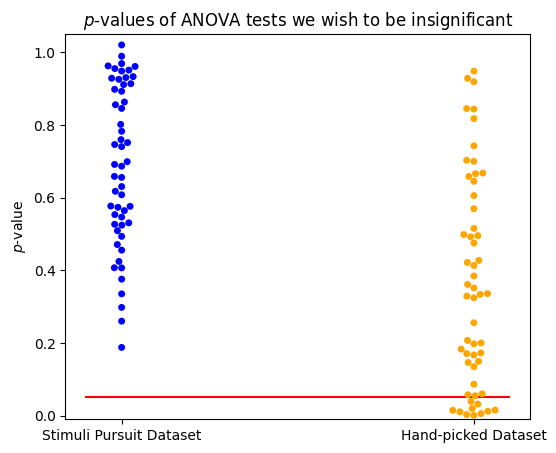

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
array1,array2 = fakeq, r_kamilq[2] #rq[2]
array1,array2 = po,heu
# add = np.random.random(array1[array1<0.07].shape)/12+0.02
# array1[array1<0.07] += add
# Combine arrays and create a 'hue' variable to differentiate them
data = np.concatenate((array1, array2))
hue = ['Stimuli Pursuit Dataset'] * len(array1) + ['Heuristic Method Dataset'] * len(array2)

# Create a DataFrame for seaborn plotting
import pandas as pd
df = pd.DataFrame({'Value': data, 'Array': hue})

# Create the swarmplot
plt.figure(figsize=(6,5))
sns.swarmplot(x='Array', y='Value', data=df, palette=['blue', 'orange'])
plt.plot([-.1,1.1],[0.05,0.05],'r')

# Customize the plot with titles, labels, etc.
plt.title('$p$-values of ANOVA tests we wish to be insignificant')
plt.ylabel('$p$-value')
plt.xlabel('')
plt.ylim(-.01,1.05)
plt.savefig('anova_p_values_plot3.png', dpi=300)

plt.show()


In [ ]:
def hsmp(df,conditions,columns,n_per_cond,i_start,lamb, result_smp = None):
  from tables.flavor import restrict_flavors
  if result_smp is None: result_smp,(a,b,c) = smp(df,conditions,columns,n_per_cond)
  else: result_smp,(a,b,c) = result_smp
  target_sd = result_smp.groupby([a,b,c]).std().max().values
  col_names = df.columns[columns]
  s,f,atoms = dict(),dict(),dict()
  for c in conditions.keys():
    s[c] = df.values[:,columns] - conditions[c]
    f[c] = np.array([0]*len(conditions[c]))
    atoms[c] = []


  result = pd.DataFrame({"word":[],"ratings":[],"std":[],"ind":[],"aro_rank":[],"ori_rank":[],"sig_rank":[]})
  for i in range(n_per_cond):
    for c in conditions.keys():
      dots = np.linalg.norm(s[c]-f[c],axis=1)
      if i_start[1]>=i>=i_start[0]:  #np.linalg.norm(np.array(atoms[c]).std(axis=0) - target_sd)>target_sd/10
        c_var =  np.array(atoms[c]).var(axis=0)
        new_var = (i)/(i+1)*(c_var + (np.array(atoms[c]).mean(axis=0) - s[c])**2/(i+1))
        # print(np.array([atoms[c]+[w] for w in s[c]]))
        # new_var = (np.array([atoms[c]+[w] for w in s[c]])).std
        new_var = np.sqrt(new_var)

        constraint = np.sqrt(((new_var - target_sd)**2).sum(axis=1))
        dots = dots + lamb*constraint
      constraint = s[c]
      ind = np.argmin(dots)
      atom = df.iloc[ind,columns]
      std = dots[ind]
      word = df.index[ind]
      result = result.append(({"word":word,"ratings":atom.values,"std":std,"ind":ind,"aro_rank":(conditions[c][0]),"ori_rank":conditions[c][1],"sig_rank":conditions[c][2]}),ignore_index=True)
      # atoms[c].append(s[c][ind,:])
      atoms[c].append(atom.values)
      f[c] = f[c] - s[c][ind,:]  # czy dzielimy żeby to była średnia? chyba nie
      for c2 in conditions: s[c2][ind,:] = [99]*len(cols)

  oceny = np.array([m for m in result.ratings])
  result_anova = pd.DataFrame(dict([(c,v) for c,v in zip(df.columns[columns],oceny.T)]))
  for c in result.columns[-3:]:
    result_anova[c] = result[c]
  result_anova.index = result.word
  # display(oceny.mean(axis=0),oceny.std(axis=0))
  return result_anova
# result_smp = smp(ratings,cond,cols,n)
# r,(a,b,c) = result_smp
# hr = hsmp(ratings,cond,cols,n,(4,15),7,result_smp)
display(quality(hr,(a,b,c),ratings.columns[cols], True, True))
quality(r,(a,b,c),ratings.columns[cols], True, True)
# ratings.loc[[m for m in hr.index],:]


0.954
1.000
0.999
0.207
0.998
1.000
0.953
0.948
Works


(True,
 array([5.52332101e-65, 1.25415790e-57, 7.62065875e-57]),
 array([0.21498319, 0.34918152, 0.96743995, 0.97769102, 0.40675777,
        0.94428722, 0.46703441, 0.70618497, 0.6620345 , 0.57528437,
        0.22434816, 0.68260316, 0.39100983, 0.78796391, 0.85647121,
        0.89147152, 0.99520807, 0.68409943, 0.51908062, 0.79247086,
        0.70051228, 0.96906258, 0.84682218, 0.98894535, 0.95852061,
        0.84737922, 0.78336152, 0.58245413, 0.94630343, 0.83988231,
        0.94630343, 0.8366268 , 0.95794115, 0.81763059, 0.53482414,
        0.88912495, 0.97345852, 0.55252652, 0.80681328, 0.71760911,
        0.86899656, 0.62620599, 0.67517195, 0.94453377, 0.98317002,
        0.75335814, 0.70979366, 0.8635969 , 0.27205948, 0.89167655,
        0.95812966, 0.97723548, 0.8614049 ]),
 [0.9539055866042723,
  0.9997580276571644,
  0.9990492099708876,
  0.20719687614657203,
  0.998127653117439,
  0.9999868521506989,
  0.9531396588978547,
  0.9480357137297143],
 [0.05399768054485321,
  0.62994

0.005
0.012
0.131
0.000
0.140
0.185
0.177
0.627
Works


(True,
 array([2.10094344e-100, 1.64629040e-097, 7.68208496e-089]),
 array([0.14538047, 0.2087784 , 0.87164307, 0.81675577, 0.62245654,
        0.97813153, 0.34018939, 0.77617104, 0.57313584, 0.53518521,
        0.36034854, 0.55351468, 0.30200687, 0.71564414, 0.46648771,
        0.82080294, 0.594552  , 0.60193815, 0.30021342, 0.96895601,
        0.84594361, 0.77301235, 0.97051542, 0.73541792, 0.84659649,
        0.85876675, 0.94325537, 0.72194   , 0.82748042, 0.76029072,
        0.8959628 , 0.59351618, 0.87998811, 0.86571212, 0.53976448,
        0.8645866 , 0.72856322, 0.89876607, 0.8026117 , 0.99055906,
        0.61154135, 0.73918852, 0.89145872, 0.83886879, 0.93795048,
        0.799283  , 0.55477672, 0.79888892, 0.20937948, 0.74728691,
        0.84763542, 0.93066992, 0.84564189]),
 [0.005391823148312092,
  0.011531206666700319,
  0.13134266789221027,
  1.3757356722475788e-08,
  0.14049255877677355,
  0.18544830373179497,
  0.17730140777116607,
  0.6268270035390935],
 [0.4283302724361

In [ ]:
hr.to_csv('aro_ori_sig_homogenious.csv')

In [ ]:
class Stimuli():
  def __init__(self):
    self.name = name
    self.values = values
    self.stimuli = stimuli

  def __len__(self):
    return len(self.stimuli)



class Condition():
  def __init__(self,name,values,stimuli = None):
    self.name = name
    self.values = values
    self.stimuli = stimuli
    self.mask = np.zeros(len(stimuli))


In [ ]:
amax,bmax,cmax = 1,1,1

def cond_cube(max,levels):
  levels = np.array(levels)
  n_contr = np.sum(levels==1)
  n_manip  = np.sum(levels!=1)
  cond = np.zeros((len(levels),*levels[levels!=1]))
  for i, (m,l) in enumerate(zip(max,levels)):
    index = np.ones(n_manip).astype(int)
    if i<n_manip: index[i] = -1
    cond[i] = np.linspace(-m,m,l).reshape(*index)
  return cond

cube = (cond_cube([1,1,1,0,0],[3,3,2,1,1]))
def main(cube):
  axes = set([*range(1, len(cube.shape))])
  ms = []
  for i in range(1,len(cube.shape)):
    m_axes = tuple(axes - set([i]))
    ms.append(cube.mean(axis = m_axes))
  return ms

def main(cube):
  # Wywołujesz [poziom][efekt]
  axes = set([*range(len(cube.shape))])
  ms=[]
  for i in range(len(cube.shape)):
    m_axes = tuple(axes - set([i]))
    ms.append(cube.mean(axis = m_axes))
  return ms


def inter2(cube):
  inter = cube.copy()
  for dim in range(len(cube.shape)):
    inter -= main(cube)
  return inter

# def cond_m(cube,*ijk):

# m = 0 + main(cube)[:,:,0].sum()+interact(cube)[:,0,1]
cube
# print(main(cube[0]))
# inter2(cube)
# ols()

array([[[[-1., -1.],
         [-1., -1.],
         [-1., -1.]],

        [[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]],

        [[ 1.,  1.],
         [ 1.,  1.],
         [ 1.,  1.]]],


       [[[-1., -1.],
         [ 0.,  0.],
         [ 1.,  1.]],

        [[-1., -1.],
         [ 0.,  0.],
         [ 1.,  1.]],

        [[-1., -1.],
         [ 0.,  0.],
         [ 1.,  1.]]],


       [[[-1.,  1.],
         [-1.,  1.],
         [-1.,  1.]],

        [[-1.,  1.],
         [-1.,  1.],
         [-1.,  1.]],

        [[-1.,  1.],
         [-1.,  1.],
         [-1.,  1.]]],


       [[[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]],

        [[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]],

        [[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]]],


       [[[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]],

        [[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]],

        [[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]]]])

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

moore_lm = ols('conformity ~ C(fcategory, Sum)*C(partner_status, Sum)', data=data).fit()

In [ ]:
#@title big auciton

def auction(df,conditions,columns,s,f,atoms,result,selection):
  my_selection = dict()
  auctioned = dict()
  for c in conditions.keys():
    auctioned[c] = False
    stimuli = np.arange(len(s[c])) #Redundant
    my_selection[c] = np.zeros_like(selection).astype(bool)
    my_selection[c][[m[0] for m in atoms[c]]] = True
  for c in conditions.keys():
    selected_s = s[c][(selection) & ~(my_selection[c])]
    dist = np.linalg.norm(selected_s-f[c],axis=1)
    ind = np.argmin(dist)
    org_ind = stimuli[(selection) & ~(my_selection[c])][ind]
    atom = selected_s[ind,:]
    if np.linalg.norm(f[c] - atom) < np.linalg.norm(f[c]):
      # Ask the other condition if you can steal
      other_c = [m for m in conditions if org_ind in [mm[0] for mm in atoms[m]] ][0]
      # print(f"{c} says: I want to steal from {other_c}")
      f2 = f.copy()
      f2[c] = f[c] - atom
      f2[other_c] = f2[other_c] + atom

      dist = np.linalg.norm(s[other_c]-f2[other_c],axis=1)
      dist[selection] = 99
      other_ind = np.argmin(dist)
      other_atom = s[other_c][other_ind,:]
      f2[c] = f2[other_c] - other_atom
      # Is the deal beneficial?
      if loss(f2)<loss(f):
        # print("Sure")
        f = f2
        selection[other_ind] = True
        test = len(atoms[other_c])
        full_atom = (org_ind,atom)
        atoms[other_c] = [m for m in atoms[other_c] if m[0] != org_ind]
        if len(atoms[other_c]) == test: print("Failed")
        atoms[c].append(full_atom)
        result.loc[len(result)] = [df.index[other_ind], df.iloc[other_ind,columns].values, dist[other_ind], other_ind, conditions[other_c][0],conditions[other_c][1],conditions[other_c][2]]
        result.loc[result.ind == ind,:].iloc[:,-3:] = [conditions[c][0],conditions[c][1],conditions[c][2]]
        auctioned[c] = True
        for c in conditions.keys():
          my_selection[c] = np.zeros_like(selection).astype(bool)
          my_selection[c][[m[0] for m in atoms[c]]] = True

      else:
        auctioned[c] = False



In [ ]:
#@title Picky SMP
# def pick(D,f,selection)

def loss(f):
  return np.mean(np.linalg.norm(list(f.values())))

def auction(df,conditions,c,other_dist,columns,s,f,atoms,result,selection):
  my_selection = dict()
  auctioned = False
  for c in conditions.keys():
    stimuli = np.arange(len(s[c])) #Redundant
    my_selection[c] = np.zeros_like(selection).astype(bool)
    my_selection[c][[m[0] for m in atoms[c]]] = True

  selected_s = s[c][(selection) & ~(my_selection[c])]
  dist = np.linalg.norm(selected_s-f[c],axis=1)
  ind = np.argmin(dist)
  org_ind = stimuli[(selection) & ~(my_selection[c])][ind]
  atom = selected_s[ind,:]
  if np.linalg.norm(f[c] - atom) < np.min([np.linalg.norm(f[c]),other_dist]):
    # Ask the other condition if you can steal
    other_c = [m for m in conditions if org_ind in [mm[0] for mm in atoms[m]] ][0]
    print(f"{c} says: I want to steal from {other_c}")
    f2 = f.copy()
    f2[c] = f[c] - atom
    f2[other_c] = f2[other_c] + atom

    dist = np.linalg.norm(s[other_c]-f2[other_c],axis=1)
    dist[selection] = 99
    other_ind = np.argmin(dist)
    other_atom = s[other_c][other_ind,:]
    f2[c] = f2[other_c] - other_atom
    # Is the deal beneficial?
    if loss(f2)<loss(f):
      print("Sure")
      f = f2
      selection[other_ind] = True
      test = len(atoms[other_c])
      full_atom = (org_ind,atom)
      atoms[other_c] = [m for m in atoms[other_c] if m[0] != org_ind]
      if len(atoms[other_c]) == test: print("Failed")
      atoms[c].append(full_atom)
      result.loc[len(result)] = [df.index[other_ind], df.iloc[other_ind,columns].values, dist[other_ind], other_ind, conditions[other_c][0],conditions[other_c][1],conditions[other_c][2]]
      result.loc[result.ind == ind,:].iloc[:,-3:] = [conditions[c][0],conditions[c][1],conditions[c][2]]
      auctioned = True
      for c in conditions.keys():
        my_selection[c] = np.zeros_like(selection).astype(bool)
        my_selection[c][[m[0] for m in atoms[c]]] = True
    else:
      auctioned = False


  return auctioned,s,f,atoms,result,selection


def psmp(df,conditions,columns,n_per_cond,i_start, max_rounds = 1,i_auction = 3,result_smp = None):
  from tables.flavor import restrict_flavors
  if result_smp is None: result_smp,(c1,c2,c3) = smp(df,conditions,columns,n_per_cond)
  else: result_smp,(c1,c2,c3) = result_smp
  target_sd = result_smp.groupby([c1,c2,c3]).var().mean().values
  col_names = df.columns[columns]
  s,f,atoms,auctioned = dict(),dict(),dict(),dict()
  selection = np.zeros(len(df.values[:,columns])).astype(bool)
  for c in conditions.keys():
    s[c] = df.values[:,columns] - conditions[c]
    f[c] = np.array([0]*len(conditions[c]))
    atoms[c] = []
    auctioned = False


  result = pd.DataFrame({"word":[],"ratings":[],"norm":[],"ind":[],"aro_rank":[],"ori_rank":[],"sig_rank":[]})
  for i in range(n_per_cond):
    for c in conditions.keys():
      dots = np.linalg.norm(s[c]-f[c],axis=1)
      dots[selection] = 99

      ind = np.argmin(dots)
      if i>i_auction:
        auctioned,s,f,atoms,result,selection = auction(df,conditions,c,dots[ind],columns,s,f,atoms,result,selection)
      if not auctioned:
        f[c] = f[c] - s[c][ind,:]
        selection[ind] = True

        result = result.append(({"word":df.index[ind],"ratings":df.iloc[ind,columns].values,"norm":dots[ind],"ind":ind,c1:(conditions[c][0]),c2:conditions[c][1],c3:conditions[c][2]}),ignore_index=True)
        atoms[c].append((ind,s[c][ind,:]))
      else:
        auctioned = False

      # Drop signals
      if i>=i_start:
        i_round = 0
        while i_round < max_rounds:
          i_round+=1
          changes = 0
          for n_atom, (indx, atom) in enumerate(atoms[c]):
            # if it increases fit, and would not be picked again in this step
            if np.linalg.norm(f[c] + atom)<np.linalg.norm(f[c]):# and not np.all(np.linalg.norm(f[c])<dots):
              # print("I TAKE THAT BACK")
              # I think calculating if i would pick the same one is more costly than just picking the same one if thats better
              selection[indx] = False
              result = result.loc[result.ind!=indx,:]
              f[c] = f[c] + atom
              dots = np.linalg.norm(s[c]-f[c],axis=1)
              dots[selection] = 99

              ind = np.argmin(dots)
              # print(ind==indx)
              f[c] = f[c] - s[c][ind,:]
              selection[ind] = True
              result = result.append(({"word":df.index[ind],"ratings":df.iloc[ind,columns].values,"norm":dots[ind],"ind":ind,c1:(conditions[c][0]),c2:conditions[c][1],c3:conditions[c][2]}),ignore_index=True)
              if ind != indx: changes+=1
              atoms[c][n_atom] = (ind,s[c][ind,:])
              # atoms[c].pop(n_atom)
              # atoms[c].append((ind,s[c][ind,:]))
          # if changes!= 0 : print(changes)
          # if changes == 0 and i_round>1:
          #   print(changes, i_round, "No change")
          if changes == 0 and i_round>5: break
      # for c2 in conditions: s[c2][ind,:] = [99]*len(cols)

  oceny = np.array([m for m in result.ratings])
  result_anova = pd.DataFrame(dict([(c,v) for c,v in zip(df.columns[columns],oceny.T)]))
  for col in [c1,c2,c3]:
    result_anova[col] = result[col]
  result_anova.index = result.word
  # display(oceny.mean(axis=0),oceny.std(axis=0))
  print(loss(f))
  return result_anova

df = ratings.copy()
# df = df.loc[(df.Valence_M<1) & (df.Valence_M>-1),:]
result_smp = smp(df,cond,cols,n)
hr = result_smp[0]
hr2 = psmp(df,cond,cols,n,2,30,20,result_smp) # picky (not homogenous)
hr3 = psmp(df,cond,cols,n,2,30,3,result_smp)  # picky with auction

display(quality(result_smp[0],(a,b,c),df.columns[cols]))
display(quality(hr2,(a,b,c),df.columns[cols])) #didnt auction
quality(hr3,(a,b,c),ratings.columns[cols])
# ratings.loc[[m for m in hr.index],:]
# hr

In [ ]:

fakeq = quality(hr3, (a,b,c), ratings.columns[cols], False, True)[2]

In [ ]:
ddr, (a,b,c)
# df = r.groupby([a,b,c]).mean()
df = r
# reshape_size = tuple([len(x) for x in df.index.levels])
# r.groupby([a,b,c]).mean().values.reshape((3,3,3,-1))
#droplevel([0,1]).
def rel_effects(df,obs):
  pass

def main(df, var_i, add = None,cond = None):
  df_copy = df.reset_index()
  col = df_copy.columns[var_i]
  observed = df_copy.groupby(col).mean().iloc[:,2:].values
  observed_n = df_copy.groupby(col).count().iloc[:,2:].values
  target = np.zeros_like(observed)
  levels = len(target[:,var_i])
  target_effect = np.abs((observed[-1,var_i] - observed[0,var_i])/2)
  target_effect = np.linspace(-1*target_effect,target_effect,levels)

  # effect = (observed[:(levels//2):-1,i] - observed[:(levels//2),i])/2
  if add is not None: observed+=add
  target[:,var_i] = target_effect.flatten()
  loss = np.linalg.norm(observed - target)
  return

def main_size(df):
  ranks = list(df.index.names)
  df_copy = df.reset_index()
  eff = []
  for var_i,col in enumerate(ranks):
    observed = df_copy.iloc[:,[var_i,var_i+len(ranks)]].groupby(col).mean()
    eff.append(observed)
  return eff


def asmp(df,conditions,columns,n_per_cond):
  from tables.flavor import restrict_flavors

  ranks = "aro_rank","ori_rank","sig_rank"
  col_names = df.columns[columns]
  s,f = dict(),dict()
  for c in conditions.keys():
    s[c] = df.values[:,columns] - conditions[c]
    f[c] = np.array([0]*len(conditions[c]))

  result = pd.DataFrame({})
  for i in range(n_per_cond):
    for c_n,c in enumerate(conditions.keys()):
      dots = np.linalg.norm(f[c]-s[c], axis=1)
      ind = np.argmin(dots)
      atom = df.iloc[ind,columns]
      std = dots[ind]
      word = df.index[ind]
      new_line = df.iloc[ind,columns]
      new_line["aro_rank"],new_line["ori_rank"],new_line["sig_rank"] = conditions[c][0],conditions[c][1],conditions[c][2]
      result = result.append(new_line)
      main(result.groupby([m for m in ranks]).mean(),0)
      f[c] = f[c] - s[c][ind,:]
      for c2 in conditions: s[c2][ind,:] = [99]*len(columns)


  return result, ranks

cols = [1,3,4,0,-2,-1,-3,-4]
n = 15
cond = dict()
for i in np.linspace(-1,1,3):
  for j in np.linspace(-1,1,3):
    for k in np.linspace(-1,1,3):
      cond[f"{i},{j},{k}"] = np.array([i,j,k,0,0,0,0,0])

r,_ = asmp(ratings,cond,cols,n)
# display(r.groupby([a,b,c]).std())
# r.groupby([a,b,c]).mean()
# main(df,2)


In [ ]:
# find match takes in mask, if lambda
for ef in main_size(r.groupby([a,b,c]).mean()):
  display((r.groupby([a,b,c]).mean() - ef).dropna(axis=1))

arousal_M
aro_rank ori_rank sig_rank           
-1.0     -1.0     -1.0       0.019196
                   0.0       0.006949
                   1.0       0.079913
          0.0     -1.0      -0.007664
                   0.0      -0.011122
                   1.0       0.046809
          1.0     -1.0      -0.108866
                   0.0      -0.018790
                   1.0      -0.006425
 0.0     -1.0     -1.0       0.054988
                   0.0       0.042111
                   1.0       0.057768
          0.0     -1.0      -0.031765
                   0.0       0.020798
                   1.0      -0.015820
          1.0     -1.0      -0.128551
                   0.0      -0.032244
                   1.0       0.032716
 1.0     -1.0     -1.0      -0.007215
                   0.0       0.093843
                   1.0       0.062529
          0.0     -1.0      -0.058030
                   0.0      -0.022019
                   1.0       0.097805
          1.0     -1.0      -0.106610
                   0.0      -0.054643
                   1.0      -0.005659

origin_M
aro_rank ori_rank sig_rank          
-1.0     -1.0     -1.0      0.101236
                   0.0      0.071005
                   1.0     -0.008664
          0.0     -1.0      0.025274
                   0.0      0.047937
                   1.0      0.056031
          1.0     -1.0      0.028066
                   0.0      0.026447
                   1.0     -0.086870
 0.0     -1.0     -1.0      0.059981
                   0.0     -0.011901
                   1.0     -0.050753
          0.0     -1.0      0.026000
                   0.0     -0.016816
                   1.0     -0.063662
          1.0     -1.0     -0.020498
                   0.0      0.041017
                   1.0      0.091200
 1.0     -1.0     -1.0     -0.018928
                   0.0     -0.075035
                   1.0     -0.066941
          0.0     -1.0     -0.007137
                   0.0     -0.034623
                   1.0     -0.033004
          1.0     -1.0     -0.173322
                   0.0      0.082082
                   1.0      0.011878

significance_M
aro_rank ori_rank sig_rank                
-1.0     -1.0     -1.0            0.076669
                   0.0           -0.034325
                   1.0           -0.002290
          0.0     -1.0           -0.061167
                   0.0           -0.024962
                   1.0           -0.074776
          1.0     -1.0           -0.131718
                   0.0           -0.032765
                   1.0           -0.042004
 0.0     -1.0     -1.0            0.035588
                   0.0            0.006249
                   1.0            0.014176
          0.0     -1.0           -0.014701
                   0.0            0.015613
                   1.0            0.003252
          1.0     -1.0           -0.098621
                   0.0            0.032715
                   1.0            0.024431
 1.0     -1.0     -1.0            0.032024
                   0.0            0.000007
                   1.0            0.056662
          0.0     -1.0            0.067595
                   0.0           -0.003114
                   1.0           -0.052928
          1.0     -1.0            0.094331
                   0.0            0.040582
                   1.0            0.073477

In [ ]:
def nsmp(df,conditions,columns,n_per_cond,noise_amp, n_tries, result_smp = None):
  from tables.flavor import restrict_flavors
  col_names = df.columns[columns]
  if result_smp is None: result_smp,(a,b,c) = smp(df,conditions,columns,n_per_cond)
  else: result_smp,(a,b,c) = result_smp
  q = quality(result_smp, (a,b,c),col_names)
  print("Orignial:",q[1],q[2])
  q_manip,q_contr = q[1],q[2]
  final_result = result_smp

  for i in range(n_tries):
    s,f,atoms = dict(),dict(),dict()
    for c in conditions.keys():
      s[c] = df.values[:,columns] - conditions[c]
      f[c] = np.array([0]*len(conditions[c]))
      atoms[c] = []

    result = pd.DataFrame({"word":[],"ratings":[],"std":[],"ind":[],"aro_rank":[],"ori_rank":[],"sig_rank":[]})
    for i in range(n_per_cond):
      for c in conditions.keys():
        if i > int(n_per_cond*8/10):
          dots = np.linalg.norm(s[c]-f[c],axis=1)
        else:
          dots = np.linalg.norm(s[c]-f[c],axis=1) + np.random.rand(len(s[c])) * noise_amp / (i+1)
        # print(dots)
        constraint = s[c]
        ind = np.argmin(dots)
        atom = df.iloc[ind,columns]
        std = dots[ind]
        word = df.index[ind]
        result = result.append(({"word":word,"ratings":atom.values,"std":std,"ind":ind,"aro_rank":(conditions[c][0]),"ori_rank":conditions[c][1],"sig_rank":conditions[c][2]}),ignore_index=True)
        # atoms[c].append(s[c][ind,:])
        atoms[c].append(atom.values)
        f[c] = f[c] - s[c][ind,:]  # czy dzielimy żeby to była średnia? chyba nie
        for c2 in conditions: s[c2][ind,:] = [99]*len(cols)

    oceny = np.array([m for m in result.ratings])
    result_anova = pd.DataFrame(dict([(c,v) for c,v in zip(df.columns[columns],oceny.T)]))
    for c in result.columns[-3:]:
      result_anova[c] = result[c]
    result_anova.index = result.word
    q_temp = quality(result_anova, (a,b,c), col_names)
    print(q_temp[:3])
    if q_temp[1]<  q_manip and q_temp[2] <  q_contr:
      print("Jackpot")
      final_result = result_anova
      q_manip,q_contr = (q_temp[1],q_temp[2])

  # display(oceny.mean(axis=0),oceny.std(axis=0))
  return final_result
result_smp = smp(ratings,cond,cols,n)
# hr = nsmp(ratings,cond,cols,n,.5,100,result_smp)
# hr = nsmp(ratings,cond,cols,n,.5,100,result_smp)
display(quality(hr,(a,b,c),ratings.columns[cols]))
# quality(result_smp[1],(a,b,c),ratings.columns[cols])
# ratings.loc[[m for m in hr.index],:]


(True,
 4.167015607298508e-50,
 0.17792157932011027,
 0.9460905793968329,
 0.4181915331137134)

##Analyzing the Algo

In [ ]:
params = []
# result_smp = smp(ratings,cond,cols,n)
i_start = [*range(2,14,1)]
lamb = [*np.arange(0,7,1)]
x,y = np.meshgrid(i_start,lamb)
for i,j in zip(x.flatten(),y.flatten()):
    params.append(hsmp(ratings,cond,cols,n,i,j,result_smp))



In [ ]:
good = [quality(m,(a,b,c),ratings.columns[cols],all=True) for m in params]
n,m = x.shape
exp = np.array([np.mean(m[1]) for m in good]).reshape((n,m))
unexp = np.array([ptransform(m[2]) for m in good]).reshape((n,m))
lev_min = np.array([np.min(m[3]]) for m in good]).reshape((n,m))
lev_mean = np.array([np.mean(m[3]) for m in good]).reshape((n,m))
norm_min = np.array([np.min(m[4]) for m in good]).reshape((n,m))
norm_mean = np.array([np.mean(m[4]) for m in good]).reshape((n,m))

<ipython-input-81-0e0c41a66520>:28: RuntimeWarning: overflow encountered in power
  return  np.mean(expected), np.mean(2**(1/unexpected)-2), levene, normality


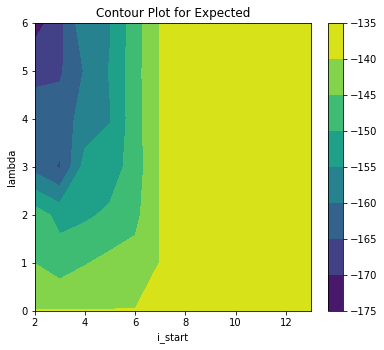

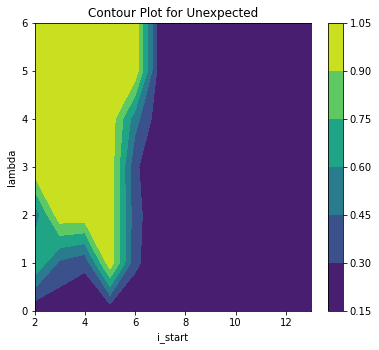

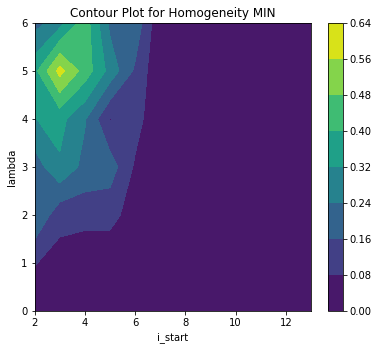

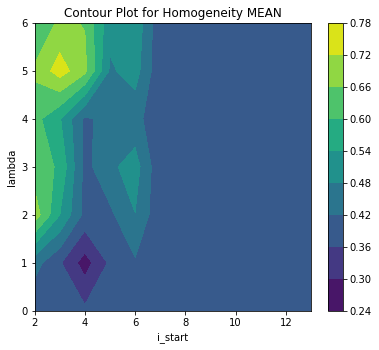

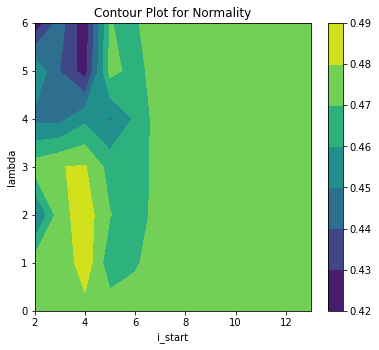

In [ ]:
def nice_contour(x,y,z,z_name="",zlim = None):
  fig = plt.figure(figsize=(6,5))
  left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
  ax = fig.add_axes([left, bottom, width, height])

  z = z.copy()
  if zlim is not None:
    z[z>zlim[1]] = zlim[1]
    z[z<zlim[0]] = zlim[0]
  cp = plt.contourf(x,y,z)
  plt.colorbar(cp)

  ax.set_title(f'Contour Plot for {z_name}')
  ax.set_xlabel('i_start')
  ax.set_ylabel('lambda')

  plt.show()

nice_contour(x, y, np.log(exp),"Expected")
nice_contour(x, y, unexp,"Unexpected",(0,1))
nice_contour(x, y, lev_min,"Homogeneity MIN")
nice_contour(x, y, lev_mean,"Homogeneity MEAN")
nice_contour(x, y, norm_mean,"Normality")

In [ ]:
# hr = hsmp(ratings,cond,cols,n,3,1.9,result_smp)
test_df = hr
groups = [(ind,m) for ind,m in test_df.groupby([a,b,c])]
display(test_df.groupby([a,b,c]).std().mean(),test_df.groupby([a,b,c]).std().std())
st.levene(*[m[1].loc[:,'arousal_M'] for m in groups])

arousal_M                  0.490402
origin_M                   0.571424
significance_M             0.563132
Valence_M                  0.846915
Number of Letters          0.672236
Kazojć (2011) frequency    0.631481
ageOfAquisition_M          0.651901
imegability_M              0.804748
dtype: float64

arousal_M                  0.098598
origin_M                   0.140443
significance_M             0.141693
Valence_M                  0.304988
Number of Letters          0.151879
Kazojć (2011) frequency    0.144349
ageOfAquisition_M          0.172133
imegability_M              0.140349
dtype: float64

LeveneResult(statistic=1.0937694802367732, pvalue=0.34486549480552836)

In [ ]:
#@title original code
# from tables.flavor import restrict_flavors
# cols = [1,3,4,0]
# n = 15
# cond = dict()
# for i in range(-1,2):
#   for j in range(-1,2):
#     for k in range(-1,2):
#       cond[f"{i},{j},{k}"] = np.array([i,j,k,0])

# s,f = dict(),dict()
# for c in cond.keys():
#   s[c] = ratings.values[:,cols] - cond[c]
#   f[c] = np.array([0]*len(cond[c]))

# result = pd.DataFrame({"word":[],"ratings":[],"std":[],"ind":[],"aro_rank":[],"ori_rank":[],"sig_rank":[]})
# for i in range(n):
#   for c in cond:
#     dots = np.linalg.norm(s[c]-f[c],axis=1)
#     ind = np.argmin(dots)
#     atom = ratings.iloc[ind,cols]
#     std = dots[ind]
#     word = ratings.index[ind]
#     result = result.append(({"word":word,"ratings":atom.values,"std":std,"ind":ind,"aro_rank":(cond[c][0]),"ori_rank":cond[c][1],"sig_rank":cond[c][2]}),ignore_index=True)
#     f[c] = f[c] - s[c][ind,:]  # czy dzielimy żeby to była średnia? chyba nie
#     for c2 in cond: s[c2][ind,:] = [99,99,99,99]

# oceny = np.array([m for m in result.ratings])
# result_anova = pd.DataFrame(dict([(c,v) for c,v in zip(ratings.columns[cols],oceny.T)]))
# for c in result.columns[-3:]:
#   result_anova[c] = result[c]
# display(oceny.mean(axis=0),oceny.std(axis=0))
# display(result_anova)

In [ ]:

# Performing two-way ANOVA
for col in ratings.columns[cols]:
    model = ols(f"""Q("{col}") ~ C({a}) + C({b}) + C({c}) + C({a}):C({b}) + C({b}):C({c}) + C({c}):C({a}) + C({a}):C({b}):C({c})""",
              data=hr3).fit()
    result = sm.stats.anova_lm(model, type=3)
    display(result)

,df,sum_sq,mean_sq,F,PR(>F)
C(aro_rank),2.0,311.526440,155.763220,481.349076,1.982608e-118
C(ori_rank),2.0,0.177667,0.088833,0.274518,7.600498e-01
C(sig_rank),2.0,0.601024,0.300512,0.928661,3.957456e-01
C(aro_rank):C(ori_rank),4.0,0.124998,0.031250,0.096569,9.835366e-01
C(ori_rank):C(sig_rank),4.0,0.096703,0.024176,0.074709,9.898572e-01
C(sig_rank):C(aro_rank),4.0,0.166605,0.041651,0.128714,9.719648e-01
C(aro_rank):C(ori_rank):C(sig_rank),8.0,0.098676,0.012334,0.038117,9.999796e-01
Residual,513.0,166.005371,0.323597,NaN,NaN


,df,sum_sq,mean_sq,F,PR(>F)
C(aro_rank),2.0,0.473890,0.236945,0.584813,5.575811e-01
C(ori_rank),2.0,340.977996,170.488998,420.790448,6.872827e-109
C(sig_rank),2.0,0.036032,0.018016,0.044466,9.565122e-01
C(aro_rank):C(ori_rank),4.0,0.115764,0.028941,0.071431,9.906875e-01
C(ori_rank):C(sig_rank),4.0,0.316380,0.079095,0.195217,9.408719e-01
C(sig_rank):C(aro_rank),4.0,0.026783,0.006696,0.016526,9.994637e-01
C(aro_rank):C(ori_rank):C(sig_rank),8.0,0.265231,0.033154,0.081828,9.996242e-01
Residual,513.0,207.848958,0.405164,NaN,NaN


,df,sum_sq,mean_sq,F,PR(>F)
C(aro_rank),2.0,0.262483,0.131241,0.332725,7.171218e-01
C(ori_rank),2.0,0.029816,0.014908,0.037795,9.629134e-01
C(sig_rank),2.0,313.513211,156.756605,397.411405,5.627420e-105
C(aro_rank):C(ori_rank),4.0,0.105308,0.026327,0.066745,9.918186e-01
C(ori_rank):C(sig_rank),4.0,0.006977,0.001744,0.004422,9.999610e-01
C(sig_rank):C(aro_rank),4.0,0.127763,0.031941,0.080977,9.881827e-01
C(aro_rank):C(ori_rank):C(sig_rank),8.0,0.083627,0.010453,0.026502,9.999951e-01
Residual,513.0,202.349851,0.394444,NaN,NaN


,df,sum_sq,mean_sq,F,PR(>F)
C(aro_rank),2.0,0.714423,0.357211,0.429366,0.651155
C(ori_rank),2.0,0.053644,0.026822,0.032240,0.968276
C(sig_rank),2.0,0.056372,0.028186,0.033879,0.966690
C(aro_rank):C(ori_rank),4.0,0.018404,0.004601,0.005530,0.999939
C(ori_rank):C(sig_rank),4.0,0.023114,0.005779,0.006946,0.999904
C(sig_rank):C(aro_rank),4.0,0.124735,0.031184,0.037483,0.997317
C(aro_rank):C(ori_rank):C(sig_rank),8.0,0.201647,0.025206,0.030297,0.999992
Residual,513.0,426.790378,0.831950,NaN,NaN


,df,sum_sq,mean_sq,F,PR(>F)
C(aro_rank),2.0,0.016829,0.008414,0.013986,0.986112
C(ori_rank),2.0,0.002942,0.001471,0.002445,0.997558
C(sig_rank),2.0,0.066735,0.033367,0.055460,0.946056
C(aro_rank):C(ori_rank),4.0,0.015662,0.003915,0.006508,0.999916
C(ori_rank):C(sig_rank),4.0,0.060860,0.015215,0.025289,0.998759
C(sig_rank):C(aro_rank),4.0,0.033560,0.008390,0.013945,0.999617
C(aro_rank):C(ori_rank):C(sig_rank),8.0,0.095845,0.011981,0.019913,0.999998
Residual,513.0,308.644649,0.601646,NaN,NaN


,df,sum_sq,mean_sq,F,PR(>F)
C(aro_rank),2.0,0.001394,0.000697,0.001692,0.998309
C(ori_rank),2.0,0.033904,0.016952,0.041141,0.959697
C(sig_rank),2.0,0.159211,0.079605,0.193193,0.824383
C(aro_rank):C(ori_rank),4.0,0.104336,0.026084,0.063303,0.992607
C(ori_rank):C(sig_rank),4.0,0.058505,0.014626,0.035496,0.997588
C(sig_rank):C(aro_rank),4.0,0.042225,0.010556,0.025619,0.998727
C(aro_rank):C(ori_rank):C(sig_rank),8.0,0.056118,0.007015,0.017024,0.999999
Residual,513.0,211.381896,0.412050,NaN,NaN


,df,sum_sq,mean_sq,F,PR(>F)
C(aro_rank),2.0,0.066816,0.033408,0.059653,0.942098
C(ori_rank),2.0,0.015650,0.007825,0.013972,0.986126
C(sig_rank),2.0,0.038143,0.019071,0.034054,0.966522
C(aro_rank):C(ori_rank),4.0,0.073948,0.018487,0.033010,0.997907
C(ori_rank):C(sig_rank),4.0,0.055707,0.013927,0.024867,0.998799
C(sig_rank):C(aro_rank),4.0,0.007791,0.001948,0.003478,0.999976
C(aro_rank):C(ori_rank):C(sig_rank),8.0,0.104565,0.013071,0.023339,0.999997
Residual,513.0,287.300293,0.560040,NaN,NaN


,df,sum_sq,mean_sq,F,PR(>F)
C(aro_rank),2.0,0.163171,0.081586,0.111345,0.894652
C(ori_rank),2.0,0.027948,0.013974,0.019071,0.981111
C(sig_rank),2.0,0.642707,0.321353,0.438569,0.645200
C(aro_rank):C(ori_rank),4.0,0.107359,0.026840,0.036630,0.997435
C(ori_rank):C(sig_rank),4.0,0.027313,0.006828,0.009319,0.999828
C(sig_rank):C(aro_rank),4.0,0.014965,0.003741,0.005106,0.999948
C(aro_rank):C(ori_rank):C(sig_rank),8.0,0.107278,0.013410,0.018301,0.999999
Residual,513.0,375.891039,0.732731,NaN,NaN


In [ ]:
# Importing libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols
baza = pd.read_excel('/content/3_lista_ARO_SIG_ORI.xlsx')
a2,b2,c2 = 'Alevel', 'Olevel', 'Slevel'
# Performing two-way ANOVA
for col in ratings.columns[cols]:
    print("here")
    model = ols(f"""{col} ~ C({a2}) + C({b2}) + C({c2}) + C({a2}):C({b2}) + C({b2}):C({c2}) + C({c2}):C({a2}) + C({a2}):C({b2}):C({c2})""",
              data=baza).fit()
    result = sm.stats.anova_lm(model, type=3)
    display(result)
    model = ols(f"""{col} ~ C({a}) + C({b}) + C({c}) + C({a}):C({b}) + C({b}):C({c}) + C({c}):C({a}) + C({a}):C({b}):C({c})""",
              data=r).fit()
    result = sm.stats.anova_lm(model, type=3)
    display(result)

here


,df,sum_sq,mean_sq,F,PR(>F)
C(Alevel),2.0,150.536406,75.268203,725.741236,3.680530e-130
C(Olevel),2.0,0.246647,0.123324,1.189094,3.056334e-01
C(Slevel),2.0,0.149161,0.074581,0.719112,4.878501e-01
C(Alevel):C(Olevel),4.0,0.235725,0.058931,0.568219,6.858617e-01
C(Olevel):C(Slevel),4.0,0.136247,0.034062,0.328426,8.588441e-01
C(Slevel):C(Alevel),4.0,0.692584,0.173146,1.669486,1.563541e-01
C(Alevel):C(Olevel):C(Slevel),8.0,0.625032,0.078129,0.753325,6.442800e-01
Residual,378.0,39.203203,0.103712,NaN,NaN


,df,sum_sq,mean_sq,F,PR(>F)
C(aro_rank),2.0,250.776014,125.388007,1074.782193,1.084499e-156
C(ori_rank),2.0,0.196285,0.098142,0.841242,4.319804e-01
C(sig_rank),2.0,0.039284,0.019642,0.168365,8.451084e-01
C(aro_rank):C(ori_rank),4.0,0.041832,0.010458,0.089643,9.856679e-01
C(ori_rank):C(sig_rank),4.0,0.105013,0.026253,0.225034,9.243540e-01
C(sig_rank):C(aro_rank),4.0,0.085278,0.021319,0.182743,9.473002e-01
C(aro_rank):C(ori_rank):C(sig_rank),8.0,0.104658,0.013082,0.112136,9.987895e-01
Residual,378.0,44.098857,0.116664,NaN,NaN


here


,df,sum_sq,mean_sq,F,PR(>F)
C(Alevel),2.0,0.273091,0.136545,1.083711,3.393866e-01
C(Olevel),2.0,208.160485,104.080242,826.046189,1.060386e-138
C(Slevel),2.0,0.097218,0.048609,0.385793,6.801785e-01
C(Alevel):C(Olevel),4.0,0.533780,0.133445,1.059103,3.765430e-01
C(Olevel):C(Slevel),4.0,0.740446,0.185112,1.469162,2.108836e-01
C(Slevel):C(Alevel),4.0,0.479569,0.119892,0.951540,4.341579e-01
C(Alevel):C(Olevel):C(Slevel),8.0,1.442844,0.180355,1.431414,1.815820e-01
Residual,378.0,47.627278,0.125998,NaN,NaN


,df,sum_sq,mean_sq,F,PR(>F)
C(aro_rank),2.0,0.084963,0.042481,0.270437,7.631932e-01
C(ori_rank),2.0,258.787507,129.393753,823.723921,1.634817e-138
C(sig_rank),2.0,0.003068,0.001534,0.009766,9.902815e-01
C(aro_rank):C(ori_rank),4.0,0.086099,0.021525,0.137028,9.685421e-01
C(ori_rank):C(sig_rank),4.0,0.049971,0.012493,0.079529,9.885671e-01
C(sig_rank):C(aro_rank),4.0,0.020670,0.005167,0.032896,9.979183e-01
C(aro_rank):C(ori_rank):C(sig_rank),8.0,0.081553,0.010194,0.064896,9.998419e-01
Residual,378.0,59.377708,0.157084,NaN,NaN


here


,df,sum_sq,mean_sq,F,PR(>F)
C(Alevel),2.0,0.057212,0.028606,0.240528,7.863326e-01
C(Olevel),2.0,0.029982,0.014991,0.126049,8.816087e-01
C(Slevel),2.0,191.976741,95.988371,807.099334,3.733191e-137
C(Alevel):C(Olevel),4.0,0.616742,0.154186,1.296439,2.708705e-01
C(Olevel):C(Slevel),4.0,0.487896,0.121974,1.025594,3.938243e-01
C(Slevel):C(Alevel),4.0,0.714328,0.178582,1.501571,2.010391e-01
C(Alevel):C(Olevel):C(Slevel),8.0,0.722249,0.090281,0.759112,6.391365e-01
Residual,378.0,44.955562,0.118930,NaN,NaN


,df,sum_sq,mean_sq,F,PR(>F)
C(aro_rank),2.0,0.007446,0.003723,0.025074,9.752392e-01
C(ori_rank),2.0,0.022092,0.011046,0.074392,9.283215e-01
C(sig_rank),2.0,257.029802,128.514901,865.523411,7.828063e-142
C(aro_rank):C(ori_rank),4.0,0.011640,0.002910,0.019598,9.992478e-01
C(ori_rank):C(sig_rank),4.0,0.060571,0.015143,0.101984,9.817508e-01
C(sig_rank):C(aro_rank),4.0,0.004705,0.001176,0.007923,9.998751e-01
C(aro_rank):C(ori_rank):C(sig_rank),8.0,0.065030,0.008129,0.054746,9.999172e-01
Residual,378.0,56.126307,0.148482,NaN,NaN


here


,df,sum_sq,mean_sq,F,PR(>F)
C(Alevel),2.0,8.010918,4.005459,2.660795,0.071202
C(Olevel),2.0,4.146878,2.073439,1.377369,0.253504
C(Slevel),2.0,8.021711,4.010855,2.664380,0.070950
C(Alevel):C(Olevel),4.0,2.657475,0.664369,0.441335,0.778718
C(Olevel):C(Slevel),4.0,2.091289,0.522822,0.347307,0.845872
C(Slevel):C(Alevel),4.0,2.726262,0.681565,0.452759,0.770381
C(Alevel):C(Olevel):C(Slevel),8.0,6.384360,0.798045,0.530135,0.833813
Residual,378.0,569.026732,1.505362,NaN,NaN


,df,sum_sq,mean_sq,F,PR(>F)
C(aro_rank),2.0,0.300090,0.150045,0.410981,0.663295
C(ori_rank),2.0,0.075695,0.037847,0.103666,0.901552
C(sig_rank),2.0,0.015798,0.007899,0.021636,0.978597
C(aro_rank):C(ori_rank),4.0,0.032755,0.008189,0.022430,0.999019
C(ori_rank):C(sig_rank),4.0,0.054062,0.013516,0.037020,0.997378
C(sig_rank):C(aro_rank),4.0,0.061695,0.015424,0.042247,0.996609
C(aro_rank):C(ori_rank):C(sig_rank),8.0,0.071270,0.008909,0.024402,0.999996
Residual,378.0,138.003898,0.365090,NaN,NaN


Homogeneity

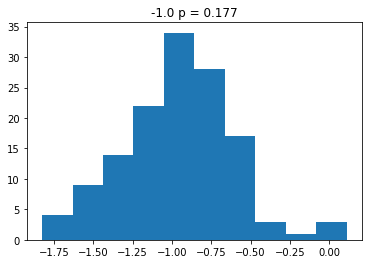

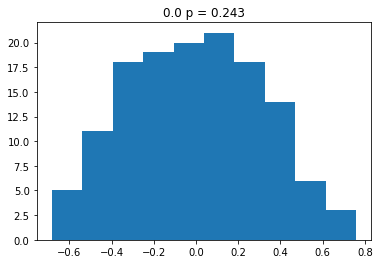

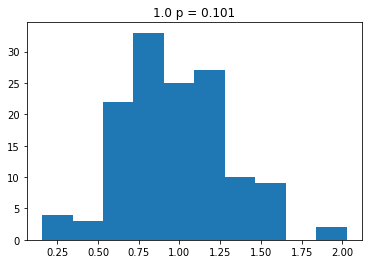

In [ ]:
from scipy.stats import shapiro
from scipy.stats import lognorm

# for g in groups:
#   #perform Shapiro-Wilk test for normality
#   gv = (g[1].loc[:,'arousal_M'])
#   p_norm = shapiro(gv).pvalue
#   plt.hist(gv)
#   plt.title(f"{g[0]} p = {p_norm:.3f}")
#   plt.show()
for g in result_anova.groupby(a):
  #perform Shapiro-Wilk test for normality
  gv = (g[1].loc[:,'arousal_M'])
  p_norm = shapiro(gv).pvalue
  plt.hist(gv)
  plt.title(f"{g[0]} p = {p_norm:.3f}")
  plt.show()


## Symulacje

In [ ]:
r

,arousal_M,origin_M,significance_M,Valence_M,aro_rank,ori_rank,sig_rank
word,,,,,,,
procesja,-0.682787,-0.681243,-1.220930,-0.195106,-1.0,-1.0,-1.0
obrzęd,-0.496017,-0.826082,-0.076994,0.021931,-1.0,-1.0,0.0
nostalgia,-1.032982,-0.753662,0.880177,-0.272394,-1.0,-1.0,1.0
wykusz,-0.991782,-0.134076,-0.901031,0.017987,-1.0,0.0,-1.0
człek,-0.799519,0.079405,-0.053648,0.129503,-1.0,0.0,0.0
...,...,...,...,...,...,...,...
wódka,1.955344,-0.415706,0.203154,0.454112,1.0,0.0,0.0
nieetyczność,1.231609,0.332626,0.926868,-1.478086,1.0,0.0,1.0
sierp,0.741337,0.501604,-1.501077,-0.411513,1.0,1.0,-1.0


In [ ]:
# Pareto optimal

# r = smp(ratings,cond,cols,n)
ratings_select = ratings.iloc[:,cols]
for n_g,(_,g) in enumerate(r.groupby([a,b,c])):
  # g.iloc[0,:-3] = ratings.iloc[12,cols]
  # words = [ratings.index[12]]+list(g.index[1:])
  words = list(g.index)
  m,sd = g.iloc[:,:-3].mean().values,g.iloc[:,:-3].std().values
  target = np.hstack((g.iloc[:,-3:].values[0,:],0))
  for w_add in ratings.index:
    if not w_add in words:
      for i in range(len(g)):
        v = g.iloc[:,:-3].values.copy()
        v[i,:] = ratings_select.loc[w_add,:].values
        m2,sd2 = v.mean(axis=0),v.std(axis=0)
        if np.all(np.abs(m2-target)<np.abs(m-target)) and np.all(sd2<sd):
          print(f"Match at {w_add} for {g.index[i]} in group {n_g}")


# Its optimal because in each step it picks the

Match at nostalgia for woń in group 5
Match at ambulans for macho in group 22
Match at Ukraina for doping in group 22
Match at wilk for doping in group 22
Match at wrzenie for doping in group 22
Match at kryminał for gej in group 25


In [ ]:
'wilk' in np.array(r.index)
# Wilk!!!!
wilk = ratings_select.loc['wilk',:]
display(wilk)
for n_g,(_,g) in enumerate(r.groupby([a,b,c])):
  if n_g ==22:
    ranks = np.hstack((g.iloc[0,-3:].values,0))
    display(g.iloc[:-6,:-3])
    display(g.iloc[-6,:-3])
    # wersja ze średnimi
    print((ranks-g.iloc[:-6,:-3]).sum())
    # print(ranks-g.iloc[:-6,:-3].mean())
    print((ranks-g.iloc[:-6,:-3]).sum() + wilk - ranks)
    print((ranks-g.iloc[:-6,:-3]).sum() + g.iloc[-6,:-3] - ranks)
    # display("wilk", np.linalg.norm((ranks-g.iloc[:-6,:-3].mean() + wilk).values))
    # display("doping",np.linalg.norm((ranks-g.iloc[:-6,:-3].mean() + g.iloc[-6,:-3]).values))
    # Z suma
    display("wilk", np.linalg.norm(((g.iloc[:-6,:-3]).sum() + wilk).values))
    display("doping",np.linalg.norm(((g.iloc[:-6,:-3]).sum() + g.iloc[-6,:-3]).values))
    display(g)

arousal_M         0.671298
origin_M         -0.246728
significance_M   -0.403833
Valence_M         0.098588
Name: wilk, dtype: float64

,arousal_M,origin_M,significance_M,Valence_M
word,,,,
przepych,0.904761,0.042949,-0.123685,-0.226022
prezerwatywa,0.788029,0.308486,0.203154,0.114045
pościg,1.208263,-0.439846,-0.053648,-0.241479
turbo,1.138224,0.308486,-0.053648,0.577773
strzał,1.114877,-0.295007,0.133117,-0.349682
gigant,0.624605,0.308486,-0.170376,0.129503
macho,1.208263,-0.053610,-0.333796,-0.442428
szybkość,1.068185,-0.439846,0.249845,0.886924
oportunista,0.654761,0.362415,0.417552,-0.444360


arousal_M         1.278301
origin_M         -0.391566
significance_M   -0.613943
Valence_M         0.175875
Name: doping, dtype: float64

arousal_M         0.290033
origin_M         -0.102513
significance_M   -0.268513
Valence_M        -0.004274
dtype: float64
arousal_M        -0.038669
origin_M         -0.349241
significance_M   -0.672346
Valence_M         0.094314
dtype: float64
arousal_M         0.568335
origin_M         -0.494080
significance_M   -0.882456
Valence_M         0.171602
dtype: float64


'wilk'

9.38391238892245

'doping'

10.000041292359326

,arousal_M,origin_M,significance_M,Valence_M,aro_rank,ori_rank,sig_rank
word,,,,,,,
przepych,0.904761,0.042949,-0.123685,-0.226022,1.0,0.0,0.0
prezerwatywa,0.788029,0.308486,0.203154,0.114045,1.0,0.0,0.0
pościg,1.208263,-0.439846,-0.053648,-0.241479,1.0,0.0,0.0
turbo,1.138224,0.308486,-0.053648,0.577773,1.0,0.0,0.0
strzał,1.114877,-0.295007,0.133117,-0.349682,1.0,0.0,0.0
gigant,0.624605,0.308486,-0.170376,0.129503,1.0,0.0,0.0
macho,1.208263,-0.053610,-0.333796,-0.442428,1.0,0.0,0.0
szybkość,1.068185,-0.439846,0.249845,0.886924,1.0,0.0,0.0
oportunista,0.654761,0.362415,0.417552,-0.444360,1.0,0.0,0.0
